# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-15 00:53:30.512490: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-15T00:53:34.008665
2025-04-15 00:53:34.008665


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 7
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-15 00:53:28"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

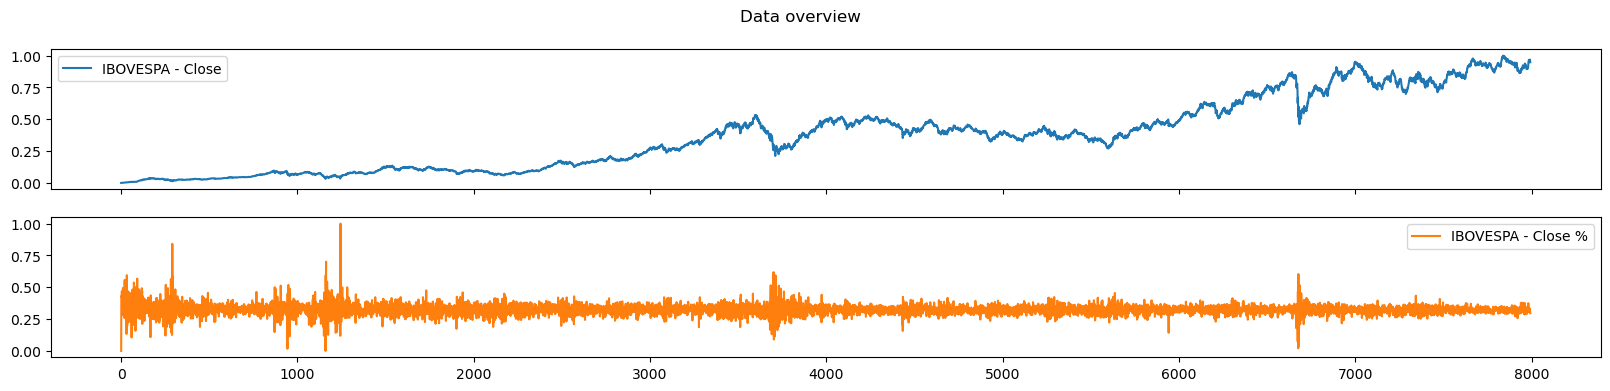

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

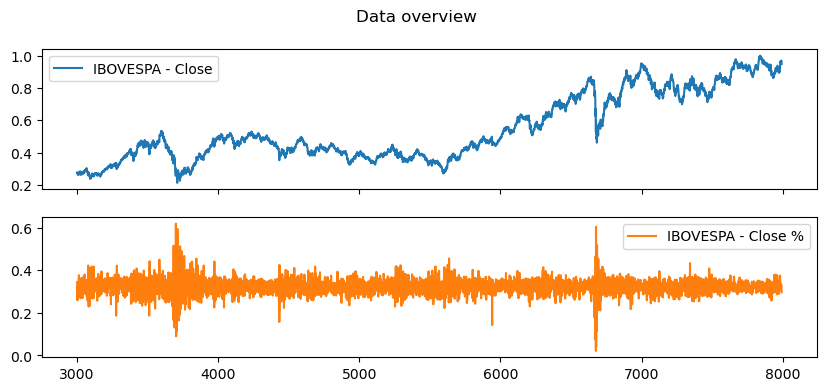

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

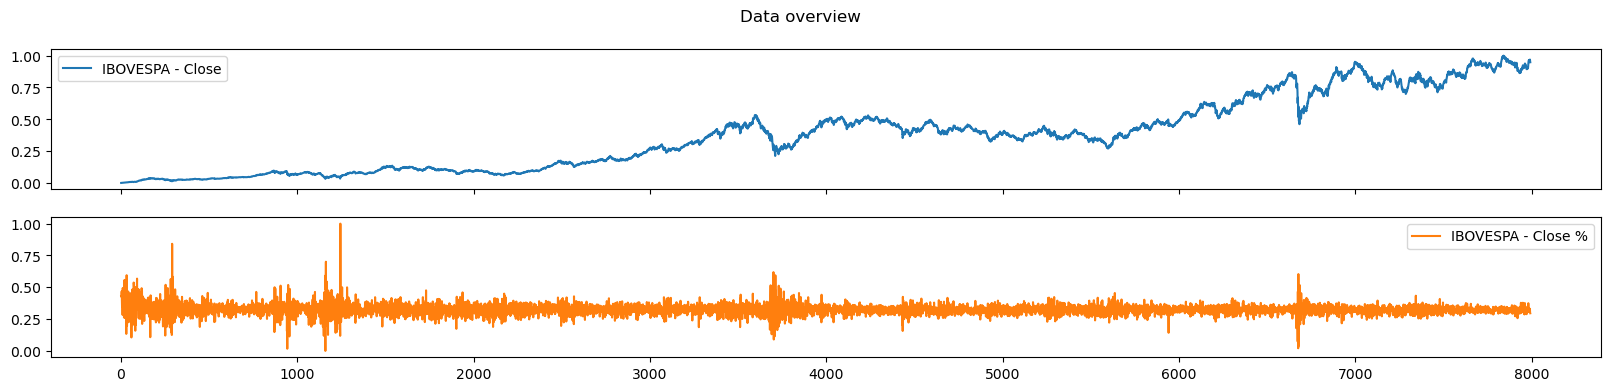

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

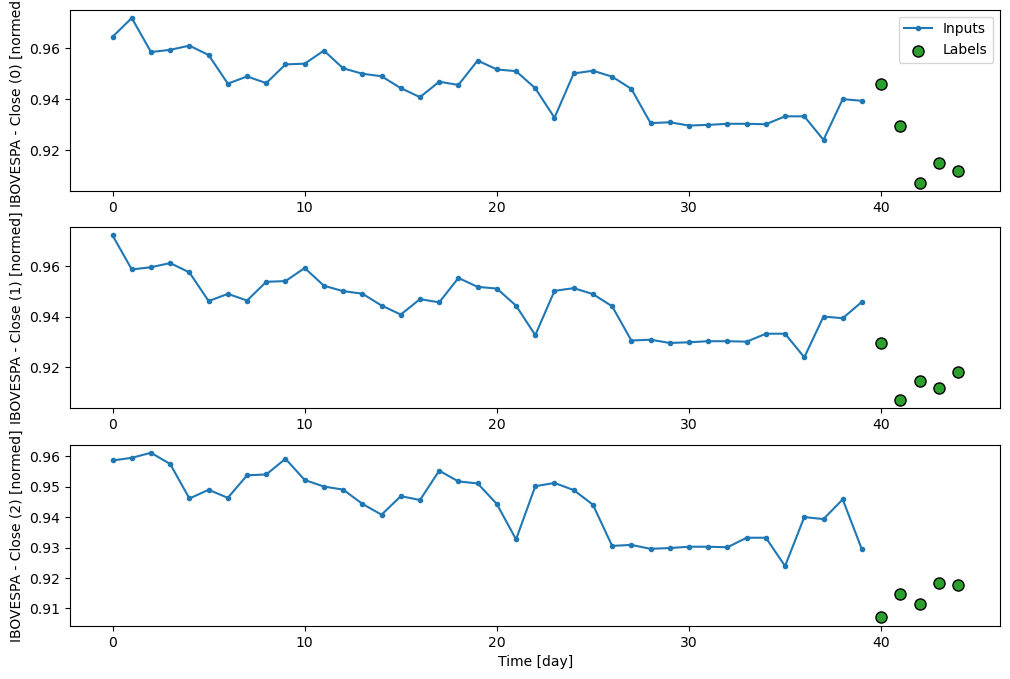

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9:58 3s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 118.8006 - mean_squared_error: 1.7051e-04 - root_mean_squared_error: 0.0126

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 104.9004 - mean_squared_error: 1.7427e-04 - root_mean_squared_error: 0.0129

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 98.4928 - mean_squared_error: 2.3209e-04 - root_mean_squared_error: 0.0148 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 94.0344 - mean_squared_error: 2.5688e-04 - root_mean_squared_error: 0.0156

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 89.4167 - mean_squared_error: 2.6242e-04 - root_mean_squared_error: 0.0158

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 85.0634 - mean_squared_error: 2.6035e-04 - root_mean_squared_error: 0.0158

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 81.0860 - mean_squared_error: 2.5496e-04 - root_mean_squared_error: 0.0157

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 77.3468 - mean_squared_error: 2.4781e-04 - root_mean_squared_error: 0.0155

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 73.9357 - mean_squared_error: 2.4016e-04 - root_mean_squared_error: 0.0153

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 70.8475 - mean_squared_error: 2.3255e-04 - root_mean_squared_error: 0.0150

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 68.0570 - mean_squared_error: 2.2540e-04 - root_mean_squared_error: 0.0148

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 65.6349 - mean_squared_error: 2.2063e-04 - root_mean_squared_error: 0.0146

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 63.5148 - mean_squared_error: 2.1899e-04 - root_mean_squared_error: 0.0146

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 61.5949 - mean_squared_error: 2.1807e-04 - root_mean_squared_error: 0.0146

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 59.9323 - mean_squared_error: 2.1941e-04 - root_mean_squared_error: 0.0146

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 58.3802 - mean_squared_error: 2.2008e-04 - root_mean_squared_error: 0.0147

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 56.9350 - mean_squared_error: 2.2029e-04 - root_mean_squared_error: 0.0147

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.6443 - mean_squared_error: 2.2066e-04 - root_mean_squared_error: 0.0147

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.4426 - mean_squared_error: 2.2081e-04 - root_mean_squared_error: 0.0147

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.3450 - mean_squared_error: 2.2152e-04 - root_mean_squared_error: 0.0147

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.3045 - mean_squared_error: 2.2188e-04 - root_mean_squared_error: 0.0148

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.3198 - mean_squared_error: 2.2209e-04 - root_mean_squared_error: 0.0148

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.4067 - mean_squared_error: 2.2353e-04 - root_mean_squared_error: 0.0148

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 49.5333 - mean_squared_error: 2.2486e-04 - root_mean_squared_error: 0.0149

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.6891 - mean_squared_error: 2.2573e-04 - root_mean_squared_error: 0.0149

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.8807 - mean_squared_error: 2.2633e-04 - root_mean_squared_error: 0.0149

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.1109 - mean_squared_error: 2.2695e-04 - root_mean_squared_error: 0.0150

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 46.3675 - mean_squared_error: 2.2728e-04 - root_mean_squared_error: 0.0150

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 45.6668 - mean_squared_error: 2.2770e-04 - root_mean_squared_error: 0.0150

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 45.0020 - mean_squared_error: 2.2816e-04 - root_mean_squared_error: 0.0150

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 44.3636 - mean_squared_error: 2.2846e-04 - root_mean_squared_error: 0.0150

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 43.7507 - mean_squared_error: 2.2862e-04 - root_mean_squared_error: 0.0150

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 43.1783 - mean_squared_error: 2.2891e-04 - root_mean_squared_error: 0.0150

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 42.6313 - mean_squared_error: 2.2913e-04 - root_mean_squared_error: 0.0150

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 42.1045 - mean_squared_error: 2.2924e-04 - root_mean_squared_error: 0.0151

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 41.6059 - mean_squared_error: 2.2953e-04 - root_mean_squared_error: 0.0151

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 41.1349 - mean_squared_error: 2.3028e-04 - root_mean_squared_error: 0.0151

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 40.6891 - mean_squared_error: 2.3176e-04 - root_mean_squared_error: 0.0151

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 40.2697 - mean_squared_error: 2.3471e-04 - root_mean_squared_error: 0.0152

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 39.8622 - mean_squared_error: 2.3747e-04 - root_mean_squared_error: 0.0153

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 39.4691 - mean_squared_error: 2.4026e-04 - root_mean_squared_error: 0.0154

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 39.0898 - mean_squared_error: 2.4316e-04 - root_mean_squared_error: 0.0155

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 38.7216 - mean_squared_error: 2.4605e-04 - root_mean_squared_error: 0.0156

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 38.3704 - mean_squared_error: 2.4963e-04 - root_mean_squared_error: 0.0157

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 38.0279 - mean_squared_error: 2.5310e-04 - root_mean_squared_error: 0.0158

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 37.6966 - mean_squared_error: 2.5700e-04 - root_mean_squared_error: 0.0159

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 37.3767 - mean_squared_error: 2.6157e-04 - root_mean_squared_error: 0.0160

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 37.0663 - mean_squared_error: 2.6636e-04 - root_mean_squared_error: 0.0161

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 36.7637 - mean_squared_error: 2.7117e-04 - root_mean_squared_error: 0.0163

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 36.4683 - mean_squared_error: 2.7601e-04 - root_mean_squared_error: 0.0164

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 36.1788 - mean_squared_error: 2.8075e-04 - root_mean_squared_error: 0.0165

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 35.8946 - mean_squared_error: 2.8543e-04 - root_mean_squared_error: 0.0166

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 35.6169 - mean_squared_error: 2.9039e-04 - root_mean_squared_error: 0.0168

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 35.3442 - mean_squared_error: 2.9524e-04 - root_mean_squared_error: 0.0169

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 35.0758 - mean_squared_error: 2.9992e-04 - root_mean_squared_error: 0.0170

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 34.8129 - mean_squared_error: 3.0484e-04 - root_mean_squared_error: 0.0171

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 34.5627 - mean_squared_error: 3.1323e-04 - root_mean_squared_error: 0.0173

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 34.3291 - mean_squared_error: 3.2622e-04 - root_mean_squared_error: 0.0176

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 34.1024 - mean_squared_error: 3.3936e-04 - root_mean_squared_error: 0.0178

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 33.8835 - mean_squared_error: 3.5391e-04 - root_mean_squared_error: 0.0181

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 33.6754 - mean_squared_error: 3.7363e-04 - root_mean_squared_error: 0.0185

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 33.4791 - mean_squared_error: 4.0230e-04 - root_mean_squared_error: 0.0189

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 33.2926 - mean_squared_error: 4.3765e-04 - root_mean_squared_error: 0.0194

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 33.1114 - mean_squared_error: 4.7395e-04 - root_mean_squared_error: 0.0200

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 32.9351 - mean_squared_error: 5.1097e-04 - root_mean_squared_error: 0.0205

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 32.7605 - mean_squared_error: 5.4653e-04 - root_mean_squared_error: 0.0210

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 32.5872 - mean_squared_error: 5.8050e-04 - root_mean_squared_error: 0.0214

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 32.4162 - mean_squared_error: 6.1326e-04 - root_mean_squared_error: 0.0219

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 32.2497 - mean_squared_error: 6.4577e-04 - root_mean_squared_error: 0.0224

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 32.0854 - mean_squared_error: 6.7711e-04 - root_mean_squared_error: 0.0228

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 31.9241 - mean_squared_error: 7.0793e-04 - root_mean_squared_error: 0.0232

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 31.7652 - mean_squared_error: 7.3785e-04 - root_mean_squared_error: 0.0237

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 31.6075 - mean_squared_error: 7.6649e-04 - root_mean_squared_error: 0.0241

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 31.4511 - mean_squared_error: 7.9389e-04 - root_mean_squared_error: 0.0245

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 31.2962 - mean_squared_error: 8.2021e-04 - root_mean_squared_error: 0.0248

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 31.1440 - mean_squared_error: 8.4575e-04 - root_mean_squared_error: 0.0252

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 30.9945 - mean_squared_error: 8.7056e-04 - root_mean_squared_error: 0.0255

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 30.8461 - mean_squared_error: 8.9433e-04 - root_mean_squared_error: 0.0259

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 30.6987 - mean_squared_error: 9.1708e-04 - root_mean_squared_error: 0.0262

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 30.5534 - mean_squared_error: 9.3904e-04 - root_mean_squared_error: 0.0265

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 30.4110 - mean_squared_error: 9.6066e-04 - root_mean_squared_error: 0.0268

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 30.2706 - mean_squared_error: 9.8164e-04 - root_mean_squared_error: 0.0271

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 30.1316 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0274    

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 29.9936 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0277

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 29.8573 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0280

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 29.7235 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0283

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 29.5928 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0285

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 29.4637 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 29.3368 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 29.2132 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 29.0925 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 28.9743 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0298

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 28.8577 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0300

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 28.7427 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 28.6284 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 28.5154 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 28.4053 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 28.2970 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0312

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 28.1896 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 28.0838 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 27.9798 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 27.8771 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 27.7755 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0324

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 27.6776 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 27.5833 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 27.4912 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 27.3999 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0336

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 27.3095 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 27.2202 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 27.1316 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 27.0442 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 26.9575 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 26.8712 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 26.7857 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 26.7012 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0359

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 26.6172 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 26.5338 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 26.4100 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0368 - val_loss: 0.0175 - val_mean_absolute_error: 0.0175 - val_mean_absolute_percentage_error: 1.8551 - val_mean_squared_error: 5.3664e-04 - val_root_mean_squared_error: 0.0232 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.6233 - mean_absolute_error: 0.6233 - mean_absolute_percentage_error: 8279.7266 - mean_squared_error: 0.3887 - root_mean_squared_error: 0.6235

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6222 - mean_absolute_error: 0.6222 - mean_absolute_percentage_error: 6905.7080 - mean_squared_error: 0.3873 - root_mean_squared_error: 0.6223 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6148 - mean_absolute_error: 0.6148 - mean_absolute_percentage_error: 5852.0796 - mean_squared_error: 0.3784 - root_mean_squared_error: 0.6151

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6045 - mean_absolute_error: 0.6045 - mean_absolute_percentage_error: 5170.1543 - mean_squared_error: 0.3666 - root_mean_squared_error: 0.6052

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5907 - mean_absolute_error: 0.5907 - mean_absolute_percentage_error: 4712.8892 - mean_squared_error: 0.3520 - root_mean_squared_error: 0.5926

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5955 - mean_absolute_error: 0.5955 - mean_absolute_percentage_error: 4444.0044 - mean_squared_error: 0.3744 - root_mean_squared_error: 0.6102

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5929 - mean_absolute_error: 0.5929 - mean_absolute_percentage_error: 4210.7129 - mean_squared_error: 0.3817 - root_mean_squared_error: 0.6162

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5878 - mean_absolute_error: 0.5878 - mean_absolute_percentage_error: 4010.9905 - mean_squared_error: 0.3823 - root_mean_squared_error: 0.6169

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5813 - mean_absolute_error: 0.5813 - mean_absolute_percentage_error: 3835.2898 - mean_squared_error: 0.3793 - root_mean_squared_error: 0.6146

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5736 - mean_absolute_error: 0.5736 - mean_absolute_percentage_error: 3676.9272 - mean_squared_error: 0.3739 - root_mean_squared_error: 0.6102

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5646 - mean_absolute_error: 0.5646 - mean_absolute_percentage_error: 3531.5120 - mean_squared_error: 0.3670 - root_mean_squared_error: 0.6043

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5545 - mean_absolute_error: 0.5545 - mean_absolute_percentage_error: 3396.8962 - mean_squared_error: 0.3592 - root_mean_squared_error: 0.5976

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5437 - mean_absolute_error: 0.5437 - mean_absolute_percentage_error: 3271.7729 - mean_squared_error: 0.3508 - root_mean_squared_error: 0.5902

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5326 - mean_absolute_error: 0.5326 - mean_absolute_percentage_error: 3155.4211 - mean_squared_error: 0.3423 - root_mean_squared_error: 0.5824

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5211 - mean_absolute_error: 0.5211 - mean_absolute_percentage_error: 3047.0203 - mean_squared_error: 0.3339 - root_mean_squared_error: 0.5746

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5098 - mean_absolute_error: 0.5098 - mean_absolute_percentage_error: 2946.1711 - mean_squared_error: 0.3256 - root_mean_squared_error: 0.5668

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4988 - mean_absolute_error: 0.4988 - mean_absolute_percentage_error: 2852.2449 - mean_squared_error: 0.3176 - root_mean_squared_error: 0.5590

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4880 - mean_absolute_error: 0.4880 - mean_absolute_percentage_error: 2764.5388 - mean_squared_error: 0.3098 - root_mean_squared_error: 0.5515

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4776 - mean_absolute_error: 0.4776 - mean_absolute_percentage_error: 2682.7205 - mean_squared_error: 0.3024 - root_mean_squared_error: 0.5441

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4676 - mean_absolute_error: 0.4676 - mean_absolute_percentage_error: 2606.1865 - mean_squared_error: 0.2952 - root_mean_squared_error: 0.5369

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4579 - mean_absolute_error: 0.4579 - mean_absolute_percentage_error: 2534.2917 - mean_squared_error: 0.2884 - root_mean_squared_error: 0.5299

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4486 - mean_absolute_error: 0.4486 - mean_absolute_percentage_error: 2466.6470 - mean_squared_error: 0.2819 - root_mean_squared_error: 0.5232

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4395 - mean_absolute_error: 0.4395 - mean_absolute_percentage_error: 2402.8794 - mean_squared_error: 0.2756 - root_mean_squared_error: 0.5166

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4309 - mean_absolute_error: 0.4309 - mean_absolute_percentage_error: 2342.6638 - mean_squared_error: 0.2696 - root_mean_squared_error: 0.5103

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4226 - mean_absolute_error: 0.4226 - mean_absolute_percentage_error: 2285.7446 - mean_squared_error: 0.2639 - root_mean_squared_error: 0.5041

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4146 - mean_absolute_error: 0.4146 - mean_absolute_percentage_error: 2231.8542 - mean_squared_error: 0.2584 - root_mean_squared_error: 0.4982

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4070 - mean_absolute_error: 0.4070 - mean_absolute_percentage_error: 2180.7512 - mean_squared_error: 0.2532 - root_mean_squared_error: 0.4925

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3996 - mean_absolute_error: 0.3996 - mean_absolute_percentage_error: 2132.2104 - mean_squared_error: 0.2482 - root_mean_squared_error: 0.4869

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3925 - mean_absolute_error: 0.3925 - mean_absolute_percentage_error: 2086.0430 - mean_squared_error: 0.2434 - root_mean_squared_error: 0.4815

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3857 - mean_absolute_error: 0.3857 - mean_absolute_percentage_error: 2042.0739 - mean_squared_error: 0.2388 - root_mean_squared_error: 0.4763

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3792 - mean_absolute_error: 0.3792 - mean_absolute_percentage_error: 2000.1490 - mean_squared_error: 0.2344 - root_mean_squared_error: 0.4713

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3728 - mean_absolute_error: 0.3728 - mean_absolute_percentage_error: 1960.1166 - mean_squared_error: 0.2301 - root_mean_squared_error: 0.4664

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3667 - mean_absolute_error: 0.3667 - mean_absolute_percentage_error: 1921.8501 - mean_squared_error: 0.2260 - root_mean_squared_error: 0.4616

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3608 - mean_absolute_error: 0.3608 - mean_absolute_percentage_error: 1885.2375 - mean_squared_error: 0.2221 - root_mean_squared_error: 0.4570

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3552 - mean_absolute_error: 0.3552 - mean_absolute_percentage_error: 1850.1761 - mean_squared_error: 0.2183 - root_mean_squared_error: 0.4526

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3497 - mean_absolute_error: 0.3497 - mean_absolute_percentage_error: 1816.5719 - mean_squared_error: 0.2147 - root_mean_squared_error: 0.4482

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3444 - mean_absolute_error: 0.3444 - mean_absolute_percentage_error: 1784.3258 - mean_squared_error: 0.2112 - root_mean_squared_error: 0.4440

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3393 - mean_absolute_error: 0.3393 - mean_absolute_percentage_error: 1753.3446 - mean_squared_error: 0.2078 - root_mean_squared_error: 0.4399

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3344 - mean_absolute_error: 0.3344 - mean_absolute_percentage_error: 1723.5525 - mean_squared_error: 0.2046 - root_mean_squared_error: 0.4360

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3296 - mean_absolute_error: 0.3296 - mean_absolute_percentage_error: 1694.8851 - mean_squared_error: 0.2014 - root_mean_squared_error: 0.4321

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3250 - mean_absolute_error: 0.3250 - mean_absolute_percentage_error: 1667.2858 - mean_squared_error: 0.1984 - root_mean_squared_error: 0.4283

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3205 - mean_absolute_error: 0.3205 - mean_absolute_percentage_error: 1640.6858 - mean_squared_error: 0.1954 - root_mean_squared_error: 0.4247

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3162 - mean_absolute_error: 0.3162 - mean_absolute_percentage_error: 1615.0280 - mean_squared_error: 0.1926 - root_mean_squared_error: 0.4211

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3120 - mean_absolute_error: 0.3120 - mean_absolute_percentage_error: 1590.2640 - mean_squared_error: 0.1898 - root_mean_squared_error: 0.4176

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - mean_absolute_percentage_error: 1566.3425 - mean_squared_error: 0.1872 - root_mean_squared_error: 0.4142

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 1543.2196 - mean_squared_error: 0.1846 - root_mean_squared_error: 0.4109

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3002 - mean_absolute_error: 0.3002 - mean_absolute_percentage_error: 1520.8544 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.4077

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2965 - mean_absolute_error: 0.2965 - mean_absolute_percentage_error: 1499.2084 - mean_squared_error: 0.1796 - root_mean_squared_error: 0.4046

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2929 - mean_absolute_error: 0.2929 - mean_absolute_percentage_error: 1478.2500 - mean_squared_error: 0.1773 - root_mean_squared_error: 0.4015

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2894 - mean_absolute_error: 0.2894 - mean_absolute_percentage_error: 1457.9469 - mean_squared_error: 0.1750 - root_mean_squared_error: 0.3985

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2860 - mean_absolute_error: 0.2860 - mean_absolute_percentage_error: 1438.2634 - mean_squared_error: 0.1728 - root_mean_squared_error: 0.3956

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2827 - mean_absolute_error: 0.2827 - mean_absolute_percentage_error: 1419.1703 - mean_squared_error: 0.1706 - root_mean_squared_error: 0.3927

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2795 - mean_absolute_error: 0.2795 - mean_absolute_percentage_error: 1400.6436 - mean_squared_error: 0.1685 - root_mean_squared_error: 0.3899

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2764 - mean_absolute_error: 0.2764 - mean_absolute_percentage_error: 1382.6584 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3872

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2735 - mean_absolute_error: 0.2735 - mean_absolute_percentage_error: 1365.1904 - mean_squared_error: 0.1645 - root_mean_squared_error: 0.3845

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2705 - mean_absolute_error: 0.2705 - mean_absolute_percentage_error: 1348.2147 - mean_squared_error: 0.1626 - root_mean_squared_error: 0.3819

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2677 - mean_absolute_error: 0.2677 - mean_absolute_percentage_error: 1331.7095 - mean_squared_error: 0.1607 - root_mean_squared_error: 0.3793

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1315.6614 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3768

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 1300.0616 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3744

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 1284.8877 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3720

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2574 - mean_absolute_error: 0.2574 - mean_absolute_percentage_error: 1270.1141 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3697

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2551 - mean_absolute_error: 0.2551 - mean_absolute_percentage_error: 1255.7202 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3675

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2527 - mean_absolute_error: 0.2527 - mean_absolute_percentage_error: 1241.6897 - mean_squared_error: 0.1505 - root_mean_squared_error: 0.3653

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2505 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 1228.0093 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3631

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2483 - mean_absolute_error: 0.2483 - mean_absolute_percentage_error: 1214.6646 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3609

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2461 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 1201.6427 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3589

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2440 - mean_absolute_error: 0.2440 - mean_absolute_percentage_error: 1188.9312 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3568

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 1176.5189 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3548

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2399 - mean_absolute_error: 0.2399 - mean_absolute_percentage_error: 1164.3966 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3528

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2379 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 1152.5559 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3508

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 1140.9856 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3489

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2342 - mean_absolute_error: 0.2342 - mean_absolute_percentage_error: 1129.6738 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3471

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1118.6116 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3452

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 1107.7903 - mean_squared_error: 0.1351 - root_mean_squared_error: 0.3434

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 1097.2023 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3416

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2270 - mean_absolute_error: 0.2270 - mean_absolute_percentage_error: 1086.8397 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3399

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2253 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 1076.6949 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3381

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2236 - mean_absolute_error: 0.2236 - mean_absolute_percentage_error: 1066.7615 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3364

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2220 - mean_absolute_error: 0.2220 - mean_absolute_percentage_error: 1057.0317 - mean_squared_error: 0.1293 - root_mean_squared_error: 0.3348

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 1047.4998 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3331

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2188 - mean_absolute_error: 0.2188 - mean_absolute_percentage_error: 1038.1591 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3315

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 1029.0046 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3299

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2157 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 1020.0301 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3283

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 1011.2294 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3268

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 1002.5975 - mean_squared_error: 0.1230 - root_mean_squared_error: 0.3252

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 994.1297 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3237 

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 985.8220 - mean_squared_error: 0.1210 - root_mean_squared_error: 0.3222

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 977.6705 - mean_squared_error: 0.1201 - root_mean_squared_error: 0.3208

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - mean_absolute_percentage_error: 969.6689 - mean_squared_error: 0.1191 - root_mean_squared_error: 0.3193

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2057 - mean_absolute_error: 0.2057 - mean_absolute_percentage_error: 961.8135 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3179

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2044 - mean_absolute_error: 0.2044 - mean_absolute_percentage_error: 954.1008 - mean_squared_error: 0.1173 - root_mean_squared_error: 0.3165

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2031 - mean_absolute_error: 0.2031 - mean_absolute_percentage_error: 946.5269 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3152

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2019 - mean_absolute_error: 0.2019 - mean_absolute_percentage_error: 939.0875 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3138

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2006 - mean_absolute_error: 0.2006 - mean_absolute_percentage_error: 931.7786 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3125

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1994 - mean_absolute_error: 0.1994 - mean_absolute_percentage_error: 924.5965 - mean_squared_error: 0.1139 - root_mean_squared_error: 0.3111

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1982 - mean_absolute_error: 0.1982 - mean_absolute_percentage_error: 917.5375 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.3098

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1970 - mean_absolute_error: 0.1970 - mean_absolute_percentage_error: 910.5983 - mean_squared_error: 0.1122 - root_mean_squared_error: 0.3085

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1958 - mean_absolute_error: 0.1958 - mean_absolute_percentage_error: 903.7767 - mean_squared_error: 0.1114 - root_mean_squared_error: 0.3073

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1947 - mean_absolute_error: 0.1947 - mean_absolute_percentage_error: 897.0696 - mean_squared_error: 0.1106 - root_mean_squared_error: 0.3060

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1936 - mean_absolute_error: 0.1936 - mean_absolute_percentage_error: 890.4732 - mean_squared_error: 0.1099 - root_mean_squared_error: 0.3048

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1925 - mean_absolute_error: 0.1925 - mean_absolute_percentage_error: 883.9844 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.3036

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 877.6006 - mean_squared_error: 0.1083 - root_mean_squared_error: 0.3024

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1903 - mean_absolute_error: 0.1903 - mean_absolute_percentage_error: 871.3193 - mean_squared_error: 0.1076 - root_mean_squared_error: 0.3012

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1892 - mean_absolute_error: 0.1892 - mean_absolute_percentage_error: 865.1380 - mean_squared_error: 0.1069 - root_mean_squared_error: 0.3000

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1882 - mean_absolute_error: 0.1882 - mean_absolute_percentage_error: 859.0558 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.2989

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1872 - mean_absolute_error: 0.1872 - mean_absolute_percentage_error: 853.0701 - mean_squared_error: 0.1055 - root_mean_squared_error: 0.2977

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 847.1778 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.2966

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1852 - mean_absolute_error: 0.1852 - mean_absolute_percentage_error: 841.3760 - mean_squared_error: 0.1041 - root_mean_squared_error: 0.2955

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1843 - mean_absolute_error: 0.1843 - mean_absolute_percentage_error: 835.6624 - mean_squared_error: 0.1034 - root_mean_squared_error: 0.2944

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1833 - mean_absolute_error: 0.1833 - mean_absolute_percentage_error: 830.0351 - mean_squared_error: 0.1028 - root_mean_squared_error: 0.2933

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1824 - mean_absolute_error: 0.1824 - mean_absolute_percentage_error: 824.4920 - mean_squared_error: 0.1021 - root_mean_squared_error: 0.2923

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1815 - mean_absolute_error: 0.1815 - mean_absolute_percentage_error: 819.0315 - mean_squared_error: 0.1015 - root_mean_squared_error: 0.2912

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1806 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 813.6512 - mean_squared_error: 0.1008 - root_mean_squared_error: 0.2902

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1797 - mean_absolute_error: 0.1797 - mean_absolute_percentage_error: 808.3494 - mean_squared_error: 0.1002 - root_mean_squared_error: 0.2891

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1788 - mean_absolute_error: 0.1788 - mean_absolute_percentage_error: 803.1245 - mean_squared_error: 0.0996 - root_mean_squared_error: 0.2881

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1779 - mean_absolute_error: 0.1779 - mean_absolute_percentage_error: 797.9746 - mean_squared_error: 0.0990 - root_mean_squared_error: 0.2871

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1771 - mean_absolute_error: 0.1771 - mean_absolute_percentage_error: 792.8979 - mean_squared_error: 0.0984 - root_mean_squared_error: 0.2861

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1762 - mean_absolute_error: 0.1762 - mean_absolute_percentage_error: 787.8930 - mean_squared_error: 0.0978 - root_mean_squared_error: 0.2851

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.1750 - mean_absolute_error: 0.1750 - mean_absolute_percentage_error: 780.5258 - mean_squared_error: 0.0969 - root_mean_squared_error: 0.2837 - val_loss: 0.0260 - val_mean_absolute_error: 0.0260 - val_mean_absolute_percentage_error: 2.7326 - val_mean_squared_error: 9.4061e-04 - val_root_mean_squared_error: 0.0307 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.4477 - mean_absolute_error: 0.4477 - mean_absolute_percentage_error: 5945.9990 - mean_squared_error: 0.2006 - root_mean_squared_error: 0.4478

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.4474 - mean_absolute_error: 0.4474 - mean_absolute_percentage_error: 4961.5776 - mean_squared_error: 0.2003 - root_mean_squared_error: 0.4476 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.4449 - mean_absolute_error: 0.4449 - mean_absolute_percentage_error: 4213.7207 - mean_squared_error: 0.1981 - root_mean_squared_error: 0.4451

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.4420 - mean_absolute_error: 0.4420 - mean_absolute_percentage_error: 3738.8311 - mean_squared_error: 0.1956 - root_mean_squared_error: 0.4422

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.4387 - mean_absolute_error: 0.4387 - mean_absolute_percentage_error: 3438.8774 - mean_squared_error: 0.1927 - root_mean_squared_error: 0.4389

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.4346 - mean_absolute_error: 0.4346 - mean_absolute_percentage_error: 3218.1873 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.4351

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.4299 - mean_absolute_error: 0.4299 - mean_absolute_percentage_error: 3039.6504 - mean_squared_error: 0.1856 - root_mean_squared_error: 0.4306

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.4244 - mean_absolute_error: 0.4244 - mean_absolute_percentage_error: 2889.3115 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.4255

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.4180 - mean_absolute_error: 0.4180 - mean_absolute_percentage_error: 2757.0222 - mean_squared_error: 0.1767 - root_mean_squared_error: 0.4197

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4105 - mean_absolute_error: 0.4105 - mean_absolute_percentage_error: 2637.0852 - mean_squared_error: 0.1718 - root_mean_squared_error: 0.4134

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4019 - mean_absolute_error: 0.4019 - mean_absolute_percentage_error: 2526.3511 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.4067

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3936 - mean_absolute_error: 0.3936 - mean_absolute_percentage_error: 2426.1252 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.4002

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3852 - mean_absolute_error: 0.3852 - mean_absolute_percentage_error: 2334.0029 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3937

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3767 - mean_absolute_error: 0.3767 - mean_absolute_percentage_error: 2248.5757 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3872

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3682 - mean_absolute_error: 0.3682 - mean_absolute_percentage_error: 2169.4866 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3809

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3599 - mean_absolute_error: 0.3599 - mean_absolute_percentage_error: 2096.2656 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3748

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3519 - mean_absolute_error: 0.3519 - mean_absolute_percentage_error: 2028.2146 - mean_squared_error: 0.1395 - root_mean_squared_error: 0.3690

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3441 - mean_absolute_error: 0.3441 - mean_absolute_percentage_error: 1964.7644 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3633

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3365 - mean_absolute_error: 0.3365 - mean_absolute_percentage_error: 1905.5856 - mean_squared_error: 0.1321 - root_mean_squared_error: 0.3578

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3293 - mean_absolute_error: 0.3293 - mean_absolute_percentage_error: 1850.2902 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3525

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3223 - mean_absolute_error: 0.3223 - mean_absolute_percentage_error: 1798.4471 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3475

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3156 - mean_absolute_error: 0.3156 - mean_absolute_percentage_error: 1749.7411 - mean_squared_error: 0.1223 - root_mean_squared_error: 0.3426

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3092 - mean_absolute_error: 0.3092 - mean_absolute_percentage_error: 1703.9060 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3380

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3030 - mean_absolute_error: 0.3030 - mean_absolute_percentage_error: 1660.6666 - mean_squared_error: 0.1166 - root_mean_squared_error: 0.3335

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2971 - mean_absolute_error: 0.2971 - mean_absolute_percentage_error: 1619.8071 - mean_squared_error: 0.1139 - root_mean_squared_error: 0.3291

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1581.1339 - mean_squared_error: 0.1114 - root_mean_squared_error: 0.3250

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2858 - mean_absolute_error: 0.2858 - mean_absolute_percentage_error: 1544.4790 - mean_squared_error: 0.1090 - root_mean_squared_error: 0.3210

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2806 - mean_absolute_error: 0.2806 - mean_absolute_percentage_error: 1509.6813 - mean_squared_error: 0.1067 - root_mean_squared_error: 0.3171

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2755 - mean_absolute_error: 0.2755 - mean_absolute_percentage_error: 1476.5999 - mean_squared_error: 0.1045 - root_mean_squared_error: 0.3134

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1445.1095 - mean_squared_error: 0.1025 - root_mean_squared_error: 0.3098

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2659 - mean_absolute_error: 0.2659 - mean_absolute_percentage_error: 1415.0977 - mean_squared_error: 0.1005 - root_mean_squared_error: 0.3063

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 1386.4584 - mean_squared_error: 0.0985 - root_mean_squared_error: 0.3029

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2570 - mean_absolute_error: 0.2570 - mean_absolute_percentage_error: 1359.1010 - mean_squared_error: 0.0967 - root_mean_squared_error: 0.2997

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 1332.9388 - mean_squared_error: 0.0950 - root_mean_squared_error: 0.2965

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2488 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 1307.8979 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.2935

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2449 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 1283.9060 - mean_squared_error: 0.0916 - root_mean_squared_error: 0.2905

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1260.8892 - mean_squared_error: 0.0901 - root_mean_squared_error: 0.2877

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1238.7865 - mean_squared_error: 0.0886 - root_mean_squared_error: 0.2849

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1217.5411 - mean_squared_error: 0.0871 - root_mean_squared_error: 0.2822

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 1197.1030 - mean_squared_error: 0.0857 - root_mean_squared_error: 0.2796

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 1177.4269 - mean_squared_error: 0.0844 - root_mean_squared_error: 0.2771

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2241 - mean_absolute_error: 0.2241 - mean_absolute_percentage_error: 1158.4672 - mean_squared_error: 0.0831 - root_mean_squared_error: 0.2746

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2210 - mean_absolute_error: 0.2210 - mean_absolute_percentage_error: 1140.1852 - mean_squared_error: 0.0818 - root_mean_squared_error: 0.2722

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2180 - mean_absolute_error: 0.2180 - mean_absolute_percentage_error: 1122.5431 - mean_squared_error: 0.0806 - root_mean_squared_error: 0.2698

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 1105.5079 - mean_squared_error: 0.0794 - root_mean_squared_error: 0.2676

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2123 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 1089.0464 - mean_squared_error: 0.0783 - root_mean_squared_error: 0.2653

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2096 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 1073.1298 - mean_squared_error: 0.0772 - root_mean_squared_error: 0.2632

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2070 - mean_absolute_error: 0.2070 - mean_absolute_percentage_error: 1057.7305 - mean_squared_error: 0.0761 - root_mean_squared_error: 0.2611

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2044 - mean_absolute_error: 0.2044 - mean_absolute_percentage_error: 1042.8226 - mean_squared_error: 0.0751 - root_mean_squared_error: 0.2590

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2020 - mean_absolute_error: 0.2020 - mean_absolute_percentage_error: 1028.3823 - mean_squared_error: 0.0741 - root_mean_squared_error: 0.2570

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1996 - mean_absolute_error: 0.1996 - mean_absolute_percentage_error: 1014.3857 - mean_squared_error: 0.0731 - root_mean_squared_error: 0.2551

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1972 - mean_absolute_error: 0.1972 - mean_absolute_percentage_error: 1000.8122 - mean_squared_error: 0.0722 - root_mean_squared_error: 0.2532

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1949 - mean_absolute_error: 0.1949 - mean_absolute_percentage_error: 987.6428 - mean_squared_error: 0.0713 - root_mean_squared_error: 0.2513 

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1927 - mean_absolute_error: 0.1927 - mean_absolute_percentage_error: 974.8583 - mean_squared_error: 0.0704 - root_mean_squared_error: 0.2495

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1906 - mean_absolute_error: 0.1906 - mean_absolute_percentage_error: 962.4414 - mean_squared_error: 0.0695 - root_mean_squared_error: 0.2477

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1885 - mean_absolute_error: 0.1885 - mean_absolute_percentage_error: 950.3766 - mean_squared_error: 0.0687 - root_mean_squared_error: 0.2459

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1865 - mean_absolute_error: 0.1865 - mean_absolute_percentage_error: 938.6482 - mean_squared_error: 0.0679 - root_mean_squared_error: 0.2442

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1845 - mean_absolute_error: 0.1845 - mean_absolute_percentage_error: 927.2445 - mean_squared_error: 0.0671 - root_mean_squared_error: 0.2426

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1826 - mean_absolute_error: 0.1826 - mean_absolute_percentage_error: 916.1534 - mean_squared_error: 0.0663 - root_mean_squared_error: 0.2410

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1807 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 905.3585 - mean_squared_error: 0.0655 - root_mean_squared_error: 0.2394

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1789 - mean_absolute_error: 0.1789 - mean_absolute_percentage_error: 894.8488 - mean_squared_error: 0.0648 - root_mean_squared_error: 0.2378

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 884.6148 - mean_squared_error: 0.0641 - root_mean_squared_error: 0.2363

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1755 - mean_absolute_error: 0.1755 - mean_absolute_percentage_error: 874.6460 - mean_squared_error: 0.0634 - root_mean_squared_error: 0.2348

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1739 - mean_absolute_error: 0.1739 - mean_absolute_percentage_error: 864.9308 - mean_squared_error: 0.0627 - root_mean_squared_error: 0.2334

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1723 - mean_absolute_error: 0.1723 - mean_absolute_percentage_error: 855.4572 - mean_squared_error: 0.0621 - root_mean_squared_error: 0.2320

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1708 - mean_absolute_error: 0.1708 - mean_absolute_percentage_error: 846.2142 - mean_squared_error: 0.0614 - root_mean_squared_error: 0.2306

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1693 - mean_absolute_error: 0.1693 - mean_absolute_percentage_error: 837.1935 - mean_squared_error: 0.0608 - root_mean_squared_error: 0.2292

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1678 - mean_absolute_error: 0.1678 - mean_absolute_percentage_error: 828.3884 - mean_squared_error: 0.0602 - root_mean_squared_error: 0.2279

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1664 - mean_absolute_error: 0.1664 - mean_absolute_percentage_error: 819.7913 - mean_squared_error: 0.0596 - root_mean_squared_error: 0.2266

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1650 - mean_absolute_error: 0.1650 - mean_absolute_percentage_error: 811.3953 - mean_squared_error: 0.0590 - root_mean_squared_error: 0.2253

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1637 - mean_absolute_error: 0.1637 - mean_absolute_percentage_error: 803.1915 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2241

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1624 - mean_absolute_error: 0.1624 - mean_absolute_percentage_error: 795.1725 - mean_squared_error: 0.0579 - root_mean_squared_error: 0.2228

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1611 - mean_absolute_error: 0.1611 - mean_absolute_percentage_error: 787.3318 - mean_squared_error: 0.0573 - root_mean_squared_error: 0.2216

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1598 - mean_absolute_error: 0.1598 - mean_absolute_percentage_error: 779.6635 - mean_squared_error: 0.0568 - root_mean_squared_error: 0.2204

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1586 - mean_absolute_error: 0.1586 - mean_absolute_percentage_error: 772.1613 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2193

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1573 - mean_absolute_error: 0.1573 - mean_absolute_percentage_error: 764.8194 - mean_squared_error: 0.0558 - root_mean_squared_error: 0.2181

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1562 - mean_absolute_error: 0.1562 - mean_absolute_percentage_error: 757.6337 - mean_squared_error: 0.0552 - root_mean_squared_error: 0.2170

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1550 - mean_absolute_error: 0.1550 - mean_absolute_percentage_error: 750.5993 - mean_squared_error: 0.0548 - root_mean_squared_error: 0.2159

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1538 - mean_absolute_error: 0.1538 - mean_absolute_percentage_error: 743.7104 - mean_squared_error: 0.0543 - root_mean_squared_error: 0.2148

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1527 - mean_absolute_error: 0.1527 - mean_absolute_percentage_error: 736.9623 - mean_squared_error: 0.0538 - root_mean_squared_error: 0.2137

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1516 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 730.3507 - mean_squared_error: 0.0533 - root_mean_squared_error: 0.2126

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1506 - mean_absolute_error: 0.1506 - mean_absolute_percentage_error: 723.8724 - mean_squared_error: 0.0529 - root_mean_squared_error: 0.2116

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1495 - mean_absolute_error: 0.1495 - mean_absolute_percentage_error: 717.5229 - mean_squared_error: 0.0524 - root_mean_squared_error: 0.2106

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1485 - mean_absolute_error: 0.1485 - mean_absolute_percentage_error: 711.2973 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2096

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1475 - mean_absolute_error: 0.1475 - mean_absolute_percentage_error: 705.1918 - mean_squared_error: 0.0516 - root_mean_squared_error: 0.2086

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1465 - mean_absolute_error: 0.1465 - mean_absolute_percentage_error: 699.2032 - mean_squared_error: 0.0512 - root_mean_squared_error: 0.2076

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1455 - mean_absolute_error: 0.1455 - mean_absolute_percentage_error: 693.3289 - mean_squared_error: 0.0507 - root_mean_squared_error: 0.2066

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1445 - mean_absolute_error: 0.1445 - mean_absolute_percentage_error: 687.5660 - mean_squared_error: 0.0503 - root_mean_squared_error: 0.2057

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1436 - mean_absolute_error: 0.1436 - mean_absolute_percentage_error: 681.9098 - mean_squared_error: 0.0499 - root_mean_squared_error: 0.2048

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1427 - mean_absolute_error: 0.1427 - mean_absolute_percentage_error: 676.3572 - mean_squared_error: 0.0495 - root_mean_squared_error: 0.2038

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1418 - mean_absolute_error: 0.1418 - mean_absolute_percentage_error: 670.9062 - mean_squared_error: 0.0492 - root_mean_squared_error: 0.2029

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1409 - mean_absolute_error: 0.1409 - mean_absolute_percentage_error: 665.5539 - mean_squared_error: 0.0488 - root_mean_squared_error: 0.2020

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - mean_absolute_percentage_error: 660.2970 - mean_squared_error: 0.0484 - root_mean_squared_error: 0.2012

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1392 - mean_absolute_error: 0.1392 - mean_absolute_percentage_error: 655.1324 - mean_squared_error: 0.0481 - root_mean_squared_error: 0.2003

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 650.0576 - mean_squared_error: 0.0477 - root_mean_squared_error: 0.1994

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - mean_absolute_percentage_error: 645.0701 - mean_squared_error: 0.0473 - root_mean_squared_error: 0.1986

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1367 - mean_absolute_error: 0.1367 - mean_absolute_percentage_error: 640.1675 - mean_squared_error: 0.0470 - root_mean_squared_error: 0.1978

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 635.3483 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.1969

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1351 - mean_absolute_error: 0.1351 - mean_absolute_percentage_error: 630.6096 - mean_squared_error: 0.0463 - root_mean_squared_error: 0.1961

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1343 - mean_absolute_error: 0.1343 - mean_absolute_percentage_error: 625.9498 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.1953

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1335 - mean_absolute_error: 0.1335 - mean_absolute_percentage_error: 621.3669 - mean_squared_error: 0.0457 - root_mean_squared_error: 0.1946

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1328 - mean_absolute_error: 0.1328 - mean_absolute_percentage_error: 616.8589 - mean_squared_error: 0.0454 - root_mean_squared_error: 0.1938

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 612.4233 - mean_squared_error: 0.0450 - root_mean_squared_error: 0.1930

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 608.0585 - mean_squared_error: 0.0447 - root_mean_squared_error: 0.1923

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1306 - mean_absolute_error: 0.1306 - mean_absolute_percentage_error: 603.7641 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.1915

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1299 - mean_absolute_error: 0.1299 - mean_absolute_percentage_error: 599.5377 - mean_squared_error: 0.0441 - root_mean_squared_error: 0.1908

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1293 - mean_absolute_error: 0.1293 - mean_absolute_percentage_error: 595.3770 - mean_squared_error: 0.0438 - root_mean_squared_error: 0.1901

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 591.2811 - mean_squared_error: 0.0436 - root_mean_squared_error: 0.1894

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1279 - mean_absolute_error: 0.1279 - mean_absolute_percentage_error: 587.2484 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.1887

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1273 - mean_absolute_error: 0.1273 - mean_absolute_percentage_error: 583.2776 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.1880

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1267 - mean_absolute_error: 0.1267 - mean_absolute_percentage_error: 579.3666 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.1873

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 575.5142 - mean_squared_error: 0.0425 - root_mean_squared_error: 0.1866

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1255 - mean_absolute_error: 0.1255 - mean_absolute_percentage_error: 571.7188 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.1860

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1249 - mean_absolute_error: 0.1249 - mean_absolute_percentage_error: 567.9792 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.1853

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1243 - mean_absolute_error: 0.1243 - mean_absolute_percentage_error: 564.2940 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.1847

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1237 - mean_absolute_error: 0.1237 - mean_absolute_percentage_error: 560.6619 - mean_squared_error: 0.0414 - root_mean_squared_error: 0.1840

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1231 - mean_absolute_error: 0.1231 - mean_absolute_percentage_error: 557.0817 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1834

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 553.5523 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1828

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 548.3571 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1819 - val_loss: 0.0134 - val_mean_absolute_error: 0.0134 - val_mean_absolute_percentage_error: 1.4188 - val_mean_squared_error: 2.9359e-04 - val_root_mean_squared_error: 0.0171 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 0.2740 - mean_absolute_error: 0.2740 - mean_absolute_percentage_error: 3638.4551 - mean_squared_error: 0.0752 - root_mean_squared_error: 0.2742

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2731 - mean_absolute_error: 0.2731 - mean_absolute_percentage_error: 3030.9082 - mean_squared_error: 0.0747 - root_mean_squared_error: 0.2734 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2704 - mean_absolute_error: 0.2704 - mean_absolute_percentage_error: 2569.7839 - mean_squared_error: 0.0733 - root_mean_squared_error: 0.2707

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2669 - mean_absolute_error: 0.2669 - mean_absolute_percentage_error: 2273.6360 - mean_squared_error: 0.0715 - root_mean_squared_error: 0.2673

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 2079.5356 - mean_squared_error: 0.0693 - root_mean_squared_error: 0.2630

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 1931.6719 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2580

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2502 - mean_absolute_error: 0.2502 - mean_absolute_percentage_error: 1808.4702 - mean_squared_error: 0.0640 - root_mean_squared_error: 0.2523

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2425 - mean_absolute_error: 0.2425 - mean_absolute_percentage_error: 1700.8474 - mean_squared_error: 0.0611 - root_mean_squared_error: 0.2462

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2343 - mean_absolute_error: 0.2343 - mean_absolute_percentage_error: 1605.6017 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2400

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 1522.4878 - mean_squared_error: 0.0558 - root_mean_squared_error: 0.2342

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 1449.3601 - mean_squared_error: 0.0535 - root_mean_squared_error: 0.2289

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.2134 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 1383.9613 - mean_squared_error: 0.0514 - root_mean_squared_error: 0.2238

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - mean_absolute_percentage_error: 1324.6383 - mean_squared_error: 0.0494 - root_mean_squared_error: 0.2190

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 1270.7115 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.2144

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1956 - mean_absolute_error: 0.1956 - mean_absolute_percentage_error: 1221.5638 - mean_squared_error: 0.0459 - root_mean_squared_error: 0.2101

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 1176.5565 - mean_squared_error: 0.0443 - root_mean_squared_error: 0.2060

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1854 - mean_absolute_error: 0.1854 - mean_absolute_percentage_error: 1135.0876 - mean_squared_error: 0.0429 - root_mean_squared_error: 0.2022

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1807 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 1096.8265 - mean_squared_error: 0.0415 - root_mean_squared_error: 0.1986

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1762 - mean_absolute_error: 0.1762 - mean_absolute_percentage_error: 1061.4541 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1951

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1720 - mean_absolute_error: 0.1720 - mean_absolute_percentage_error: 1028.5765 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1918

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1680 - mean_absolute_error: 0.1680 - mean_absolute_percentage_error: 997.9296 - mean_squared_error: 0.0380 - root_mean_squared_error: 0.1887 

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1642 - mean_absolute_error: 0.1642 - mean_absolute_percentage_error: 969.2963 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1858

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 942.4569 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1829

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1571 - mean_absolute_error: 0.1571 - mean_absolute_percentage_error: 917.2467 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1802

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1538 - mean_absolute_error: 0.1538 - mean_absolute_percentage_error: 893.5129 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1776

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 871.1265 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1752

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1476 - mean_absolute_error: 0.1476 - mean_absolute_percentage_error: 849.9741 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1728

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1448 - mean_absolute_error: 0.1448 - mean_absolute_percentage_error: 829.9521 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1705

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1420 - mean_absolute_error: 0.1420 - mean_absolute_percentage_error: 810.9687 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1684

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 801.8408 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1673

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1394 - mean_absolute_error: 0.1394 - mean_absolute_percentage_error: 792.9434 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1663

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1368 - mean_absolute_error: 0.1368 - mean_absolute_percentage_error: 775.8029 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1643

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 759.4800 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1623

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 743.9158 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1605

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 729.0577 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1586

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 714.8566 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1569

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1256 - mean_absolute_error: 0.1256 - mean_absolute_percentage_error: 701.2672 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1552

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1236 - mean_absolute_error: 0.1236 - mean_absolute_percentage_error: 688.2488 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1536

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 675.7651 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1520

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 663.7821 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1505

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 652.2709 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1490

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1163 - mean_absolute_error: 0.1163 - mean_absolute_percentage_error: 641.2019 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1476

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - mean_absolute_percentage_error: 630.5491 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1462

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 620.2883 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1448

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1114 - mean_absolute_error: 0.1114 - mean_absolute_percentage_error: 610.3979 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1435

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1099 - mean_absolute_error: 0.1099 - mean_absolute_percentage_error: 600.8573 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1422

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 591.6476 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1410

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 582.7511 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1398

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 574.1511 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1386

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 565.8335 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1375

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 557.7831 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1364

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1018 - mean_absolute_error: 0.1018 - mean_absolute_percentage_error: 549.9869 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1353

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 542.4324 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1342

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 535.1079 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1332

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 528.0028 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1322

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 521.1071 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1312

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 514.4112 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1302

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 507.9062 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1293

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 501.5849 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1284

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 495.4399 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1275

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 489.4624 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1266

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 483.6462 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1257

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 477.9847 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1249

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 472.4709 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1241

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 467.0983 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1233

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 461.8625 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1225

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 456.7575 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1218

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 454.2521 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1214

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 449.3331 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1206

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 446.9182 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1203

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 442.1748 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1196

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 437.5434 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1188

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 433.0196 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1182

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 430.7969 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1178

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 428.5996 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1175

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 426.4274 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1171

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 422.1563 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1165

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 417.9799 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1158

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 413.8951 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1152

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 409.8986 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1146

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 405.9878 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1139

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 402.1597 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1133

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 398.4117 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1127

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 396.5668 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1124

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 392.9338 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1119

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 389.3746 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1113

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 385.8871 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1107

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 382.4690 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1102

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 379.1180 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1096

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 375.8321 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1091

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 372.6093 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1086

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 369.4479 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1080

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 367.8897 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1078

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 366.3462 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1075

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 363.3024 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1070

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 360.3146 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1065

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 357.3814 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1060

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 354.5012 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1056

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 351.6725 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1051

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 348.8940 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1046

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 346.1643 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1041

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 343.4820 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1037

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 340.8463 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1032

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 338.2555 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1028

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 335.7084 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1024

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 333.2040 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1019

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 330.7410 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1015

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 328.3183 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1011

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 325.9349 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1007

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 323.5905 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1003

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 322.4324 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1001

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 320.1438 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.0997

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 317.8914 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.0993

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 315.6743 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.0989

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 314.5786 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0987

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 312.4124 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0984

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 311.3419 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0982

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 309.2252 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0978

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 308.1789 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0976

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 307.1406 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0975

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 305.0874 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0971

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 303.0646 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0968

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 301.0716 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0964

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 299.1078 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0961

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 297.1725 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0957

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 295.2651 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0954

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 293.3880 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0951 - val_loss: 0.0331 - val_mean_absolute_error: 0.0331 - val_mean_absolute_percentage_error: 3.5021 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0360 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 1316.3003 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0996

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 1092.2461 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0986 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 920.1151 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0961 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 803.2600 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0924

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 716.0894 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0882

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 650.7899 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0845

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 600.5415 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0815

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 559.5409 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0787

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 524.4849 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 494.4951 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0740

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 468.3985 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0719

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 445.2379 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0700

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 424.5304 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0683

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 414.9723 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0674

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 405.8983 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0666

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 389.0456 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0651

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 381.2175 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0644

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 373.7502 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0637

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 366.6068 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0630

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 359.7706 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0624

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 346.9437 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0611

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 335.1489 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0600

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 324.2484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0589

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 314.1367 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0579

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 304.7257 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0569

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 295.9468 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0560

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 291.7724 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0555

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 283.8228 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0547

 50/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 276.3537 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0539

 52/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 269.3208 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0531

 54/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 262.6870 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0523

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 256.4200 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0516

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 250.4853 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0510

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 244.8620 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0503

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 239.5230 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0497

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 234.4466 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0491

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 229.6158 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0485

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 225.0128 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0480

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 220.6209 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0474

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 216.4234 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 212.4068 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 208.5580 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0459

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 204.8661 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0455

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 203.0761 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 201.3215 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 197.9141 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 194.6349 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 191.4772 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 188.4340 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 185.4992 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 182.6668 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 179.9312 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 177.2875 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 174.7313 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 172.2575 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 169.8622 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 167.5414 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 165.2915 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 163.1095 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 160.9921 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 158.9363 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 156.9395 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 155.0003 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 153.1156 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 151.2826 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 149.4987 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 147.7618 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 146.0700 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 144.4214 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 142.8143 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 141.2471 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 139.7183 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 138.2263 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 136.7699 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 135.3480 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 133.9593 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 132.6026 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 131.2769 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 129.9810 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 128.7137 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 127.4739 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 126.2611 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 125.0740 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 123.9118 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 122.7738 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 121.6591 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 120.5672 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 119.4976 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 118.4493 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 117.4216 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 116.4139 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 115.4256 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 114.4563 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 113.5053 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 112.5720 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 111.6559 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 110.7565 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 109.8734 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 109.0061 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 108.1541 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 107.3170 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 106.4946 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 105.6864 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 104.8922 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 104.1115 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 103.3439 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 102.5891 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 101.8465 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 101.1163 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 100.3982 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 99.6916 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311 

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 98.9962 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 98.3119 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 97.6382 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 96.9749 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 96.3217 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 95.6786 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 95.0454 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 94.4215 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 93.8069 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 93.2014 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 92.6047 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 92.0168 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 91.4383 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302 - val_loss: 0.0312 - val_mean_absolute_error: 0.0312 - val_mean_absolute_percentage_error: 3.3108 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0339 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 806.8325 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0615

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 668.3945 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0606 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 560.5030 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0584

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 484.5979 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0553

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 432.5061 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0527

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 395.9473 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0508

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 367.2007 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0492

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 342.8105 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0477

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 322.3976 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0463

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 304.8536 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0451

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 289.3615 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0439

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 275.6461 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0429

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 263.3349 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0419

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 252.2442 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0410

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 242.1840 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 233.0528 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 224.6855 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 216.9859 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 209.9110 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 203.3647 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0366

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 197.2978 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 191.6463 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 186.3687 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 181.4190 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 176.7645 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 172.3758 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 168.2308 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 164.3111 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 160.5964 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 157.0714 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 153.7245 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 150.5423 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 147.5145 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 144.6386 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 141.8940 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 139.2768 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 136.7734 - mean_squared_error: 9.9200e-04 - root_mean_squared_error: 0.0296

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 134.3730 - mean_squared_error: 9.7532e-04 - root_mean_squared_error: 0.0293

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 132.0681 - mean_squared_error: 9.5930e-04 - root_mean_squared_error: 0.0290

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 129.8535 - mean_squared_error: 9.4391e-04 - root_mean_squared_error: 0.0288

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 127.7237 - mean_squared_error: 9.2911e-04 - root_mean_squared_error: 0.0285

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 125.6725 - mean_squared_error: 9.1483e-04 - root_mean_squared_error: 0.0283

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 123.6955 - mean_squared_error: 9.0105e-04 - root_mean_squared_error: 0.0280

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 121.7888 - mean_squared_error: 8.8776e-04 - root_mean_squared_error: 0.0278

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 119.9493 - mean_squared_error: 8.7494e-04 - root_mean_squared_error: 0.0276

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 118.1728 - mean_squared_error: 8.6257e-04 - root_mean_squared_error: 0.0274

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 116.4568 - mean_squared_error: 8.5067e-04 - root_mean_squared_error: 0.0272

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 114.7974 - mean_squared_error: 8.3918e-04 - root_mean_squared_error: 0.0270

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 113.1929 - mean_squared_error: 8.2817e-04 - root_mean_squared_error: 0.0268

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 111.6405 - mean_squared_error: 8.1763e-04 - root_mean_squared_error: 0.0266

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 110.1365 - mean_squared_error: 8.0742e-04 - root_mean_squared_error: 0.0264

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 108.6790 - mean_squared_error: 7.9760e-04 - root_mean_squared_error: 0.0262

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 107.2652 - mean_squared_error: 7.8810e-04 - root_mean_squared_error: 0.0260

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 105.8937 - mean_squared_error: 7.7900e-04 - root_mean_squared_error: 0.0259

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 104.5623 - mean_squared_error: 7.7028e-04 - root_mean_squared_error: 0.0257

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 103.2689 - mean_squared_error: 7.6185e-04 - root_mean_squared_error: 0.0256

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 102.0121 - mean_squared_error: 7.5376e-04 - root_mean_squared_error: 0.0254

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 100.7909 - mean_squared_error: 7.4601e-04 - root_mean_squared_error: 0.0253

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 99.6045 - mean_squared_error: 7.3866e-04 - root_mean_squared_error: 0.0252 

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 98.4504 - mean_squared_error: 7.3156e-04 - root_mean_squared_error: 0.0250

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 97.3270 - mean_squared_error: 7.2467e-04 - root_mean_squared_error: 0.0249

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 96.2330 - mean_squared_error: 7.1800e-04 - root_mean_squared_error: 0.0248

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 95.1668 - mean_squared_error: 7.1152e-04 - root_mean_squared_error: 0.0247

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 94.1275 - mean_squared_error: 7.0521e-04 - root_mean_squared_error: 0.0246

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 93.1140 - mean_squared_error: 6.9908e-04 - root_mean_squared_error: 0.0245

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 92.1252 - mean_squared_error: 6.9309e-04 - root_mean_squared_error: 0.0244

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 91.1602 - mean_squared_error: 6.8726e-04 - root_mean_squared_error: 0.0243

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 90.2179 - mean_squared_error: 6.8155e-04 - root_mean_squared_error: 0.0242

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 89.2977 - mean_squared_error: 6.7596e-04 - root_mean_squared_error: 0.0241

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 88.3989 - mean_squared_error: 6.7052e-04 - root_mean_squared_error: 0.0240

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 87.5206 - mean_squared_error: 6.6521e-04 - root_mean_squared_error: 0.0239

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 86.6621 - mean_squared_error: 6.6000e-04 - root_mean_squared_error: 0.0238

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 85.8226 - mean_squared_error: 6.5491e-04 - root_mean_squared_error: 0.0237

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 85.0017 - mean_squared_error: 6.4993e-04 - root_mean_squared_error: 0.0236

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 84.1985 - mean_squared_error: 6.4506e-04 - root_mean_squared_error: 0.0235

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 83.4126 - mean_squared_error: 6.4028e-04 - root_mean_squared_error: 0.0234

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 82.6432 - mean_squared_error: 6.3559e-04 - root_mean_squared_error: 0.0233

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 81.8901 - mean_squared_error: 6.3100e-04 - root_mean_squared_error: 0.0232

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 81.1526 - mean_squared_error: 6.2650e-04 - root_mean_squared_error: 0.0232

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 80.4301 - mean_squared_error: 6.2208e-04 - root_mean_squared_error: 0.0231

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 79.7221 - mean_squared_error: 6.1774e-04 - root_mean_squared_error: 0.0230

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 79.0282 - mean_squared_error: 6.1348e-04 - root_mean_squared_error: 0.0229

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 78.3482 - mean_squared_error: 6.0931e-04 - root_mean_squared_error: 0.0228

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 77.6815 - mean_squared_error: 6.0521e-04 - root_mean_squared_error: 0.0228

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 77.0276 - mean_squared_error: 6.0119e-04 - root_mean_squared_error: 0.0227

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 76.3863 - mean_squared_error: 5.9723e-04 - root_mean_squared_error: 0.0226

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 75.7571 - mean_squared_error: 5.9335e-04 - root_mean_squared_error: 0.0225

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 75.1397 - mean_squared_error: 5.8953e-04 - root_mean_squared_error: 0.0225

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 74.5339 - mean_squared_error: 5.8580e-04 - root_mean_squared_error: 0.0224

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 73.9392 - mean_squared_error: 5.8212e-04 - root_mean_squared_error: 0.0223

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 73.3552 - mean_squared_error: 5.7851e-04 - root_mean_squared_error: 0.0222

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 72.7816 - mean_squared_error: 5.7496e-04 - root_mean_squared_error: 0.0222

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 72.2183 - mean_squared_error: 5.7147e-04 - root_mean_squared_error: 0.0221

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 71.6647 - mean_squared_error: 5.6804e-04 - root_mean_squared_error: 0.0220

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 71.1208 - mean_squared_error: 5.6467e-04 - root_mean_squared_error: 0.0220

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 70.5862 - mean_squared_error: 5.6136e-04 - root_mean_squared_error: 0.0219

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 70.0608 - mean_squared_error: 5.5811e-04 - root_mean_squared_error: 0.0218

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 69.5442 - mean_squared_error: 5.5492e-04 - root_mean_squared_error: 0.0218

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 69.0363 - mean_squared_error: 5.5181e-04 - root_mean_squared_error: 0.0217

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 68.5369 - mean_squared_error: 5.4876e-04 - root_mean_squared_error: 0.0217

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 68.0457 - mean_squared_error: 5.4579e-04 - root_mean_squared_error: 0.0216

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 67.5624 - mean_squared_error: 5.4287e-04 - root_mean_squared_error: 0.0215

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 67.0870 - mean_squared_error: 5.4001e-04 - root_mean_squared_error: 0.0215

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 66.6192 - mean_squared_error: 5.3722e-04 - root_mean_squared_error: 0.0214

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 66.1593 - mean_squared_error: 5.3483e-04 - root_mean_squared_error: 0.0214

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 65.7069 - mean_squared_error: 5.3256e-04 - root_mean_squared_error: 0.0214

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 65.2616 - mean_squared_error: 5.3035e-04 - root_mean_squared_error: 0.0213

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 64.8235 - mean_squared_error: 5.2838e-04 - root_mean_squared_error: 0.0213

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 64.3922 - mean_squared_error: 5.2654e-04 - root_mean_squared_error: 0.0213

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 63.9675 - mean_squared_error: 5.2477e-04 - root_mean_squared_error: 0.0212

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 63.5495 - mean_squared_error: 5.2323e-04 - root_mean_squared_error: 0.0212

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 63.1378 - mean_squared_error: 5.2177e-04 - root_mean_squared_error: 0.0212

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 62.7324 - mean_squared_error: 5.2042e-04 - root_mean_squared_error: 0.0212

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 62.3330 - mean_squared_error: 5.1913e-04 - root_mean_squared_error: 0.0211

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 61.9394 - mean_squared_error: 5.1787e-04 - root_mean_squared_error: 0.0211

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 61.5516 - mean_squared_error: 5.1667e-04 - root_mean_squared_error: 0.0211

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 61.1694 - mean_squared_error: 5.1552e-04 - root_mean_squared_error: 0.0211

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 60.7927 - mean_squared_error: 5.1447e-04 - root_mean_squared_error: 0.0211

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 60.2386 - mean_squared_error: 5.1305e-04 - root_mean_squared_error: 0.0211 - val_loss: 0.0183 - val_mean_absolute_error: 0.0183 - val_mean_absolute_percentage_error: 1.9337 - val_mean_squared_error: 4.5710e-04 - val_root_mean_squared_error: 0.0214 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 355.0822 - mean_squared_error: 7.8590e-04 - root_mean_squared_error: 0.0280

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 289.2203 - mean_squared_error: 7.2538e-04 - root_mean_squared_error: 0.0269 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 237.8258 - mean_squared_error: 6.3216e-04 - root_mean_squared_error: 0.0250

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 205.3485 - mean_squared_error: 5.6791e-04 - root_mean_squared_error: 0.0236

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 186.4742 - mean_squared_error: 5.4112e-04 - root_mean_squared_error: 0.0231

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 172.1166 - mean_squared_error: 5.1608e-04 - root_mean_squared_error: 0.0225

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 160.5788 - mean_squared_error: 4.9376e-04 - root_mean_squared_error: 0.0220

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 151.4470 - mean_squared_error: 4.7662e-04 - root_mean_squared_error: 0.0216

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 143.5081 - mean_squared_error: 4.5971e-04 - root_mean_squared_error: 0.0212

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 136.6130 - mean_squared_error: 4.4432e-04 - root_mean_squared_error: 0.0209

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 130.4665 - mean_squared_error: 4.2968e-04 - root_mean_squared_error: 0.0205

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 124.9727 - mean_squared_error: 4.1612e-04 - root_mean_squared_error: 0.0202

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 120.0323 - mean_squared_error: 4.0386e-04 - root_mean_squared_error: 0.0198

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 115.5158 - mean_squared_error: 3.9232e-04 - root_mean_squared_error: 0.0195

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 111.4351 - mean_squared_error: 3.8263e-04 - root_mean_squared_error: 0.0193

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 107.7276 - mean_squared_error: 3.7416e-04 - root_mean_squared_error: 0.0191

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 104.3298 - mean_squared_error: 3.6654e-04 - root_mean_squared_error: 0.0189

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 101.2328 - mean_squared_error: 3.6002e-04 - root_mean_squared_error: 0.0187

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 98.3688 - mean_squared_error: 3.5376e-04 - root_mean_squared_error: 0.0185 

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 95.7053 - mean_squared_error: 3.4770e-04 - root_mean_squared_error: 0.0184

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 93.2122 - mean_squared_error: 3.4184e-04 - root_mean_squared_error: 0.0182

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 90.8715 - mean_squared_error: 3.3616e-04 - root_mean_squared_error: 0.0180

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 88.6731 - mean_squared_error: 3.3072e-04 - root_mean_squared_error: 0.0179

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 86.6018 - mean_squared_error: 3.2564e-04 - root_mean_squared_error: 0.0178

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 84.6442 - mean_squared_error: 3.2080e-04 - root_mean_squared_error: 0.0176

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 82.7864 - mean_squared_error: 3.1607e-04 - root_mean_squared_error: 0.0175

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 81.0214 - mean_squared_error: 3.1146e-04 - root_mean_squared_error: 0.0173

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 79.3472 - mean_squared_error: 3.0707e-04 - root_mean_squared_error: 0.0172

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 77.7531 - mean_squared_error: 3.0281e-04 - root_mean_squared_error: 0.0171

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 76.2368 - mean_squared_error: 2.9869e-04 - root_mean_squared_error: 0.0170

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 74.7934 - mean_squared_error: 2.9473e-04 - root_mean_squared_error: 0.0169

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 73.4197 - mean_squared_error: 2.9096e-04 - root_mean_squared_error: 0.0167

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 72.1083 - mean_squared_error: 2.8731e-04 - root_mean_squared_error: 0.0166

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 70.8638 - mean_squared_error: 2.8389e-04 - root_mean_squared_error: 0.0165

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.6746 - mean_squared_error: 2.8059e-04 - root_mean_squared_error: 0.0164

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.5422 - mean_squared_error: 2.7749e-04 - root_mean_squared_error: 0.0163

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 67.4602 - mean_squared_error: 2.7458e-04 - root_mean_squared_error: 0.0162

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 66.4189 - mean_squared_error: 2.7174e-04 - root_mean_squared_error: 0.0161

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.4153 - mean_squared_error: 2.6897e-04 - root_mean_squared_error: 0.0161

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.4469 - mean_squared_error: 2.6626e-04 - root_mean_squared_error: 0.0160

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 63.5124 - mean_squared_error: 2.6362e-04 - root_mean_squared_error: 0.0159

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.6093 - mean_squared_error: 2.6104e-04 - root_mean_squared_error: 0.0158

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.7357 - mean_squared_error: 2.5852e-04 - root_mean_squared_error: 0.0157

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.8905 - mean_squared_error: 2.5606e-04 - root_mean_squared_error: 0.0157

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 60.0730 - mean_squared_error: 2.5368e-04 - root_mean_squared_error: 0.0156

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 59.2813 - mean_squared_error: 2.5139e-04 - root_mean_squared_error: 0.0155

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.5154 - mean_squared_error: 2.4925e-04 - root_mean_squared_error: 0.0154

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.7730 - mean_squared_error: 2.4721e-04 - root_mean_squared_error: 0.0154

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.0540 - mean_squared_error: 2.4535e-04 - root_mean_squared_error: 0.0153

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 56.3581 - mean_squared_error: 2.4374e-04 - root_mean_squared_error: 0.0153

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 55.6820 - mean_squared_error: 2.4217e-04 - root_mean_squared_error: 0.0152

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 55.0253 - mean_squared_error: 2.4070e-04 - root_mean_squared_error: 0.0152

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 54.3872 - mean_squared_error: 2.3934e-04 - root_mean_squared_error: 0.0151

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 53.7667 - mean_squared_error: 2.3809e-04 - root_mean_squared_error: 0.0151

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 53.1631 - mean_squared_error: 2.3699e-04 - root_mean_squared_error: 0.0151

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 52.5755 - mean_squared_error: 2.3598e-04 - root_mean_squared_error: 0.0150

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 52.0033 - mean_squared_error: 2.3507e-04 - root_mean_squared_error: 0.0150

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 51.4465 - mean_squared_error: 2.3430e-04 - root_mean_squared_error: 0.0150

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 50.9055 - mean_squared_error: 2.3376e-04 - root_mean_squared_error: 0.0150

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 50.3783 - mean_squared_error: 2.3325e-04 - root_mean_squared_error: 0.0150

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 49.8646 - mean_squared_error: 2.3285e-04 - root_mean_squared_error: 0.0150

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 49.3640 - mean_squared_error: 2.3255e-04 - root_mean_squared_error: 0.0149

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 48.8751 - mean_squared_error: 2.3228e-04 - root_mean_squared_error: 0.0149

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 48.3978 - mean_squared_error: 2.3207e-04 - root_mean_squared_error: 0.0149

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 47.9320 - mean_squared_error: 2.3195e-04 - root_mean_squared_error: 0.0149

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 47.4766 - mean_squared_error: 2.3182e-04 - root_mean_squared_error: 0.0149

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 47.0314 - mean_squared_error: 2.3171e-04 - root_mean_squared_error: 0.0149

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 46.5959 - mean_squared_error: 2.3158e-04 - root_mean_squared_error: 0.0149

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 46.1698 - mean_squared_error: 2.3143e-04 - root_mean_squared_error: 0.0149

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 45.7530 - mean_squared_error: 2.3131e-04 - root_mean_squared_error: 0.0149

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 45.3451 - mean_squared_error: 2.3118e-04 - root_mean_squared_error: 0.0149

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 44.9459 - mean_squared_error: 2.3105e-04 - root_mean_squared_error: 0.0149

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 44.5549 - mean_squared_error: 2.3092e-04 - root_mean_squared_error: 0.0149

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 44.1722 - mean_squared_error: 2.3081e-04 - root_mean_squared_error: 0.0149

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 43.7972 - mean_squared_error: 2.3070e-04 - root_mean_squared_error: 0.0149

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 43.4298 - mean_squared_error: 2.3058e-04 - root_mean_squared_error: 0.0149

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 43.0697 - mean_squared_error: 2.3046e-04 - root_mean_squared_error: 0.0149

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 42.7168 - mean_squared_error: 2.3033e-04 - root_mean_squared_error: 0.0149

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 42.3706 - mean_squared_error: 2.3019e-04 - root_mean_squared_error: 0.0149

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 42.0308 - mean_squared_error: 2.3002e-04 - root_mean_squared_error: 0.0149

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 41.6975 - mean_squared_error: 2.2983e-04 - root_mean_squared_error: 0.0149

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 41.3703 - mean_squared_error: 2.2963e-04 - root_mean_squared_error: 0.0149

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 41.0492 - mean_squared_error: 2.2943e-04 - root_mean_squared_error: 0.0149

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 40.7341 - mean_squared_error: 2.2923e-04 - root_mean_squared_error: 0.0149

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 40.4247 - mean_squared_error: 2.2902e-04 - root_mean_squared_error: 0.0149

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 40.1208 - mean_squared_error: 2.2880e-04 - root_mean_squared_error: 0.0149

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 39.8224 - mean_squared_error: 2.2857e-04 - root_mean_squared_error: 0.0149

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 39.5293 - mean_squared_error: 2.2833e-04 - root_mean_squared_error: 0.0149

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 39.2413 - mean_squared_error: 2.2811e-04 - root_mean_squared_error: 0.0149

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 38.9583 - mean_squared_error: 2.2787e-04 - root_mean_squared_error: 0.0149

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 38.6801 - mean_squared_error: 2.2762e-04 - root_mean_squared_error: 0.0149

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 38.4065 - mean_squared_error: 2.2737e-04 - root_mean_squared_error: 0.0149

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 38.1374 - mean_squared_error: 2.2712e-04 - root_mean_squared_error: 0.0149

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 37.8727 - mean_squared_error: 2.2686e-04 - root_mean_squared_error: 0.0149

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 37.6122 - mean_squared_error: 2.2659e-04 - root_mean_squared_error: 0.0149

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 37.3559 - mean_squared_error: 2.2632e-04 - root_mean_squared_error: 0.0148

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 37.1037 - mean_squared_error: 2.2606e-04 - root_mean_squared_error: 0.0148

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 36.8555 - mean_squared_error: 2.2581e-04 - root_mean_squared_error: 0.0148

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 36.6113 - mean_squared_error: 2.2556e-04 - root_mean_squared_error: 0.0148

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 36.3708 - mean_squared_error: 2.2532e-04 - root_mean_squared_error: 0.0148

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 36.1341 - mean_squared_error: 2.2510e-04 - root_mean_squared_error: 0.0148

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 35.9009 - mean_squared_error: 2.2488e-04 - root_mean_squared_error: 0.0148

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 35.6712 - mean_squared_error: 2.2466e-04 - root_mean_squared_error: 0.0148

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 35.4450 - mean_squared_error: 2.2446e-04 - root_mean_squared_error: 0.0148

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 35.2227 - mean_squared_error: 2.2457e-04 - root_mean_squared_error: 0.0148

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 35.0037 - mean_squared_error: 2.2472e-04 - root_mean_squared_error: 0.0148

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 34.7880 - mean_squared_error: 2.2488e-04 - root_mean_squared_error: 0.0148

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 34.5757 - mean_squared_error: 2.2517e-04 - root_mean_squared_error: 0.0148

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 34.3664 - mean_squared_error: 2.2548e-04 - root_mean_squared_error: 0.0148

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 34.1602 - mean_squared_error: 2.2582e-04 - root_mean_squared_error: 0.0149

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 33.9570 - mean_squared_error: 2.2619e-04 - root_mean_squared_error: 0.0149

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 33.7566 - mean_squared_error: 2.2658e-04 - root_mean_squared_error: 0.0149

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 33.5592 - mean_squared_error: 2.2704e-04 - root_mean_squared_error: 0.0149

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 33.3646 - mean_squared_error: 2.2749e-04 - root_mean_squared_error: 0.0149

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 33.1726 - mean_squared_error: 2.2796e-04 - root_mean_squared_error: 0.0149

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 32.9833 - mean_squared_error: 2.2843e-04 - root_mean_squared_error: 0.0149

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 32.7965 - mean_squared_error: 2.2890e-04 - root_mean_squared_error: 0.0150

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 32.6123 - mean_squared_error: 2.2938e-04 - root_mean_squared_error: 0.0150

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 32.3410 - mean_squared_error: 2.3010e-04 - root_mean_squared_error: 0.0150 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 1.2979 - val_mean_squared_error: 2.1216e-04 - val_root_mean_squared_error: 0.0146 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 185.2436 - mean_squared_error: 2.5985e-04 - root_mean_squared_error: 0.0161

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 140.0878 - mean_squared_error: 2.0384e-04 - root_mean_squared_error: 0.0142 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 112.6087 - mean_squared_error: 1.6716e-04 - root_mean_squared_error: 0.0127

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 96.2124 - mean_squared_error: 1.4583e-04 - root_mean_squared_error: 0.0119 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 85.7595 - mean_squared_error: 1.3226e-04 - root_mean_squared_error: 0.0113

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 78.1407 - mean_squared_error: 1.2195e-04 - root_mean_squared_error: 0.0108

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 72.0647 - mean_squared_error: 1.1331e-04 - root_mean_squared_error: 0.0104

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 67.1609 - mean_squared_error: 1.0620e-04 - root_mean_squared_error: 0.0100

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 63.0752 - mean_squared_error: 1.0020e-04 - root_mean_squared_error: 0.0097

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 59.5790 - mean_squared_error: 9.5017e-05 - root_mean_squared_error: 0.0095

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 56.5335 - mean_squared_error: 9.0449e-05 - root_mean_squared_error: 0.0092

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 53.8419 - mean_squared_error: 8.6380e-05 - root_mean_squared_error: 0.0090

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 51.4409 - mean_squared_error: 8.2747e-05 - root_mean_squared_error: 0.0088

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 49.2888 - mean_squared_error: 7.9558e-05 - root_mean_squared_error: 0.0086

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 47.3499 - mean_squared_error: 7.6757e-05 - root_mean_squared_error: 0.0084

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 45.5939 - mean_squared_error: 7.4265e-05 - root_mean_squared_error: 0.0083

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 43.9927 - mean_squared_error: 7.2007e-05 - root_mean_squared_error: 0.0081

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 42.5309 - mean_squared_error: 6.9959e-05 - root_mean_squared_error: 0.0080

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 41.2112 - mean_squared_error: 6.8198e-05 - root_mean_squared_error: 0.0079

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 40.0029 - mean_squared_error: 6.6620e-05 - root_mean_squared_error: 0.0078

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 38.8900 - mean_squared_error: 6.5234e-05 - root_mean_squared_error: 0.0078

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 37.8565 - mean_squared_error: 6.3973e-05 - root_mean_squared_error: 0.0077

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 36.9005 - mean_squared_error: 6.2893e-05 - root_mean_squared_error: 0.0076

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 36.0068 - mean_squared_error: 6.1969e-05 - root_mean_squared_error: 0.0076

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 35.1726 - mean_squared_error: 6.1246e-05 - root_mean_squared_error: 0.0075

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 34.3846 - mean_squared_error: 6.0543e-05 - root_mean_squared_error: 0.0075

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 33.6422 - mean_squared_error: 5.9905e-05 - root_mean_squared_error: 0.0075

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 32.9410 - mean_squared_error: 5.9321e-05 - root_mean_squared_error: 0.0074

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 32.2775 - mean_squared_error: 5.8775e-05 - root_mean_squared_error: 0.0074

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 31.6480 - mean_squared_error: 5.8246e-05 - root_mean_squared_error: 0.0074

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 31.0521 - mean_squared_error: 5.7753e-05 - root_mean_squared_error: 0.0073

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 30.4848 - mean_squared_error: 5.7271e-05 - root_mean_squared_error: 0.0073

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 29.9445 - mean_squared_error: 5.6804e-05 - root_mean_squared_error: 0.0073

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 29.4318 - mean_squared_error: 5.6363e-05 - root_mean_squared_error: 0.0073

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 28.9432 - mean_squared_error: 5.5939e-05 - root_mean_squared_error: 0.0072

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 28.4781 - mean_squared_error: 5.5539e-05 - root_mean_squared_error: 0.0072

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 28.2525 - mean_squared_error: 5.5338e-05 - root_mean_squared_error: 0.0072

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 27.8162 - mean_squared_error: 5.4955e-05 - root_mean_squared_error: 0.0072

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 27.3968 - mean_squared_error: 5.4583e-05 - root_mean_squared_error: 0.0072

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 26.9939 - mean_squared_error: 5.4255e-05 - root_mean_squared_error: 0.0072

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 26.6066 - mean_squared_error: 5.3961e-05 - root_mean_squared_error: 0.0071

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 26.2334 - mean_squared_error: 5.3678e-05 - root_mean_squared_error: 0.0071

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 25.8727 - mean_squared_error: 5.3395e-05 - root_mean_squared_error: 0.0071

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 25.5242 - mean_squared_error: 5.3126e-05 - root_mean_squared_error: 0.0071

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 25.1873 - mean_squared_error: 5.2868e-05 - root_mean_squared_error: 0.0071

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 24.8618 - mean_squared_error: 5.2629e-05 - root_mean_squared_error: 0.0071

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 24.5466 - mean_squared_error: 5.2401e-05 - root_mean_squared_error: 0.0070

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 24.2410 - mean_squared_error: 5.2187e-05 - root_mean_squared_error: 0.0070

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 23.9450 - mean_squared_error: 5.2007e-05 - root_mean_squared_error: 0.0070

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 23.6580 - mean_squared_error: 5.1847e-05 - root_mean_squared_error: 0.0070

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 23.3793 - mean_squared_error: 5.1697e-05 - root_mean_squared_error: 0.0070

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 23.1084 - mean_squared_error: 5.1559e-05 - root_mean_squared_error: 0.0070

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 22.8451 - mean_squared_error: 5.1435e-05 - root_mean_squared_error: 0.0070

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 22.5893 - mean_squared_error: 5.1357e-05 - root_mean_squared_error: 0.0070

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 22.3405 - mean_squared_error: 5.1328e-05 - root_mean_squared_error: 0.0070

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 22.0988 - mean_squared_error: 5.1371e-05 - root_mean_squared_error: 0.0070

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 21.8635 - mean_squared_error: 5.1457e-05 - root_mean_squared_error: 0.0070

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 21.6348 - mean_squared_error: 5.1629e-05 - root_mean_squared_error: 0.0070

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 21.4133 - mean_squared_error: 5.1968e-05 - root_mean_squared_error: 0.0071

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 21.1981 - mean_squared_error: 5.2339e-05 - root_mean_squared_error: 0.0071

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 20.9889 - mean_squared_error: 5.2772e-05 - root_mean_squared_error: 0.0071

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 20.7850 - mean_squared_error: 5.3225e-05 - root_mean_squared_error: 0.0071

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 20.5859 - mean_squared_error: 5.3685e-05 - root_mean_squared_error: 0.0072

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 20.3917 - mean_squared_error: 5.4158e-05 - root_mean_squared_error: 0.0072

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 20.2019 - mean_squared_error: 5.4646e-05 - root_mean_squared_error: 0.0072

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 20.0166 - mean_squared_error: 5.5142e-05 - root_mean_squared_error: 0.0073

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 19.8356 - mean_squared_error: 5.5637e-05 - root_mean_squared_error: 0.0073

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 19.6584 - mean_squared_error: 5.6118e-05 - root_mean_squared_error: 0.0073

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 19.4853 - mean_squared_error: 5.6598e-05 - root_mean_squared_error: 0.0074

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 19.3160 - mean_squared_error: 5.7082e-05 - root_mean_squared_error: 0.0074

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 19.1505 - mean_squared_error: 5.7584e-05 - root_mean_squared_error: 0.0074

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 18.9891 - mean_squared_error: 5.8138e-05 - root_mean_squared_error: 0.0075

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 18.8312 - mean_squared_error: 5.8713e-05 - root_mean_squared_error: 0.0075

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 18.6768 - mean_squared_error: 5.9308e-05 - root_mean_squared_error: 0.0075

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 18.5258 - mean_squared_error: 5.9897e-05 - root_mean_squared_error: 0.0076

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 18.3777 - mean_squared_error: 6.0468e-05 - root_mean_squared_error: 0.0076

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 18.2325 - mean_squared_error: 6.1016e-05 - root_mean_squared_error: 0.0076

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 18.0902 - mean_squared_error: 6.1553e-05 - root_mean_squared_error: 0.0077

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 17.9507 - mean_squared_error: 6.2074e-05 - root_mean_squared_error: 0.0077

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 17.8138 - mean_squared_error: 6.2573e-05 - root_mean_squared_error: 0.0077

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 17.6795 - mean_squared_error: 6.3054e-05 - root_mean_squared_error: 0.0078

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.5477 - mean_squared_error: 6.3522e-05 - root_mean_squared_error: 0.0078

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.4185 - mean_squared_error: 6.3991e-05 - root_mean_squared_error: 0.0078

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.2921 - mean_squared_error: 6.4491e-05 - root_mean_squared_error: 0.0078

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.1681 - mean_squared_error: 6.4987e-05 - root_mean_squared_error: 0.0079

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.0462 - mean_squared_error: 6.5464e-05 - root_mean_squared_error: 0.0079

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 16.9266 - mean_squared_error: 6.5927e-05 - root_mean_squared_error: 0.0079

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 16.8091 - mean_squared_error: 6.6376e-05 - root_mean_squared_error: 0.0080

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 16.6939 - mean_squared_error: 6.6833e-05 - root_mean_squared_error: 0.0080

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 16.5807 - mean_squared_error: 6.7289e-05 - root_mean_squared_error: 0.0080

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 16.4695 - mean_squared_error: 6.7737e-05 - root_mean_squared_error: 0.0080

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 16.3602 - mean_squared_error: 6.8184e-05 - root_mean_squared_error: 0.0081

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 16.2528 - mean_squared_error: 6.8626e-05 - root_mean_squared_error: 0.0081

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 16.1472 - mean_squared_error: 6.9068e-05 - root_mean_squared_error: 0.0081

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 16.0435 - mean_squared_error: 6.9520e-05 - root_mean_squared_error: 0.0081

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 15.9414 - mean_squared_error: 6.9970e-05 - root_mean_squared_error: 0.0082

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 15.8409 - mean_squared_error: 7.0417e-05 - root_mean_squared_error: 0.0082

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 15.7423 - mean_squared_error: 7.0921e-05 - root_mean_squared_error: 0.0082

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 15.6454 - mean_squared_error: 7.1442e-05 - root_mean_squared_error: 0.0082

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 15.5501 - mean_squared_error: 7.2009e-05 - root_mean_squared_error: 0.0083

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 15.4565 - mean_squared_error: 7.2649e-05 - root_mean_squared_error: 0.0083

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 15.3643 - mean_squared_error: 7.3288e-05 - root_mean_squared_error: 0.0083

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 15.2736 - mean_squared_error: 7.3949e-05 - root_mean_squared_error: 0.0084

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 15.1843 - mean_squared_error: 7.4610e-05 - root_mean_squared_error: 0.0084

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 15.0964 - mean_squared_error: 7.5406e-05 - root_mean_squared_error: 0.0085

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 15.0103 - mean_squared_error: 7.6368e-05 - root_mean_squared_error: 0.0085

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 14.9254 - mean_squared_error: 7.7315e-05 - root_mean_squared_error: 0.0085

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 14.8418 - mean_squared_error: 7.8294e-05 - root_mean_squared_error: 0.0086

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 14.7595 - mean_squared_error: 7.9312e-05 - root_mean_squared_error: 0.0086

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 14.6783 - mean_squared_error: 8.0326e-05 - root_mean_squared_error: 0.0087

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 14.5983 - mean_squared_error: 8.1346e-05 - root_mean_squared_error: 0.0087

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 14.5195 - mean_squared_error: 8.2363e-05 - root_mean_squared_error: 0.0088

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 14.4418 - mean_squared_error: 8.3430e-05 - root_mean_squared_error: 0.0088

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 14.3653 - mean_squared_error: 8.4525e-05 - root_mean_squared_error: 0.0089

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 14.2898 - mean_squared_error: 8.5620e-05 - root_mean_squared_error: 0.0089

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 14.2154 - mean_squared_error: 8.6718e-05 - root_mean_squared_error: 0.0090

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 14.1420 - mean_squared_error: 8.7807e-05 - root_mean_squared_error: 0.0090

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 14.0696 - mean_squared_error: 8.8900e-05 - root_mean_squared_error: 0.0091

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 13.9983 - mean_squared_error: 9.0031e-05 - root_mean_squared_error: 0.0091

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 13.9281 - mean_squared_error: 9.1146e-05 - root_mean_squared_error: 0.0092 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0987 - val_mean_squared_error: 1.7158e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 1004.7373 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0769

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 826.5359 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0750  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 692.4579 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0722

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 600.1652 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 533.1677 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0652

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 485.1337 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 448.5530 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 418.5615 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 392.9272 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 371.0904 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 352.1541 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 335.3314 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0524

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 320.2673 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0512

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 306.6707 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0501

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 294.3199 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0490

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 283.0565 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0480

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 272.7274 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0471

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 263.2343 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0462

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 254.4897 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0453

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 246.4066 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0446

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 238.9066 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0438

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 231.9189 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 225.4017 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0424

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 219.2939 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 213.5574 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 208.1535 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0406

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 203.0551 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0401

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 198.2368 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 193.6749 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 189.3478 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 185.2394 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 181.3319 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 177.6105 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 174.0642 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 170.6797 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 167.4463 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 164.3507 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 161.3845 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 158.5385 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 155.8059 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 153.1804 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 150.6543 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 148.2216 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 145.8775 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 143.6170 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 141.4355 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 139.3285 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 137.2922 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 135.3231 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 133.4178 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 131.5726 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 129.7847 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 128.0513 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 126.3700 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 124.7385 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 123.1545 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 121.6157 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 120.1211 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 118.6690 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 117.2570 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 115.8830 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 114.5453 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 113.2423 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 111.9726 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 110.7350 - mean_squared_error: 9.9759e-04 - root_mean_squared_error: 0.0288

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 109.5281 - mean_squared_error: 9.8765e-04 - root_mean_squared_error: 0.0287

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 108.3507 - mean_squared_error: 9.7796e-04 - root_mean_squared_error: 0.0285

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 107.2016 - mean_squared_error: 9.6850e-04 - root_mean_squared_error: 0.0284

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 106.0799 - mean_squared_error: 9.5926e-04 - root_mean_squared_error: 0.0282

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 104.9847 - mean_squared_error: 9.5027e-04 - root_mean_squared_error: 0.0281

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 103.9152 - mean_squared_error: 9.4150e-04 - root_mean_squared_error: 0.0279

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 102.8701 - mean_squared_error: 9.3295e-04 - root_mean_squared_error: 0.0278

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 101.8491 - mean_squared_error: 9.2463e-04 - root_mean_squared_error: 0.0277

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 100.8509 - mean_squared_error: 9.1651e-04 - root_mean_squared_error: 0.0275

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 99.8747 - mean_squared_error: 9.0857e-04 - root_mean_squared_error: 0.0274 

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 98.9198 - mean_squared_error: 9.0080e-04 - root_mean_squared_error: 0.0273

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 97.9855 - mean_squared_error: 8.9319e-04 - root_mean_squared_error: 0.0271

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 97.0711 - mean_squared_error: 8.8575e-04 - root_mean_squared_error: 0.0270

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 96.1758 - mean_squared_error: 8.7846e-04 - root_mean_squared_error: 0.0269

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 95.2990 - mean_squared_error: 8.7130e-04 - root_mean_squared_error: 0.0268

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 94.4402 - mean_squared_error: 8.6429e-04 - root_mean_squared_error: 0.0267

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 93.5989 - mean_squared_error: 8.5743e-04 - root_mean_squared_error: 0.0266

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 92.7747 - mean_squared_error: 8.5073e-04 - root_mean_squared_error: 0.0265

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 91.9670 - mean_squared_error: 8.4418e-04 - root_mean_squared_error: 0.0263

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 91.1752 - mean_squared_error: 8.3776e-04 - root_mean_squared_error: 0.0262

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 90.3987 - mean_squared_error: 8.3145e-04 - root_mean_squared_error: 0.0261

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 89.6372 - mean_squared_error: 8.2527e-04 - root_mean_squared_error: 0.0260

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 88.8902 - mean_squared_error: 8.1920e-04 - root_mean_squared_error: 0.0259

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 88.1574 - mean_squared_error: 8.1327e-04 - root_mean_squared_error: 0.0258

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 87.4383 - mean_squared_error: 8.0745e-04 - root_mean_squared_error: 0.0257

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 86.7325 - mean_squared_error: 8.0174e-04 - root_mean_squared_error: 0.0256

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 86.0395 - mean_squared_error: 7.9614e-04 - root_mean_squared_error: 0.0255

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 85.3590 - mean_squared_error: 7.9064e-04 - root_mean_squared_error: 0.0255

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 84.6906 - mean_squared_error: 7.8526e-04 - root_mean_squared_error: 0.0254

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 84.0341 - mean_squared_error: 7.7998e-04 - root_mean_squared_error: 0.0253

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 83.3891 - mean_squared_error: 7.7479e-04 - root_mean_squared_error: 0.0252

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 82.7552 - mean_squared_error: 7.6972e-04 - root_mean_squared_error: 0.0251

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 82.1324 - mean_squared_error: 7.6477e-04 - root_mean_squared_error: 0.0250

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 81.5202 - mean_squared_error: 7.5994e-04 - root_mean_squared_error: 0.0249

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 80.9185 - mean_squared_error: 7.5527e-04 - root_mean_squared_error: 0.0249

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 80.3269 - mean_squared_error: 7.5070e-04 - root_mean_squared_error: 0.0248

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 79.7451 - mean_squared_error: 7.4623e-04 - root_mean_squared_error: 0.0247

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 79.1728 - mean_squared_error: 7.4186e-04 - root_mean_squared_error: 0.0246

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 78.6098 - mean_squared_error: 7.3758e-04 - root_mean_squared_error: 0.0246

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 78.0562 - mean_squared_error: 7.3364e-04 - root_mean_squared_error: 0.0245

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 77.5116 - mean_squared_error: 7.2980e-04 - root_mean_squared_error: 0.0244

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 76.9756 - mean_squared_error: 7.2604e-04 - root_mean_squared_error: 0.0244

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 76.4481 - mean_squared_error: 7.2245e-04 - root_mean_squared_error: 0.0243

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 75.9288 - mean_squared_error: 7.1895e-04 - root_mean_squared_error: 0.0243

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 75.4175 - mean_squared_error: 7.1553e-04 - root_mean_squared_error: 0.0242

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 74.9140 - mean_squared_error: 7.1221e-04 - root_mean_squared_error: 0.0242

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 74.4182 - mean_squared_error: 7.0897e-04 - root_mean_squared_error: 0.0241

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 73.9300 - mean_squared_error: 7.0588e-04 - root_mean_squared_error: 0.0241

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 73.4490 - mean_squared_error: 7.0285e-04 - root_mean_squared_error: 0.0240

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 72.9752 - mean_squared_error: 6.9989e-04 - root_mean_squared_error: 0.0240

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 72.5082 - mean_squared_error: 6.9699e-04 - root_mean_squared_error: 0.0239

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 72.0481 - mean_squared_error: 6.9414e-04 - root_mean_squared_error: 0.0239

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 71.5946 - mean_squared_error: 6.9139e-04 - root_mean_squared_error: 0.0239

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 70.9273 - mean_squared_error: 6.8739e-04 - root_mean_squared_error: 0.0238 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0697 - val_mean_squared_error: 1.6459e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 696.0175 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0556

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 569.5954 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0539 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 474.8409 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0515

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 409.7996 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0487

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 365.8374 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0464

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 335.0652 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0447

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 310.9641 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0433

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 290.4661 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0420

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 273.2867 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0408

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 258.5991 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 245.6214 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 234.1504 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 223.8724 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 214.5787 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 206.1396 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 198.4389 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 191.3707 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 184.8592 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 178.8558 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 173.2967 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 168.1259 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 163.3015 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 158.7920 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 154.5659 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 150.5974 - mean_squared_error: 9.8694e-04 - root_mean_squared_error: 0.0300

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 146.8558 - mean_squared_error: 9.6345e-04 - root_mean_squared_error: 0.0296

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 143.3243 - mean_squared_error: 9.4122e-04 - root_mean_squared_error: 0.0292

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 139.9855 - mean_squared_error: 9.2019e-04 - root_mean_squared_error: 0.0288

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 136.8228 - mean_squared_error: 9.0022e-04 - root_mean_squared_error: 0.0285

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 133.8227 - mean_squared_error: 8.8123e-04 - root_mean_squared_error: 0.0281

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 130.9743 - mean_squared_error: 8.6317e-04 - root_mean_squared_error: 0.0278

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 128.2633 - mean_squared_error: 8.4594e-04 - root_mean_squared_error: 0.0275

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 125.6805 - mean_squared_error: 8.2949e-04 - root_mean_squared_error: 0.0272

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 123.2201 - mean_squared_error: 8.1379e-04 - root_mean_squared_error: 0.0269

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 120.8709 - mean_squared_error: 7.9877e-04 - root_mean_squared_error: 0.0266

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 118.6264 - mean_squared_error: 7.8439e-04 - root_mean_squared_error: 0.0263

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 116.4763 - mean_squared_error: 7.7060e-04 - root_mean_squared_error: 0.0261

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 114.4154 - mean_squared_error: 7.5736e-04 - root_mean_squared_error: 0.0258

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 112.4369 - mean_squared_error: 7.4465e-04 - root_mean_squared_error: 0.0256

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 110.5367 - mean_squared_error: 7.3245e-04 - root_mean_squared_error: 0.0253

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 108.7103 - mean_squared_error: 7.2074e-04 - root_mean_squared_error: 0.0251

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 106.9521 - mean_squared_error: 7.0946e-04 - root_mean_squared_error: 0.0249

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 105.2582 - mean_squared_error: 6.9858e-04 - root_mean_squared_error: 0.0247

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 103.6252 - mean_squared_error: 6.8810e-04 - root_mean_squared_error: 0.0245

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 102.0500 - mean_squared_error: 6.7800e-04 - root_mean_squared_error: 0.0243

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 100.5293 - mean_squared_error: 6.6826e-04 - root_mean_squared_error: 0.0241

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 99.0600 - mean_squared_error: 6.5885e-04 - root_mean_squared_error: 0.0239 

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 97.6395 - mean_squared_error: 6.4978e-04 - root_mean_squared_error: 0.0237

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 96.2654 - mean_squared_error: 6.4104e-04 - root_mean_squared_error: 0.0235

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 94.9356 - mean_squared_error: 6.3260e-04 - root_mean_squared_error: 0.0233

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 93.6472 - mean_squared_error: 6.2443e-04 - root_mean_squared_error: 0.0232

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 92.3984 - mean_squared_error: 6.1654e-04 - root_mean_squared_error: 0.0230

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 91.1872 - mean_squared_error: 6.0890e-04 - root_mean_squared_error: 0.0228

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 90.0122 - mean_squared_error: 6.0155e-04 - root_mean_squared_error: 0.0227

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 88.8717 - mean_squared_error: 5.9448e-04 - root_mean_squared_error: 0.0225

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 87.7639 - mean_squared_error: 5.8765e-04 - root_mean_squared_error: 0.0224

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 86.6877 - mean_squared_error: 5.8109e-04 - root_mean_squared_error: 0.0223

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 85.6423 - mean_squared_error: 5.7485e-04 - root_mean_squared_error: 0.0221

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 84.6267 - mean_squared_error: 5.6889e-04 - root_mean_squared_error: 0.0220

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 83.6390 - mean_squared_error: 5.6314e-04 - root_mean_squared_error: 0.0219

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 82.6777 - mean_squared_error: 5.5758e-04 - root_mean_squared_error: 0.0218

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 81.7416 - mean_squared_error: 5.5218e-04 - root_mean_squared_error: 0.0217

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 80.8296 - mean_squared_error: 5.4694e-04 - root_mean_squared_error: 0.0216

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 79.9406 - mean_squared_error: 5.4184e-04 - root_mean_squared_error: 0.0215

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 79.0738 - mean_squared_error: 5.3690e-04 - root_mean_squared_error: 0.0214

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 78.2284 - mean_squared_error: 5.3209e-04 - root_mean_squared_error: 0.0213

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 77.4033 - mean_squared_error: 5.2739e-04 - root_mean_squared_error: 0.0212

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 76.5979 - mean_squared_error: 5.2281e-04 - root_mean_squared_error: 0.0211

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 75.8114 - mean_squared_error: 5.1832e-04 - root_mean_squared_error: 0.0210

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 75.0435 - mean_squared_error: 5.1397e-04 - root_mean_squared_error: 0.0209

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 74.2933 - mean_squared_error: 5.0974e-04 - root_mean_squared_error: 0.0208

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 73.5602 - mean_squared_error: 5.0562e-04 - root_mean_squared_error: 0.0207

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 72.8438 - mean_squared_error: 5.0162e-04 - root_mean_squared_error: 0.0206

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 72.1433 - mean_squared_error: 4.9772e-04 - root_mean_squared_error: 0.0206

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 71.4581 - mean_squared_error: 4.9390e-04 - root_mean_squared_error: 0.0205

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 70.7877 - mean_squared_error: 4.9017e-04 - root_mean_squared_error: 0.0204

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 70.1316 - mean_squared_error: 4.8651e-04 - root_mean_squared_error: 0.0203

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 69.4894 - mean_squared_error: 4.8294e-04 - root_mean_squared_error: 0.0202

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 68.8605 - mean_squared_error: 4.7943e-04 - root_mean_squared_error: 0.0202

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 68.2444 - mean_squared_error: 4.7599e-04 - root_mean_squared_error: 0.0201

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 67.6409 - mean_squared_error: 4.7261e-04 - root_mean_squared_error: 0.0200

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 67.0495 - mean_squared_error: 4.6930e-04 - root_mean_squared_error: 0.0199

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 66.4701 - mean_squared_error: 4.6608e-04 - root_mean_squared_error: 0.0199

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 65.9023 - mean_squared_error: 4.6294e-04 - root_mean_squared_error: 0.0198

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 65.3455 - mean_squared_error: 4.5986e-04 - root_mean_squared_error: 0.0197

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 64.7994 - mean_squared_error: 4.5683e-04 - root_mean_squared_error: 0.0197

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 64.2638 - mean_squared_error: 4.5386e-04 - root_mean_squared_error: 0.0196

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 63.7383 - mean_squared_error: 4.5095e-04 - root_mean_squared_error: 0.0196

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 63.2228 - mean_squared_error: 4.4810e-04 - root_mean_squared_error: 0.0195

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 62.7169 - mean_squared_error: 4.4532e-04 - root_mean_squared_error: 0.0194

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 62.2202 - mean_squared_error: 4.4259e-04 - root_mean_squared_error: 0.0194

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 61.7325 - mean_squared_error: 4.3992e-04 - root_mean_squared_error: 0.0193

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 61.2535 - mean_squared_error: 4.3731e-04 - root_mean_squared_error: 0.0193

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 60.7830 - mean_squared_error: 4.3474e-04 - root_mean_squared_error: 0.0192

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 60.3208 - mean_squared_error: 4.3224e-04 - root_mean_squared_error: 0.0192

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 59.8666 - mean_squared_error: 4.2978e-04 - root_mean_squared_error: 0.0191

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 59.4202 - mean_squared_error: 4.2738e-04 - root_mean_squared_error: 0.0190

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 58.9815 - mean_squared_error: 4.2505e-04 - root_mean_squared_error: 0.0190

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 58.5503 - mean_squared_error: 4.2280e-04 - root_mean_squared_error: 0.0189

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 58.1265 - mean_squared_error: 4.2066e-04 - root_mean_squared_error: 0.0189

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 57.7097 - mean_squared_error: 4.1858e-04 - root_mean_squared_error: 0.0189

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 57.2998 - mean_squared_error: 4.1656e-04 - root_mean_squared_error: 0.0188

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 56.8966 - mean_squared_error: 4.1459e-04 - root_mean_squared_error: 0.0188

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 56.4998 - mean_squared_error: 4.1268e-04 - root_mean_squared_error: 0.0187

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 56.1098 - mean_squared_error: 4.1107e-04 - root_mean_squared_error: 0.0187

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 55.7260 - mean_squared_error: 4.0952e-04 - root_mean_squared_error: 0.0187

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 55.3483 - mean_squared_error: 4.0801e-04 - root_mean_squared_error: 0.0187

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 54.9766 - mean_squared_error: 4.0663e-04 - root_mean_squared_error: 0.0186

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 54.6106 - mean_squared_error: 4.0530e-04 - root_mean_squared_error: 0.0186

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 54.2502 - mean_squared_error: 4.0401e-04 - root_mean_squared_error: 0.0186

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 53.8953 - mean_squared_error: 4.0279e-04 - root_mean_squared_error: 0.0186

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 53.5458 - mean_squared_error: 4.0161e-04 - root_mean_squared_error: 0.0185

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 53.2016 - mean_squared_error: 4.0054e-04 - root_mean_squared_error: 0.0185

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 52.8624 - mean_squared_error: 3.9950e-04 - root_mean_squared_error: 0.0185

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 52.5283 - mean_squared_error: 3.9849e-04 - root_mean_squared_error: 0.0185

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 52.1990 - mean_squared_error: 3.9752e-04 - root_mean_squared_error: 0.0185

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 51.8744 - mean_squared_error: 3.9656e-04 - root_mean_squared_error: 0.0185

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 51.5546 - mean_squared_error: 3.9567e-04 - root_mean_squared_error: 0.0185

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 51.0838 - mean_squared_error: 3.9436e-04 - root_mean_squared_error: 0.0184 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.2011 - val_mean_squared_error: 1.8829e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 674.6499 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0539

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 550.1700 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0520 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 457.6081 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0495

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 394.2762 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 351.2865 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0444

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 320.9757 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 297.1236 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0412

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 277.0649 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0398

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 260.4771 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 246.4267 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 234.0760 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 223.1495 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 213.3790 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 204.5376 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 196.5176 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 189.1949 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 182.4713 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 176.2771 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 170.5626 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 165.2692 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 160.3403 - mean_squared_error: 9.9428e-04 - root_mean_squared_error: 0.0303

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 155.7409 - mean_squared_error: 9.6707e-04 - root_mean_squared_error: 0.0298

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 151.4388 - mean_squared_error: 9.4151e-04 - root_mean_squared_error: 0.0293

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 147.4059 - mean_squared_error: 9.1756e-04 - root_mean_squared_error: 0.0289

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 143.6177 - mean_squared_error: 8.9507e-04 - root_mean_squared_error: 0.0285

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 140.0467 - mean_squared_error: 8.7380e-04 - root_mean_squared_error: 0.0281

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 136.6749 - mean_squared_error: 8.5367e-04 - root_mean_squared_error: 0.0278

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 133.4869 - mean_squared_error: 8.3460e-04 - root_mean_squared_error: 0.0274

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 130.4663 - mean_squared_error: 8.1649e-04 - root_mean_squared_error: 0.0271

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 127.6007 - mean_squared_error: 7.9927e-04 - root_mean_squared_error: 0.0268

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 124.8790 - mean_squared_error: 7.8287e-04 - root_mean_squared_error: 0.0265

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 122.2898 - mean_squared_error: 7.6724e-04 - root_mean_squared_error: 0.0262

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 119.8234 - mean_squared_error: 7.5232e-04 - root_mean_squared_error: 0.0259

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 117.4743 - mean_squared_error: 7.3808e-04 - root_mean_squared_error: 0.0256

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 115.2317 - mean_squared_error: 7.2446e-04 - root_mean_squared_error: 0.0253

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 113.0892 - mean_squared_error: 7.1143e-04 - root_mean_squared_error: 0.0251

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 111.0370 - mean_squared_error: 6.9892e-04 - root_mean_squared_error: 0.0248

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 109.0702 - mean_squared_error: 6.8692e-04 - root_mean_squared_error: 0.0246

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 107.1821 - mean_squared_error: 6.7540e-04 - root_mean_squared_error: 0.0243

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 105.3690 - mean_squared_error: 6.6435e-04 - root_mean_squared_error: 0.0241

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 103.6261 - mean_squared_error: 6.5373e-04 - root_mean_squared_error: 0.0239

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 101.9484 - mean_squared_error: 6.4351e-04 - root_mean_squared_error: 0.0237

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 100.3320 - mean_squared_error: 6.3365e-04 - root_mean_squared_error: 0.0235

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 98.7739 - mean_squared_error: 6.2415e-04 - root_mean_squared_error: 0.0233 

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 97.2708 - mean_squared_error: 6.1499e-04 - root_mean_squared_error: 0.0231

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 95.8197 - mean_squared_error: 6.0615e-04 - root_mean_squared_error: 0.0229

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 94.4176 - mean_squared_error: 5.9762e-04 - root_mean_squared_error: 0.0227

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 93.0622 - mean_squared_error: 5.8939e-04 - root_mean_squared_error: 0.0226

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 91.7510 - mean_squared_error: 5.8146e-04 - root_mean_squared_error: 0.0224

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 90.4820 - mean_squared_error: 5.7379e-04 - root_mean_squared_error: 0.0222

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 89.2526 - mean_squared_error: 5.6638e-04 - root_mean_squared_error: 0.0221

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 88.0610 - mean_squared_error: 5.5921e-04 - root_mean_squared_error: 0.0219

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 86.9053 - mean_squared_error: 5.5228e-04 - root_mean_squared_error: 0.0217

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 85.7842 - mean_squared_error: 5.4561e-04 - root_mean_squared_error: 0.0216

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 84.6961 - mean_squared_error: 5.3919e-04 - root_mean_squared_error: 0.0215

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 83.6393 - mean_squared_error: 5.3301e-04 - root_mean_squared_error: 0.0213

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 82.6126 - mean_squared_error: 5.2708e-04 - root_mean_squared_error: 0.0212

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 81.6155 - mean_squared_error: 5.2144e-04 - root_mean_squared_error: 0.0211

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 80.6467 - mean_squared_error: 5.1606e-04 - root_mean_squared_error: 0.0210

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 79.7046 - mean_squared_error: 5.1088e-04 - root_mean_squared_error: 0.0209

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.7877 - mean_squared_error: 5.0586e-04 - root_mean_squared_error: 0.0207

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 77.8948 - mean_squared_error: 5.0099e-04 - root_mean_squared_error: 0.0206

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 77.0248 - mean_squared_error: 4.9627e-04 - root_mean_squared_error: 0.0205

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 76.1769 - mean_squared_error: 4.9168e-04 - root_mean_squared_error: 0.0204

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 75.3503 - mean_squared_error: 4.8723e-04 - root_mean_squared_error: 0.0204

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 74.5440 - mean_squared_error: 4.8290e-04 - root_mean_squared_error: 0.0203

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 73.7571 - mean_squared_error: 4.7867e-04 - root_mean_squared_error: 0.0202

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 72.9891 - mean_squared_error: 4.7455e-04 - root_mean_squared_error: 0.0201

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 72.2392 - mean_squared_error: 4.7052e-04 - root_mean_squared_error: 0.0200

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 71.5069 - mean_squared_error: 4.6661e-04 - root_mean_squared_error: 0.0199

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 70.7916 - mean_squared_error: 4.6282e-04 - root_mean_squared_error: 0.0198

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 70.0927 - mean_squared_error: 4.5912e-04 - root_mean_squared_error: 0.0197

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 69.4097 - mean_squared_error: 4.5555e-04 - root_mean_squared_error: 0.0197

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 68.7420 - mean_squared_error: 4.5207e-04 - root_mean_squared_error: 0.0196

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.0889 - mean_squared_error: 4.4867e-04 - root_mean_squared_error: 0.0195

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 67.4499 - mean_squared_error: 4.4533e-04 - root_mean_squared_error: 0.0194

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 66.8246 - mean_squared_error: 4.4207e-04 - root_mean_squared_error: 0.0194

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.2125 - mean_squared_error: 4.3888e-04 - root_mean_squared_error: 0.0193

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 65.6131 - mean_squared_error: 4.3575e-04 - root_mean_squared_error: 0.0192

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.0260 - mean_squared_error: 4.3268e-04 - root_mean_squared_error: 0.0192

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 64.4509 - mean_squared_error: 4.2966e-04 - root_mean_squared_error: 0.0191

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.8873 - mean_squared_error: 4.2671e-04 - root_mean_squared_error: 0.0190

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.3352 - mean_squared_error: 4.2385e-04 - root_mean_squared_error: 0.0190

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.7942 - mean_squared_error: 4.2106e-04 - root_mean_squared_error: 0.0189

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.2637 - mean_squared_error: 4.1832e-04 - root_mean_squared_error: 0.0188

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.7435 - mean_squared_error: 4.1563e-04 - root_mean_squared_error: 0.0188

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.2332 - mean_squared_error: 4.1299e-04 - root_mean_squared_error: 0.0187

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.7326 - mean_squared_error: 4.1041e-04 - root_mean_squared_error: 0.0187

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.2415 - mean_squared_error: 4.0788e-04 - root_mean_squared_error: 0.0186

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.7595 - mean_squared_error: 4.0541e-04 - root_mean_squared_error: 0.0186

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.2863 - mean_squared_error: 4.0299e-04 - root_mean_squared_error: 0.0185

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.8217 - mean_squared_error: 4.0062e-04 - root_mean_squared_error: 0.0185

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.3654 - mean_squared_error: 3.9830e-04 - root_mean_squared_error: 0.0184

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.9172 - mean_squared_error: 3.9602e-04 - root_mean_squared_error: 0.0183

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.4769 - mean_squared_error: 3.9380e-04 - root_mean_squared_error: 0.0183

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.0443 - mean_squared_error: 3.9162e-04 - root_mean_squared_error: 0.0183

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.6190 - mean_squared_error: 3.8949e-04 - root_mean_squared_error: 0.0182

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.2012 - mean_squared_error: 3.8743e-04 - root_mean_squared_error: 0.0182

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.7904 - mean_squared_error: 3.8544e-04 - root_mean_squared_error: 0.0181

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.3867 - mean_squared_error: 3.8356e-04 - root_mean_squared_error: 0.0181

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 54.9898 - mean_squared_error: 3.8173e-04 - root_mean_squared_error: 0.0180

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 54.5993 - mean_squared_error: 3.7996e-04 - root_mean_squared_error: 0.0180

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 54.2152 - mean_squared_error: 3.7823e-04 - root_mean_squared_error: 0.0180

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 53.8373 - mean_squared_error: 3.7656e-04 - root_mean_squared_error: 0.0179

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 53.4659 - mean_squared_error: 3.7518e-04 - root_mean_squared_error: 0.0179

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 53.1004 - mean_squared_error: 3.7385e-04 - root_mean_squared_error: 0.0179

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 52.7407 - mean_squared_error: 3.7256e-04 - root_mean_squared_error: 0.0179

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 52.3867 - mean_squared_error: 3.7140e-04 - root_mean_squared_error: 0.0178

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 52.0382 - mean_squared_error: 3.7029e-04 - root_mean_squared_error: 0.0178

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 51.6949 - mean_squared_error: 3.6921e-04 - root_mean_squared_error: 0.0178

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 51.3570 - mean_squared_error: 3.6820e-04 - root_mean_squared_error: 0.0178

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 51.0241 - mean_squared_error: 3.6723e-04 - root_mean_squared_error: 0.0178

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 50.6964 - mean_squared_error: 3.6636e-04 - root_mean_squared_error: 0.0178

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 50.3734 - mean_squared_error: 3.6552e-04 - root_mean_squared_error: 0.0177

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 50.0552 - mean_squared_error: 3.6470e-04 - root_mean_squared_error: 0.0177

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 49.7417 - mean_squared_error: 3.6392e-04 - root_mean_squared_error: 0.0177

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 49.4326 - mean_squared_error: 3.6315e-04 - root_mean_squared_error: 0.0177

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 49.1281 - mean_squared_error: 3.6245e-04 - root_mean_squared_error: 0.0177

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 48.6798 - mean_squared_error: 3.6142e-04 - root_mean_squared_error: 0.0177 - val_loss: 0.0114 - val_mean_absolute_error: 0.0114 - val_mean_absolute_percentage_error: 1.2235 - val_mean_squared_error: 1.9261e-04 - val_root_mean_squared_error: 0.0139 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 736.7164 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0574

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 602.9693 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0556 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 503.1128 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0531

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 434.0157 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0502

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 386.1266 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0477

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 352.4545 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 326.4984 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0443

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 304.7192 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0429

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 286.2915 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0416

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 270.5822 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0405

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 256.8016 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0395

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 244.5834 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 233.6585 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 223.7940 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 214.8586 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 206.7135 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 199.2454 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 192.3739 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 186.0409 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 180.1800 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 174.7287 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 169.6465 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 164.8973 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 160.4481 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 156.2711 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 152.3362 - mean_squared_error: 9.9485e-04 - root_mean_squared_error: 0.0299

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 148.6233 - mean_squared_error: 9.7142e-04 - root_mean_squared_error: 0.0295

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 145.1143 - mean_squared_error: 9.4924e-04 - root_mean_squared_error: 0.0292

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 141.7914 - mean_squared_error: 9.2820e-04 - root_mean_squared_error: 0.0288

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 138.6404 - mean_squared_error: 9.0820e-04 - root_mean_squared_error: 0.0284

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 135.6490 - mean_squared_error: 8.8918e-04 - root_mean_squared_error: 0.0281

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 132.8042 - mean_squared_error: 8.7107e-04 - root_mean_squared_error: 0.0278

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 130.0951 - mean_squared_error: 8.5379e-04 - root_mean_squared_error: 0.0275

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 127.5153 - mean_squared_error: 8.3730e-04 - root_mean_squared_error: 0.0272

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 125.0530 - mean_squared_error: 8.2154e-04 - root_mean_squared_error: 0.0269

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 122.7016 - mean_squared_error: 8.0647e-04 - root_mean_squared_error: 0.0266

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 120.4503 - mean_squared_error: 7.9202e-04 - root_mean_squared_error: 0.0263

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 118.2939 - mean_squared_error: 7.7817e-04 - root_mean_squared_error: 0.0261

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 116.2245 - mean_squared_error: 7.6488e-04 - root_mean_squared_error: 0.0258

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 114.2382 - mean_squared_error: 7.5215e-04 - root_mean_squared_error: 0.0256

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 112.3290 - mean_squared_error: 7.3992e-04 - root_mean_squared_error: 0.0253

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 110.4918 - mean_squared_error: 7.2814e-04 - root_mean_squared_error: 0.0251

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 108.7221 - mean_squared_error: 7.1679e-04 - root_mean_squared_error: 0.0249

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 107.0166 - mean_squared_error: 7.0586e-04 - root_mean_squared_error: 0.0247

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 105.3716 - mean_squared_error: 6.9531e-04 - root_mean_squared_error: 0.0245

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 103.7839 - mean_squared_error: 6.8514e-04 - root_mean_squared_error: 0.0242

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 102.2499 - mean_squared_error: 6.7532e-04 - root_mean_squared_error: 0.0241

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 100.7672 - mean_squared_error: 6.6583e-04 - root_mean_squared_error: 0.0239

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 99.3332 - mean_squared_error: 6.5669e-04 - root_mean_squared_error: 0.0237 

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 97.9453 - mean_squared_error: 6.4785e-04 - root_mean_squared_error: 0.0235

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 96.6010 - mean_squared_error: 6.3929e-04 - root_mean_squared_error: 0.0233

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 95.2983 - mean_squared_error: 6.3101e-04 - root_mean_squared_error: 0.0232

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 94.0351 - mean_squared_error: 6.2300e-04 - root_mean_squared_error: 0.0230

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 92.8099 - mean_squared_error: 6.1528e-04 - root_mean_squared_error: 0.0228

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 91.6210 - mean_squared_error: 6.0786e-04 - root_mean_squared_error: 0.0227

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 90.4666 - mean_squared_error: 6.0070e-04 - root_mean_squared_error: 0.0225

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 89.3452 - mean_squared_error: 5.9381e-04 - root_mean_squared_error: 0.0224

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 88.2561 - mean_squared_error: 5.8725e-04 - root_mean_squared_error: 0.0223

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 87.1982 - mean_squared_error: 5.8098e-04 - root_mean_squared_error: 0.0221

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 86.1696 - mean_squared_error: 5.7493e-04 - root_mean_squared_error: 0.0220

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 85.1687 - mean_squared_error: 5.6907e-04 - root_mean_squared_error: 0.0219

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 84.1942 - mean_squared_error: 5.6339e-04 - root_mean_squared_error: 0.0218

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 83.2450 - mean_squared_error: 5.5788e-04 - root_mean_squared_error: 0.0217

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 82.3200 - mean_squared_error: 5.5253e-04 - root_mean_squared_error: 0.0216

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 81.4183 - mean_squared_error: 5.4733e-04 - root_mean_squared_error: 0.0214

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 80.5389 - mean_squared_error: 5.4228e-04 - root_mean_squared_error: 0.0213

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 79.6809 - mean_squared_error: 5.3735e-04 - root_mean_squared_error: 0.0212

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 78.8436 - mean_squared_error: 5.3255e-04 - root_mean_squared_error: 0.0211

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 78.0261 - mean_squared_error: 5.2785e-04 - root_mean_squared_error: 0.0210

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 77.2280 - mean_squared_error: 5.2329e-04 - root_mean_squared_error: 0.0210

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 76.4485 - mean_squared_error: 5.1887e-04 - root_mean_squared_error: 0.0209

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 75.6869 - mean_squared_error: 5.1456e-04 - root_mean_squared_error: 0.0208

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 74.9428 - mean_squared_error: 5.1038e-04 - root_mean_squared_error: 0.0207

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 74.2154 - mean_squared_error: 5.0631e-04 - root_mean_squared_error: 0.0206

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 73.5039 - mean_squared_error: 5.0233e-04 - root_mean_squared_error: 0.0205

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 72.8079 - mean_squared_error: 4.9844e-04 - root_mean_squared_error: 0.0204

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 72.1269 - mean_squared_error: 4.9462e-04 - root_mean_squared_error: 0.0204

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 71.4603 - mean_squared_error: 4.9089e-04 - root_mean_squared_error: 0.0203

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 70.8077 - mean_squared_error: 4.8724e-04 - root_mean_squared_error: 0.0202

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 70.1685 - mean_squared_error: 4.8364e-04 - root_mean_squared_error: 0.0201

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 69.5424 - mean_squared_error: 4.8013e-04 - root_mean_squared_error: 0.0201

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 68.9290 - mean_squared_error: 4.7668e-04 - root_mean_squared_error: 0.0200

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 68.3281 - mean_squared_error: 4.7334e-04 - root_mean_squared_error: 0.0199

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 67.7394 - mean_squared_error: 4.7007e-04 - root_mean_squared_error: 0.0198

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 67.1621 - mean_squared_error: 4.6687e-04 - root_mean_squared_error: 0.0198

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 66.5960 - mean_squared_error: 4.6373e-04 - root_mean_squared_error: 0.0197

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 66.0408 - mean_squared_error: 4.6065e-04 - root_mean_squared_error: 0.0196

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 65.4963 - mean_squared_error: 4.5763e-04 - root_mean_squared_error: 0.0196

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 64.9620 - mean_squared_error: 4.5468e-04 - root_mean_squared_error: 0.0195

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 64.4378 - mean_squared_error: 4.5179e-04 - root_mean_squared_error: 0.0195

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 64.1793 - mean_squared_error: 4.5036e-04 - root_mean_squared_error: 0.0194

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 63.6693 - mean_squared_error: 4.4756e-04 - root_mean_squared_error: 0.0194

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 63.1686 - mean_squared_error: 4.4481e-04 - root_mean_squared_error: 0.0193

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 62.6769 - mean_squared_error: 4.4212e-04 - root_mean_squared_error: 0.0193

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 62.1940 - mean_squared_error: 4.3949e-04 - root_mean_squared_error: 0.0192

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 61.7194 - mean_squared_error: 4.3691e-04 - root_mean_squared_error: 0.0191

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 61.2531 - mean_squared_error: 4.3438e-04 - root_mean_squared_error: 0.0191

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 60.7949 - mean_squared_error: 4.3193e-04 - root_mean_squared_error: 0.0190

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 60.3446 - mean_squared_error: 4.2954e-04 - root_mean_squared_error: 0.0190

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 59.9020 - mean_squared_error: 4.2724e-04 - root_mean_squared_error: 0.0189

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 59.4669 - mean_squared_error: 4.2503e-04 - root_mean_squared_error: 0.0189

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 59.0390 - mean_squared_error: 4.2287e-04 - root_mean_squared_error: 0.0188

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 58.6181 - mean_squared_error: 4.2078e-04 - root_mean_squared_error: 0.0188

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 58.2041 - mean_squared_error: 4.1872e-04 - root_mean_squared_error: 0.0188

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 57.7969 - mean_squared_error: 4.1685e-04 - root_mean_squared_error: 0.0187

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 57.3965 - mean_squared_error: 4.1517e-04 - root_mean_squared_error: 0.0187

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 57.0025 - mean_squared_error: 4.1352e-04 - root_mean_squared_error: 0.0187

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 56.6147 - mean_squared_error: 4.1196e-04 - root_mean_squared_error: 0.0186

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 56.2331 - mean_squared_error: 4.1051e-04 - root_mean_squared_error: 0.0186

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 55.8573 - mean_squared_error: 4.0908e-04 - root_mean_squared_error: 0.0186

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 55.4873 - mean_squared_error: 4.0773e-04 - root_mean_squared_error: 0.0186

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 55.1229 - mean_squared_error: 4.0642e-04 - root_mean_squared_error: 0.0185

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 54.7641 - mean_squared_error: 4.0519e-04 - root_mean_squared_error: 0.0185

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 54.4107 - mean_squared_error: 4.0402e-04 - root_mean_squared_error: 0.0185

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 54.0625 - mean_squared_error: 4.0288e-04 - root_mean_squared_error: 0.0185

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 53.7195 - mean_squared_error: 4.0178e-04 - root_mean_squared_error: 0.0185

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 53.3814 - mean_squared_error: 4.0071e-04 - root_mean_squared_error: 0.0185

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 53.0482 - mean_squared_error: 3.9967e-04 - root_mean_squared_error: 0.0184

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 52.7197 - mean_squared_error: 3.9867e-04 - root_mean_squared_error: 0.0184

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 52.3965 - mean_squared_error: 3.9769e-04 - root_mean_squared_error: 0.0184 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1633 - val_mean_squared_error: 1.7770e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 674.7798 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0537

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 549.6628 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 457.0382 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0492

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 393.8005 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0464

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 350.6169 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0441

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 320.2596 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0423

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 296.6465 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0409

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 276.7583 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0396

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 260.1042 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0384

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 245.9430 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 233.5085 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 222.5073 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 212.6919 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 203.8163 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 195.7699 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 188.4315 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 181.6934 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 175.4913 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 169.7726 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 164.4789 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 159.5508 - mean_squared_error: 9.7423e-04 - root_mean_squared_error: 0.0299

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 154.9541 - mean_squared_error: 9.4729e-04 - root_mean_squared_error: 0.0294

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 150.6542 - mean_squared_error: 9.2200e-04 - root_mean_squared_error: 0.0290

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 146.6232 - mean_squared_error: 8.9828e-04 - root_mean_squared_error: 0.0286

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 142.8373 - mean_squared_error: 8.7600e-04 - root_mean_squared_error: 0.0282

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 139.2695 - mean_squared_error: 8.5496e-04 - root_mean_squared_error: 0.0278

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 135.9016 - mean_squared_error: 8.3505e-04 - root_mean_squared_error: 0.0274

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 132.7176 - mean_squared_error: 8.1620e-04 - root_mean_squared_error: 0.0271

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 129.7016 - mean_squared_error: 7.9831e-04 - root_mean_squared_error: 0.0267

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 126.8405 - mean_squared_error: 7.8130e-04 - root_mean_squared_error: 0.0264

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 124.1235 - mean_squared_error: 7.6511e-04 - root_mean_squared_error: 0.0261

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 121.5387 - mean_squared_error: 7.4968e-04 - root_mean_squared_error: 0.0258

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 119.0763 - mean_squared_error: 7.3496e-04 - root_mean_squared_error: 0.0255

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 116.7302 - mean_squared_error: 7.2090e-04 - root_mean_squared_error: 0.0252

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 114.4903 - mean_squared_error: 7.0745e-04 - root_mean_squared_error: 0.0250

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 112.3504 - mean_squared_error: 6.9458e-04 - root_mean_squared_error: 0.0247

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 110.3011 - mean_squared_error: 6.8224e-04 - root_mean_squared_error: 0.0245

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 108.3377 - mean_squared_error: 6.7041e-04 - root_mean_squared_error: 0.0242

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 106.4532 - mean_squared_error: 6.5905e-04 - root_mean_squared_error: 0.0240

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 104.6443 - mean_squared_error: 6.4818e-04 - root_mean_squared_error: 0.0238

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 102.9053 - mean_squared_error: 6.3773e-04 - root_mean_squared_error: 0.0236

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 101.2316 - mean_squared_error: 6.2767e-04 - root_mean_squared_error: 0.0233

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 99.6191 - mean_squared_error: 6.1797e-04 - root_mean_squared_error: 0.0231 

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 98.0652 - mean_squared_error: 6.0863e-04 - root_mean_squared_error: 0.0229

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 96.5662 - mean_squared_error: 5.9962e-04 - root_mean_squared_error: 0.0228

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 95.1192 - mean_squared_error: 5.9093e-04 - root_mean_squared_error: 0.0226

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 93.7209 - mean_squared_error: 5.8254e-04 - root_mean_squared_error: 0.0224

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 92.3692 - mean_squared_error: 5.7444e-04 - root_mean_squared_error: 0.0222

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 91.0619 - mean_squared_error: 5.6663e-04 - root_mean_squared_error: 0.0220

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 89.7963 - mean_squared_error: 5.5908e-04 - root_mean_squared_error: 0.0219

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 88.5704 - mean_squared_error: 5.5177e-04 - root_mean_squared_error: 0.0217

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 87.3822 - mean_squared_error: 5.4470e-04 - root_mean_squared_error: 0.0216

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 86.2300 - mean_squared_error: 5.3786e-04 - root_mean_squared_error: 0.0214

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 85.1123 - mean_squared_error: 5.3127e-04 - root_mean_squared_error: 0.0213

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 84.0275 - mean_squared_error: 5.2494e-04 - root_mean_squared_error: 0.0211

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 82.9742 - mean_squared_error: 5.1884e-04 - root_mean_squared_error: 0.0210

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 81.9510 - mean_squared_error: 5.1298e-04 - root_mean_squared_error: 0.0209

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 80.9573 - mean_squared_error: 5.0742e-04 - root_mean_squared_error: 0.0207

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 79.9919 - mean_squared_error: 5.0212e-04 - root_mean_squared_error: 0.0206

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 79.0531 - mean_squared_error: 4.9699e-04 - root_mean_squared_error: 0.0205

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 78.1396 - mean_squared_error: 4.9205e-04 - root_mean_squared_error: 0.0204

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 77.2501 - mean_squared_error: 4.8725e-04 - root_mean_squared_error: 0.0203

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 76.3836 - mean_squared_error: 4.8260e-04 - root_mean_squared_error: 0.0202

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 75.5391 - mean_squared_error: 4.7809e-04 - root_mean_squared_error: 0.0201

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 74.7158 - mean_squared_error: 4.7372e-04 - root_mean_squared_error: 0.0200

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 73.9130 - mean_squared_error: 4.6948e-04 - root_mean_squared_error: 0.0199

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 73.1296 - mean_squared_error: 4.6533e-04 - root_mean_squared_error: 0.0198

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 72.3650 - mean_squared_error: 4.6129e-04 - root_mean_squared_error: 0.0197

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 71.6185 - mean_squared_error: 4.5735e-04 - root_mean_squared_error: 0.0197

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 70.8897 - mean_squared_error: 4.5353e-04 - root_mean_squared_error: 0.0196

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 70.1779 - mean_squared_error: 4.4982e-04 - root_mean_squared_error: 0.0195

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 69.4825 - mean_squared_error: 4.4623e-04 - root_mean_squared_error: 0.0194

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 68.8029 - mean_squared_error: 4.4274e-04 - root_mean_squared_error: 0.0193

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 68.1386 - mean_squared_error: 4.3935e-04 - root_mean_squared_error: 0.0193

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 67.4888 - mean_squared_error: 4.3603e-04 - root_mean_squared_error: 0.0192

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.8531 - mean_squared_error: 4.3278e-04 - root_mean_squared_error: 0.0191

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.2310 - mean_squared_error: 4.2959e-04 - root_mean_squared_error: 0.0190

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.6221 - mean_squared_error: 4.2648e-04 - root_mean_squared_error: 0.0190

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.0259 - mean_squared_error: 4.2342e-04 - root_mean_squared_error: 0.0189

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 64.4420 - mean_squared_error: 4.2042e-04 - root_mean_squared_error: 0.0188

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.8699 - mean_squared_error: 4.1748e-04 - root_mean_squared_error: 0.0188

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.3094 - mean_squared_error: 4.1460e-04 - root_mean_squared_error: 0.0187

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.7604 - mean_squared_error: 4.1180e-04 - root_mean_squared_error: 0.0187

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.2224 - mean_squared_error: 4.0908e-04 - root_mean_squared_error: 0.0186

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.6949 - mean_squared_error: 4.0641e-04 - root_mean_squared_error: 0.0185

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.1776 - mean_squared_error: 4.0378e-04 - root_mean_squared_error: 0.0185

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.6702 - mean_squared_error: 4.0121e-04 - root_mean_squared_error: 0.0184

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.1725 - mean_squared_error: 3.9868e-04 - root_mean_squared_error: 0.0184

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 59.6842 - mean_squared_error: 3.9622e-04 - root_mean_squared_error: 0.0183

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 59.2051 - mean_squared_error: 3.9382e-04 - root_mean_squared_error: 0.0182

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.7347 - mean_squared_error: 3.9146e-04 - root_mean_squared_error: 0.0182

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.2729 - mean_squared_error: 3.8914e-04 - root_mean_squared_error: 0.0181

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.8194 - mean_squared_error: 3.8688e-04 - root_mean_squared_error: 0.0181

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.3740 - mean_squared_error: 3.8467e-04 - root_mean_squared_error: 0.0180

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.9364 - mean_squared_error: 3.8250e-04 - root_mean_squared_error: 0.0180

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 56.5064 - mean_squared_error: 3.8038e-04 - root_mean_squared_error: 0.0179

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 56.0839 - mean_squared_error: 3.7832e-04 - root_mean_squared_error: 0.0179

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 55.6687 - mean_squared_error: 3.7633e-04 - root_mean_squared_error: 0.0179

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 55.2606 - mean_squared_error: 3.7440e-04 - root_mean_squared_error: 0.0178

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 54.8596 - mean_squared_error: 3.7257e-04 - root_mean_squared_error: 0.0178

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 54.4652 - mean_squared_error: 3.7081e-04 - root_mean_squared_error: 0.0177

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 54.0773 - mean_squared_error: 3.6909e-04 - root_mean_squared_error: 0.0177

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 53.6957 - mean_squared_error: 3.6741e-04 - root_mean_squared_error: 0.0177

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 53.3203 - mean_squared_error: 3.6579e-04 - root_mean_squared_error: 0.0176

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 52.9514 - mean_squared_error: 3.6446e-04 - root_mean_squared_error: 0.0176

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 52.5883 - mean_squared_error: 3.6318e-04 - root_mean_squared_error: 0.0176

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 52.2310 - mean_squared_error: 3.6193e-04 - root_mean_squared_error: 0.0176

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 51.8794 - mean_squared_error: 3.6080e-04 - root_mean_squared_error: 0.0175

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 51.5332 - mean_squared_error: 3.5971e-04 - root_mean_squared_error: 0.0175

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 51.1923 - mean_squared_error: 3.5866e-04 - root_mean_squared_error: 0.0175

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 50.8566 - mean_squared_error: 3.5767e-04 - root_mean_squared_error: 0.0175

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 50.5260 - mean_squared_error: 3.5672e-04 - root_mean_squared_error: 0.0175

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 50.2005 - mean_squared_error: 3.5587e-04 - root_mean_squared_error: 0.0175

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 49.8798 - mean_squared_error: 3.5505e-04 - root_mean_squared_error: 0.0174

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 49.5638 - mean_squared_error: 3.5425e-04 - root_mean_squared_error: 0.0174

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 49.2524 - mean_squared_error: 3.5349e-04 - root_mean_squared_error: 0.0174

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 48.9455 - mean_squared_error: 3.5274e-04 - root_mean_squared_error: 0.0174

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 48.6431 - mean_squared_error: 3.5206e-04 - root_mean_squared_error: 0.0174

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 48.1980 - mean_squared_error: 3.5107e-04 - root_mean_squared_error: 0.0174 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.1122 - val_mean_squared_error: 1.6619e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 762.2064 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0593

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 624.6812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0575 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 521.9930 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0552

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 451.2223 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0523

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 400.9710 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0496

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 365.1035 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0476

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 350.5519 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 325.5632 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0451

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 304.3707 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0436

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 286.4889 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 271.1012 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 257.5119 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 245.4421 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0391

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 234.6033 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 224.8130 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 215.9278 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 207.8124 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 200.3628 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 193.5160 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 187.1980 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 181.3398 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 175.8893 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 170.8083 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 166.0550 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 161.6035 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 157.4187 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 153.4758 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 149.7555 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 146.2382 - mean_squared_error: 9.8128e-04 - root_mean_squared_error: 0.0295

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 142.9053 - mean_squared_error: 9.5942e-04 - root_mean_squared_error: 0.0291

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 139.7457 - mean_squared_error: 9.3866e-04 - root_mean_squared_error: 0.0288

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 136.7436 - mean_squared_error: 9.1891e-04 - root_mean_squared_error: 0.0284

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 133.8871 - mean_squared_error: 9.0009e-04 - root_mean_squared_error: 0.0281

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 131.1672 - mean_squared_error: 8.8214e-04 - root_mean_squared_error: 0.0278

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 128.5740 - mean_squared_error: 8.6500e-04 - root_mean_squared_error: 0.0275

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 126.0990 - mean_squared_error: 8.4863e-04 - root_mean_squared_error: 0.0272

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 123.7320 - mean_squared_error: 8.3295e-04 - root_mean_squared_error: 0.0269

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 121.4657 - mean_squared_error: 8.1792e-04 - root_mean_squared_error: 0.0266

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 119.2926 - mean_squared_error: 8.0351e-04 - root_mean_squared_error: 0.0263

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 117.2078 - mean_squared_error: 7.8969e-04 - root_mean_squared_error: 0.0261

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 115.2058 - mean_squared_error: 7.7644e-04 - root_mean_squared_error: 0.0258

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 113.2811 - mean_squared_error: 7.6369e-04 - root_mean_squared_error: 0.0256

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 111.4285 - mean_squared_error: 7.5142e-04 - root_mean_squared_error: 0.0253

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 109.6442 - mean_squared_error: 7.3961e-04 - root_mean_squared_error: 0.0251

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 107.9244 - mean_squared_error: 7.2822e-04 - root_mean_squared_error: 0.0249

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 106.2657 - mean_squared_error: 7.1725e-04 - root_mean_squared_error: 0.0247

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 104.6644 - mean_squared_error: 7.0666e-04 - root_mean_squared_error: 0.0245

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 103.1174 - mean_squared_error: 6.9644e-04 - root_mean_squared_error: 0.0243

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 101.6222 - mean_squared_error: 6.8659e-04 - root_mean_squared_error: 0.0241

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 100.1760 - mean_squared_error: 6.7709e-04 - root_mean_squared_error: 0.0239

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 98.7761 - mean_squared_error: 6.6789e-04 - root_mean_squared_error: 0.0237 

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 97.4201 - mean_squared_error: 6.5900e-04 - root_mean_squared_error: 0.0235

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 96.1059 - mean_squared_error: 6.5039e-04 - root_mean_squared_error: 0.0234

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 94.8319 - mean_squared_error: 6.4209e-04 - root_mean_squared_error: 0.0232

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 93.5960 - mean_squared_error: 6.3409e-04 - root_mean_squared_error: 0.0230

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 92.3967 - mean_squared_error: 6.2639e-04 - root_mean_squared_error: 0.0229

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 91.2320 - mean_squared_error: 6.1897e-04 - root_mean_squared_error: 0.0227

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 90.1009 - mean_squared_error: 6.1183e-04 - root_mean_squared_error: 0.0226

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 89.0028 - mean_squared_error: 6.0507e-04 - root_mean_squared_error: 0.0225

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 87.9356 - mean_squared_error: 5.9854e-04 - root_mean_squared_error: 0.0223

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 86.8977 - mean_squared_error: 5.9223e-04 - root_mean_squared_error: 0.0222

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 85.8875 - mean_squared_error: 5.8611e-04 - root_mean_squared_error: 0.0221

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 84.9040 - mean_squared_error: 5.8017e-04 - root_mean_squared_error: 0.0220

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 83.9459 - mean_squared_error: 5.7441e-04 - root_mean_squared_error: 0.0218

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 83.0122 - mean_squared_error: 5.6882e-04 - root_mean_squared_error: 0.0217

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 82.1020 - mean_squared_error: 5.6339e-04 - root_mean_squared_error: 0.0216

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 81.2143 - mean_squared_error: 5.5810e-04 - root_mean_squared_error: 0.0215

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 80.3482 - mean_squared_error: 5.5294e-04 - root_mean_squared_error: 0.0214

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 79.5029 - mean_squared_error: 5.4791e-04 - root_mean_squared_error: 0.0213

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.6777 - mean_squared_error: 5.4300e-04 - root_mean_squared_error: 0.0212

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 77.8721 - mean_squared_error: 5.3825e-04 - root_mean_squared_error: 0.0211

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 77.0854 - mean_squared_error: 5.3363e-04 - root_mean_squared_error: 0.0210

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 76.3166 - mean_squared_error: 5.2913e-04 - root_mean_squared_error: 0.0209

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 75.5655 - mean_squared_error: 5.2476e-04 - root_mean_squared_error: 0.0208

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 74.8311 - mean_squared_error: 5.2050e-04 - root_mean_squared_error: 0.0208

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 74.1128 - mean_squared_error: 5.1633e-04 - root_mean_squared_error: 0.0207

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 73.4101 - mean_squared_error: 5.1224e-04 - root_mean_squared_error: 0.0206

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 72.7226 - mean_squared_error: 5.0825e-04 - root_mean_squared_error: 0.0205

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 72.0496 - mean_squared_error: 5.0434e-04 - root_mean_squared_error: 0.0204

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 71.3906 - mean_squared_error: 5.0050e-04 - root_mean_squared_error: 0.0204

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 70.7452 - mean_squared_error: 4.9674e-04 - root_mean_squared_error: 0.0203

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 70.1131 - mean_squared_error: 4.9305e-04 - root_mean_squared_error: 0.0202

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 69.4938 - mean_squared_error: 4.8945e-04 - root_mean_squared_error: 0.0201

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.8873 - mean_squared_error: 4.8596e-04 - root_mean_squared_error: 0.0200

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.2928 - mean_squared_error: 4.8254e-04 - root_mean_squared_error: 0.0200

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 67.7099 - mean_squared_error: 4.7919e-04 - root_mean_squared_error: 0.0199

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 67.1383 - mean_squared_error: 4.7589e-04 - root_mean_squared_error: 0.0198

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.5777 - mean_squared_error: 4.7266e-04 - root_mean_squared_error: 0.0198

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.0279 - mean_squared_error: 4.6950e-04 - root_mean_squared_error: 0.0197

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.4885 - mean_squared_error: 4.6642e-04 - root_mean_squared_error: 0.0196

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.9591 - mean_squared_error: 4.6339e-04 - root_mean_squared_error: 0.0196

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.4395 - mean_squared_error: 4.6043e-04 - root_mean_squared_error: 0.0195

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.9292 - mean_squared_error: 4.5752e-04 - root_mean_squared_error: 0.0195

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.4282 - mean_squared_error: 4.5468e-04 - root_mean_squared_error: 0.0194

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.9362 - mean_squared_error: 4.5190e-04 - root_mean_squared_error: 0.0193

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.4527 - mean_squared_error: 4.4917e-04 - root_mean_squared_error: 0.0193

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.9777 - mean_squared_error: 4.4650e-04 - root_mean_squared_error: 0.0192

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.5111 - mean_squared_error: 4.4391e-04 - root_mean_squared_error: 0.0192

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.0524 - mean_squared_error: 4.4139e-04 - root_mean_squared_error: 0.0191

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.6017 - mean_squared_error: 4.3896e-04 - root_mean_squared_error: 0.0191

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.1587 - mean_squared_error: 4.3663e-04 - root_mean_squared_error: 0.0190

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.7230 - mean_squared_error: 4.3435e-04 - root_mean_squared_error: 0.0190

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.2946 - mean_squared_error: 4.3213e-04 - root_mean_squared_error: 0.0189

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.8731 - mean_squared_error: 4.2997e-04 - root_mean_squared_error: 0.0189

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 58.4586 - mean_squared_error: 4.2797e-04 - root_mean_squared_error: 0.0188

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 58.0511 - mean_squared_error: 4.2616e-04 - root_mean_squared_error: 0.0188

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.6500 - mean_squared_error: 4.2439e-04 - root_mean_squared_error: 0.0188

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.2553 - mean_squared_error: 4.2270e-04 - root_mean_squared_error: 0.0188

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.8668 - mean_squared_error: 4.2110e-04 - root_mean_squared_error: 0.0187

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.4844 - mean_squared_error: 4.1953e-04 - root_mean_squared_error: 0.0187

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.1078 - mean_squared_error: 4.1802e-04 - root_mean_squared_error: 0.0187

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 55.7369 - mean_squared_error: 4.1655e-04 - root_mean_squared_error: 0.0186

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.3718 - mean_squared_error: 4.1517e-04 - root_mean_squared_error: 0.0186

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.0121 - mean_squared_error: 4.1384e-04 - root_mean_squared_error: 0.0186

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 54.6578 - mean_squared_error: 4.1255e-04 - root_mean_squared_error: 0.0186

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 54.3088 - mean_squared_error: 4.1130e-04 - root_mean_squared_error: 0.0186

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 53.9648 - mean_squared_error: 4.1008e-04 - root_mean_squared_error: 0.0185

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 53.6257 - mean_squared_error: 4.0889e-04 - root_mean_squared_error: 0.0185

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 53.2916 - mean_squared_error: 4.0774e-04 - root_mean_squared_error: 0.0185

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 52.9628 - mean_squared_error: 4.0661e-04 - root_mean_squared_error: 0.0185 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1629 - val_mean_squared_error: 1.7916e-04 - val_root_mean_squared_error: 0.0134 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 719.0093 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0561

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 586.3525 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0541 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 488.1405 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0515

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 420.7093 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0486

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 373.8750 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0460

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 340.7921 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 315.3099 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 294.0181 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 276.0231 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 260.7280 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 247.3718 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 235.5322 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 224.9671 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 215.4324 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 206.7911 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 198.9207 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 191.7026 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 185.0663 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 178.9527 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 173.2974 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 168.0376 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 163.1349 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 158.5523 - mean_squared_error: 9.8818e-04 - root_mean_squared_error: 0.0299

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 154.2585 - mean_squared_error: 9.6226e-04 - root_mean_squared_error: 0.0295

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 150.2281 - mean_squared_error: 9.3794e-04 - root_mean_squared_error: 0.0291

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 146.4317 - mean_squared_error: 9.1498e-04 - root_mean_squared_error: 0.0287

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 142.8503 - mean_squared_error: 8.9328e-04 - root_mean_squared_error: 0.0283

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 139.4658 - mean_squared_error: 8.7274e-04 - root_mean_squared_error: 0.0279

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 136.2614 - mean_squared_error: 8.5327e-04 - root_mean_squared_error: 0.0276

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 133.2225 - mean_squared_error: 8.3476e-04 - root_mean_squared_error: 0.0272

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 130.3378 - mean_squared_error: 8.1716e-04 - root_mean_squared_error: 0.0269

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 127.5936 - mean_squared_error: 8.0040e-04 - root_mean_squared_error: 0.0266

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 124.9802 - mean_squared_error: 7.8440e-04 - root_mean_squared_error: 0.0263

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 122.4899 - mean_squared_error: 7.6914e-04 - root_mean_squared_error: 0.0260

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 120.1125 - mean_squared_error: 7.5453e-04 - root_mean_squared_error: 0.0257

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 117.8407 - mean_squared_error: 7.4056e-04 - root_mean_squared_error: 0.0254

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 115.6656 - mean_squared_error: 7.2717e-04 - root_mean_squared_error: 0.0252

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 113.5815 - mean_squared_error: 7.1432e-04 - root_mean_squared_error: 0.0249

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 111.5817 - mean_squared_error: 7.0199e-04 - root_mean_squared_error: 0.0247

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 109.6623 - mean_squared_error: 6.9017e-04 - root_mean_squared_error: 0.0244

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 107.8177 - mean_squared_error: 6.7882e-04 - root_mean_squared_error: 0.0242

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 106.0429 - mean_squared_error: 6.6789e-04 - root_mean_squared_error: 0.0240

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 104.3337 - mean_squared_error: 6.5736e-04 - root_mean_squared_error: 0.0238

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 102.6869 - mean_squared_error: 6.4722e-04 - root_mean_squared_error: 0.0236

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 101.0988 - mean_squared_error: 6.3745e-04 - root_mean_squared_error: 0.0234

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 99.5664 - mean_squared_error: 6.2803e-04 - root_mean_squared_error: 0.0232 

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 98.0861 - mean_squared_error: 6.1892e-04 - root_mean_squared_error: 0.0230

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 96.6556 - mean_squared_error: 6.1015e-04 - root_mean_squared_error: 0.0228

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 95.2725 - mean_squared_error: 6.0170e-04 - root_mean_squared_error: 0.0226

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 93.9339 - mean_squared_error: 5.9352e-04 - root_mean_squared_error: 0.0224

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 92.6377 - mean_squared_error: 5.8561e-04 - root_mean_squared_error: 0.0223

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 91.3818 - mean_squared_error: 5.7797e-04 - root_mean_squared_error: 0.0221

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 90.1643 - mean_squared_error: 5.7058e-04 - root_mean_squared_error: 0.0219

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 88.9835 - mean_squared_error: 5.6346e-04 - root_mean_squared_error: 0.0218

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 87.8378 - mean_squared_error: 5.5662e-04 - root_mean_squared_error: 0.0216

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 86.7255 - mean_squared_error: 5.5002e-04 - root_mean_squared_error: 0.0215

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 85.6452 - mean_squared_error: 5.4367e-04 - root_mean_squared_error: 0.0214

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 84.5963 - mean_squared_error: 5.3766e-04 - root_mean_squared_error: 0.0212

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 83.5776 - mean_squared_error: 5.3193e-04 - root_mean_squared_error: 0.0211

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 82.5870 - mean_squared_error: 5.2639e-04 - root_mean_squared_error: 0.0210

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 81.6234 - mean_squared_error: 5.2106e-04 - root_mean_squared_error: 0.0209

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 80.6855 - mean_squared_error: 5.1591e-04 - root_mean_squared_error: 0.0208

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 79.7720 - mean_squared_error: 5.1092e-04 - root_mean_squared_error: 0.0207

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 78.8820 - mean_squared_error: 5.0610e-04 - root_mean_squared_error: 0.0206

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 78.0147 - mean_squared_error: 5.0144e-04 - root_mean_squared_error: 0.0205

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 77.1690 - mean_squared_error: 4.9692e-04 - root_mean_squared_error: 0.0204

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 76.3442 - mean_squared_error: 4.9253e-04 - root_mean_squared_error: 0.0203

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 75.5393 - mean_squared_error: 4.8826e-04 - root_mean_squared_error: 0.0202

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 74.7537 - mean_squared_error: 4.8410e-04 - root_mean_squared_error: 0.0201

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 73.9868 - mean_squared_error: 4.8007e-04 - root_mean_squared_error: 0.0200

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 73.2379 - mean_squared_error: 4.7617e-04 - root_mean_squared_error: 0.0200

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 72.5066 - mean_squared_error: 4.7241e-04 - root_mean_squared_error: 0.0199

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 71.7919 - mean_squared_error: 4.6875e-04 - root_mean_squared_error: 0.0198

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 71.0932 - mean_squared_error: 4.6518e-04 - root_mean_squared_error: 0.0197

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 70.4100 - mean_squared_error: 4.6169e-04 - root_mean_squared_error: 0.0197

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 69.7416 - mean_squared_error: 4.5826e-04 - root_mean_squared_error: 0.0196

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.0875 - mean_squared_error: 4.5491e-04 - root_mean_squared_error: 0.0195

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.4474 - mean_squared_error: 4.5162e-04 - root_mean_squared_error: 0.0194

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.1324 - mean_squared_error: 4.5000e-04 - root_mean_squared_error: 0.0194

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 67.8207 - mean_squared_error: 4.4839e-04 - root_mean_squared_error: 0.0194

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 67.2070 - mean_squared_error: 4.4523e-04 - root_mean_squared_error: 0.0193

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.9049 - mean_squared_error: 4.4367e-04 - root_mean_squared_error: 0.0193

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.6059 - mean_squared_error: 4.4212e-04 - root_mean_squared_error: 0.0192

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 66.3099 - mean_squared_error: 4.4059e-04 - root_mean_squared_error: 0.0192

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.7270 - mean_squared_error: 4.3759e-04 - root_mean_squared_error: 0.0191

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.1560 - mean_squared_error: 4.3468e-04 - root_mean_squared_error: 0.0191

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 64.5964 - mean_squared_error: 4.3183e-04 - root_mean_squared_error: 0.0190

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.3207 - mean_squared_error: 4.3042e-04 - root_mean_squared_error: 0.0190

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.0476 - mean_squared_error: 4.2902e-04 - root_mean_squared_error: 0.0190

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.5095 - mean_squared_error: 4.2627e-04 - root_mean_squared_error: 0.0189

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.9817 - mean_squared_error: 4.2357e-04 - root_mean_squared_error: 0.0188

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.4640 - mean_squared_error: 4.2093e-04 - root_mean_squared_error: 0.0188

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.2088 - mean_squared_error: 4.1963e-04 - root_mean_squared_error: 0.0188

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.7057 - mean_squared_error: 4.1708e-04 - root_mean_squared_error: 0.0187

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.2118 - mean_squared_error: 4.1458e-04 - root_mean_squared_error: 0.0187

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.7269 - mean_squared_error: 4.1213e-04 - root_mean_squared_error: 0.0186

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.2508 - mean_squared_error: 4.0973e-04 - root_mean_squared_error: 0.0185

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 59.7833 - mean_squared_error: 4.0738e-04 - root_mean_squared_error: 0.0185

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 59.3240 - mean_squared_error: 4.0508e-04 - root_mean_squared_error: 0.0184

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.8727 - mean_squared_error: 4.0283e-04 - root_mean_squared_error: 0.0184

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.4292 - mean_squared_error: 4.0063e-04 - root_mean_squared_error: 0.0184

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.9935 - mean_squared_error: 3.9851e-04 - root_mean_squared_error: 0.0183

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.5653 - mean_squared_error: 3.9645e-04 - root_mean_squared_error: 0.0183

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.1444 - mean_squared_error: 3.9449e-04 - root_mean_squared_error: 0.0182

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.7306 - mean_squared_error: 3.9259e-04 - root_mean_squared_error: 0.0182

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 56.3237 - mean_squared_error: 3.9073e-04 - root_mean_squared_error: 0.0181

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 55.9233 - mean_squared_error: 3.8892e-04 - root_mean_squared_error: 0.0181

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 55.5295 - mean_squared_error: 3.8716e-04 - root_mean_squared_error: 0.0181

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 55.1424 - mean_squared_error: 3.8569e-04 - root_mean_squared_error: 0.0180

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 54.7615 - mean_squared_error: 3.8427e-04 - root_mean_squared_error: 0.0180

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 54.3867 - mean_squared_error: 3.8288e-04 - root_mean_squared_error: 0.0180

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 54.0178 - mean_squared_error: 3.8161e-04 - root_mean_squared_error: 0.0180

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 53.6547 - mean_squared_error: 3.8039e-04 - root_mean_squared_error: 0.0180

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 53.2972 - mean_squared_error: 3.7920e-04 - root_mean_squared_error: 0.0179

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 52.9452 - mean_squared_error: 3.7808e-04 - root_mean_squared_error: 0.0179

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 52.5985 - mean_squared_error: 3.7700e-04 - root_mean_squared_error: 0.0179

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 52.2571 - mean_squared_error: 3.7601e-04 - root_mean_squared_error: 0.0179

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 51.9208 - mean_squared_error: 3.7505e-04 - root_mean_squared_error: 0.0179

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 51.5895 - mean_squared_error: 3.7412e-04 - root_mean_squared_error: 0.0179

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 51.2630 - mean_squared_error: 3.7323e-04 - root_mean_squared_error: 0.0178

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 50.9413 - mean_squared_error: 3.7235e-04 - root_mean_squared_error: 0.0178

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 50.6242 - mean_squared_error: 3.7154e-04 - root_mean_squared_error: 0.0178

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 50.1576 - mean_squared_error: 3.7035e-04 - root_mean_squared_error: 0.0178 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.1027 - val_mean_squared_error: 1.6257e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 770.9066 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0606

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 632.2289 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0589 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 528.7295 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0566

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 457.9230 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0538

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 407.2769 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0512

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 370.7933 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0490

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 342.8890 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0473

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 319.9439 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 300.3364 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0444

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 283.5826 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0431

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 268.9763 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0420

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 256.0264 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 244.4749 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 234.0595 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 224.6101 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 215.9996 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 208.1045 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 200.8475 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 194.1659 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 187.9878 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 182.2468 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 176.8985 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 171.9043 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 167.2267 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 162.8378 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 158.7046 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 154.8072 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 151.1250 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 147.6398 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 144.3352 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 141.1989 - mean_squared_error: 9.9479e-04 - root_mean_squared_error: 0.0296

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 138.2159 - mean_squared_error: 9.7421e-04 - root_mean_squared_error: 0.0293

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 135.3755 - mean_squared_error: 9.5459e-04 - root_mean_squared_error: 0.0289

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 132.6696 - mean_squared_error: 9.3586e-04 - root_mean_squared_error: 0.0286

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 130.0867 - mean_squared_error: 9.1796e-04 - root_mean_squared_error: 0.0283

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 127.6194 - mean_squared_error: 9.0084e-04 - root_mean_squared_error: 0.0280

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 125.2573 - mean_squared_error: 8.8443e-04 - root_mean_squared_error: 0.0277

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 122.9946 - mean_squared_error: 8.6870e-04 - root_mean_squared_error: 0.0274

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 120.8238 - mean_squared_error: 8.5361e-04 - root_mean_squared_error: 0.0272

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 118.7404 - mean_squared_error: 8.3915e-04 - root_mean_squared_error: 0.0269

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 116.7383 - mean_squared_error: 8.2525e-04 - root_mean_squared_error: 0.0266

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 114.8121 - mean_squared_error: 8.1187e-04 - root_mean_squared_error: 0.0264

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 112.9570 - mean_squared_error: 7.9899e-04 - root_mean_squared_error: 0.0262

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 111.1697 - mean_squared_error: 7.8658e-04 - root_mean_squared_error: 0.0259

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 109.4462 - mean_squared_error: 7.7461e-04 - root_mean_squared_error: 0.0257

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 107.7830 - mean_squared_error: 7.6307e-04 - root_mean_squared_error: 0.0255

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 106.1765 - mean_squared_error: 7.5193e-04 - root_mean_squared_error: 0.0253

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 104.6240 - mean_squared_error: 7.4117e-04 - root_mean_squared_error: 0.0251

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 103.1229 - mean_squared_error: 7.3080e-04 - root_mean_squared_error: 0.0249

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 101.6704 - mean_squared_error: 7.2078e-04 - root_mean_squared_error: 0.0247

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 100.2637 - mean_squared_error: 7.1108e-04 - root_mean_squared_error: 0.0245

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 98.9009 - mean_squared_error: 7.0170e-04 - root_mean_squared_error: 0.0243 

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 97.5797 - mean_squared_error: 6.9262e-04 - root_mean_squared_error: 0.0241

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 96.2984 - mean_squared_error: 6.8387e-04 - root_mean_squared_error: 0.0240

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 95.0552 - mean_squared_error: 6.7545e-04 - root_mean_squared_error: 0.0238

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 93.8484 - mean_squared_error: 6.6732e-04 - root_mean_squared_error: 0.0236

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 92.6762 - mean_squared_error: 6.5949e-04 - root_mean_squared_error: 0.0235

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 91.5380 - mean_squared_error: 6.5201e-04 - root_mean_squared_error: 0.0233

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 90.4325 - mean_squared_error: 6.4485e-04 - root_mean_squared_error: 0.0232

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 89.3576 - mean_squared_error: 6.3793e-04 - root_mean_squared_error: 0.0231

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 88.3118 - mean_squared_error: 6.3123e-04 - root_mean_squared_error: 0.0229

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 87.2937 - mean_squared_error: 6.2471e-04 - root_mean_squared_error: 0.0228

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 86.3021 - mean_squared_error: 6.1840e-04 - root_mean_squared_error: 0.0227

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 85.3359 - mean_squared_error: 6.1226e-04 - root_mean_squared_error: 0.0226

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 84.3942 - mean_squared_error: 6.0630e-04 - root_mean_squared_error: 0.0225

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 83.4759 - mean_squared_error: 6.0050e-04 - root_mean_squared_error: 0.0223

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 82.5802 - mean_squared_error: 5.9485e-04 - root_mean_squared_error: 0.0222

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 81.7061 - mean_squared_error: 5.8933e-04 - root_mean_squared_error: 0.0221

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 80.8528 - mean_squared_error: 5.8395e-04 - root_mean_squared_error: 0.0220

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 80.0198 - mean_squared_error: 5.7873e-04 - root_mean_squared_error: 0.0219

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 79.2064 - mean_squared_error: 5.7365e-04 - root_mean_squared_error: 0.0218

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 78.4118 - mean_squared_error: 5.6872e-04 - root_mean_squared_error: 0.0217

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 77.6354 - mean_squared_error: 5.6392e-04 - root_mean_squared_error: 0.0216

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 76.8765 - mean_squared_error: 5.5924e-04 - root_mean_squared_error: 0.0215

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 76.1344 - mean_squared_error: 5.5466e-04 - root_mean_squared_error: 0.0214

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 75.4084 - mean_squared_error: 5.5018e-04 - root_mean_squared_error: 0.0213

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 74.6980 - mean_squared_error: 5.4579e-04 - root_mean_squared_error: 0.0213

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 74.0029 - mean_squared_error: 5.4151e-04 - root_mean_squared_error: 0.0212

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 73.3223 - mean_squared_error: 5.3730e-04 - root_mean_squared_error: 0.0211

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 72.6558 - mean_squared_error: 5.3317e-04 - root_mean_squared_error: 0.0210

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 72.0031 - mean_squared_error: 5.2913e-04 - root_mean_squared_error: 0.0209

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 71.3636 - mean_squared_error: 5.2518e-04 - root_mean_squared_error: 0.0208

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 70.7372 - mean_squared_error: 5.2133e-04 - root_mean_squared_error: 0.0208

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 70.1234 - mean_squared_error: 5.1757e-04 - root_mean_squared_error: 0.0207

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 69.5217 - mean_squared_error: 5.1388e-04 - root_mean_squared_error: 0.0206

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 68.9317 - mean_squared_error: 5.1027e-04 - root_mean_squared_error: 0.0205

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 68.3531 - mean_squared_error: 5.0672e-04 - root_mean_squared_error: 0.0205

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 67.7856 - mean_squared_error: 5.0324e-04 - root_mean_squared_error: 0.0204

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 67.2289 - mean_squared_error: 4.9984e-04 - root_mean_squared_error: 0.0203

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 66.6826 - mean_squared_error: 4.9652e-04 - root_mean_squared_error: 0.0203

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 66.1465 - mean_squared_error: 4.9326e-04 - root_mean_squared_error: 0.0202

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 65.6200 - mean_squared_error: 4.9006e-04 - root_mean_squared_error: 0.0201

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 65.1032 - mean_squared_error: 4.8692e-04 - root_mean_squared_error: 0.0201

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 64.5955 - mean_squared_error: 4.8385e-04 - root_mean_squared_error: 0.0200

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 64.0969 - mean_squared_error: 4.8084e-04 - root_mean_squared_error: 0.0199

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 63.6069 - mean_squared_error: 4.7789e-04 - root_mean_squared_error: 0.0199

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 63.1255 - mean_squared_error: 4.7501e-04 - root_mean_squared_error: 0.0198

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 62.6524 - mean_squared_error: 4.7220e-04 - root_mean_squared_error: 0.0198

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 62.1874 - mean_squared_error: 4.6946e-04 - root_mean_squared_error: 0.0197

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 61.7304 - mean_squared_error: 4.6683e-04 - root_mean_squared_error: 0.0196

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 61.2811 - mean_squared_error: 4.6427e-04 - root_mean_squared_error: 0.0196

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 60.8392 - mean_squared_error: 4.6177e-04 - root_mean_squared_error: 0.0195

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 60.4045 - mean_squared_error: 4.5932e-04 - root_mean_squared_error: 0.0195

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 59.9769 - mean_squared_error: 4.5694e-04 - root_mean_squared_error: 0.0195

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 59.5566 - mean_squared_error: 4.5484e-04 - root_mean_squared_error: 0.0194

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 59.1431 - mean_squared_error: 4.5282e-04 - root_mean_squared_error: 0.0194

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 58.7361 - mean_squared_error: 4.5084e-04 - root_mean_squared_error: 0.0193

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 58.3356 - mean_squared_error: 4.4898e-04 - root_mean_squared_error: 0.0193

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 57.9414 - mean_squared_error: 4.4717e-04 - root_mean_squared_error: 0.0193

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 57.5532 - mean_squared_error: 4.4541e-04 - root_mean_squared_error: 0.0192

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 57.1710 - mean_squared_error: 4.4372e-04 - root_mean_squared_error: 0.0192

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 56.7946 - mean_squared_error: 4.4208e-04 - root_mean_squared_error: 0.0192

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 56.4239 - mean_squared_error: 4.4053e-04 - root_mean_squared_error: 0.0192

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 56.0588 - mean_squared_error: 4.3902e-04 - root_mean_squared_error: 0.0191

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 55.6991 - mean_squared_error: 4.3755e-04 - root_mean_squared_error: 0.0191

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 55.3446 - mean_squared_error: 4.3613e-04 - root_mean_squared_error: 0.0191

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 54.9953 - mean_squared_error: 4.3473e-04 - root_mean_squared_error: 0.0191

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 54.6511 - mean_squared_error: 4.3339e-04 - root_mean_squared_error: 0.0191

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 54.1445 - mean_squared_error: 4.3144e-04 - root_mean_squared_error: 0.0190 - val_loss: 0.0115 - val_mean_absolute_error: 0.0115 - val_mean_absolute_percentage_error: 1.2341 - val_mean_squared_error: 1.9558e-04 - val_root_mean_squared_error: 0.0140 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 631.2690 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0497

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 514.8870 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 428.5735 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0456

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 369.3610 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 328.8785 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0408

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 300.5494 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 278.6377 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 260.1655 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 244.6345 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 231.4416 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 219.8732 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 209.5939 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 200.4067 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 192.0932 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 184.5451 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 177.6563 - mean_squared_error: 9.9268e-04 - root_mean_squared_error: 0.0305

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 171.3261 - mean_squared_error: 9.5967e-04 - root_mean_squared_error: 0.0299

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 165.4965 - mean_squared_error: 9.2902e-04 - root_mean_squared_error: 0.0294

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 160.1217 - mean_squared_error: 9.0054e-04 - root_mean_squared_error: 0.0289

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 155.1465 - mean_squared_error: 8.7402e-04 - root_mean_squared_error: 0.0284

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 150.5152 - mean_squared_error: 8.4920e-04 - root_mean_squared_error: 0.0280

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 146.1946 - mean_squared_error: 8.2594e-04 - root_mean_squared_error: 0.0275

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 142.1543 - mean_squared_error: 8.0412e-04 - root_mean_squared_error: 0.0271

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 138.3658 - mean_squared_error: 7.8364e-04 - root_mean_squared_error: 0.0267

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 134.8073 - mean_squared_error: 7.6441e-04 - root_mean_squared_error: 0.0264

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 131.4529 - mean_squared_error: 7.4624e-04 - root_mean_squared_error: 0.0260

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 128.2865 - mean_squared_error: 7.2904e-04 - root_mean_squared_error: 0.0257

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 125.2926 - mean_squared_error: 7.1276e-04 - root_mean_squared_error: 0.0254

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 122.4567 - mean_squared_error: 6.9730e-04 - root_mean_squared_error: 0.0250

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 119.7661 - mean_squared_error: 6.8260e-04 - root_mean_squared_error: 0.0247

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 117.2112 - mean_squared_error: 6.6861e-04 - root_mean_squared_error: 0.0245

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 114.7795 - mean_squared_error: 6.5526e-04 - root_mean_squared_error: 0.0242

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 112.4626 - mean_squared_error: 6.4252e-04 - root_mean_squared_error: 0.0239

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 110.2538 - mean_squared_error: 6.3034e-04 - root_mean_squared_error: 0.0237

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 108.1441 - mean_squared_error: 6.1868e-04 - root_mean_squared_error: 0.0234

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 106.1272 - mean_squared_error: 6.0752e-04 - root_mean_squared_error: 0.0232

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 104.1952 - mean_squared_error: 5.9680e-04 - root_mean_squared_error: 0.0229

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 102.3431 - mean_squared_error: 5.8651e-04 - root_mean_squared_error: 0.0227

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 100.5653 - mean_squared_error: 5.7664e-04 - root_mean_squared_error: 0.0225

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 98.8581 - mean_squared_error: 5.6717e-04 - root_mean_squared_error: 0.0223 

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 97.2171 - mean_squared_error: 5.5806e-04 - root_mean_squared_error: 0.0221

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 95.6378 - mean_squared_error: 5.4930e-04 - root_mean_squared_error: 0.0219

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 94.1162 - mean_squared_error: 5.4085e-04 - root_mean_squared_error: 0.0217

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 92.6497 - mean_squared_error: 5.3271e-04 - root_mean_squared_error: 0.0215

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 91.2351 - mean_squared_error: 5.2486e-04 - root_mean_squared_error: 0.0213

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 89.8697 - mean_squared_error: 5.1730e-04 - root_mean_squared_error: 0.0212

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 88.5503 - mean_squared_error: 5.0999e-04 - root_mean_squared_error: 0.0210

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 87.2749 - mean_squared_error: 5.0294e-04 - root_mean_squared_error: 0.0208

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 86.0413 - mean_squared_error: 4.9615e-04 - root_mean_squared_error: 0.0207

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 84.8473 - mean_squared_error: 4.8958e-04 - root_mean_squared_error: 0.0205

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 83.6907 - mean_squared_error: 4.8323e-04 - root_mean_squared_error: 0.0204

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 82.5696 - mean_squared_error: 4.7709e-04 - root_mean_squared_error: 0.0202

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 81.4826 - mean_squared_error: 4.7115e-04 - root_mean_squared_error: 0.0201

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 80.4281 - mean_squared_error: 4.6545e-04 - root_mean_squared_error: 0.0200

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 79.4047 - mean_squared_error: 4.5997e-04 - root_mean_squared_error: 0.0198

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 78.4110 - mean_squared_error: 4.5470e-04 - root_mean_squared_error: 0.0197

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 77.4457 - mean_squared_error: 4.4965e-04 - root_mean_squared_error: 0.0196

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 76.5082 - mean_squared_error: 4.4487e-04 - root_mean_squared_error: 0.0195

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 75.5976 - mean_squared_error: 4.4033e-04 - root_mean_squared_error: 0.0194

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 74.7120 - mean_squared_error: 4.3595e-04 - root_mean_squared_error: 0.0193

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 73.8502 - mean_squared_error: 4.3171e-04 - root_mean_squared_error: 0.0192

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 73.0111 - mean_squared_error: 4.2761e-04 - root_mean_squared_error: 0.0191

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 72.1936 - mean_squared_error: 4.2363e-04 - root_mean_squared_error: 0.0190

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 71.3968 - mean_squared_error: 4.1976e-04 - root_mean_squared_error: 0.0189

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 70.6201 - mean_squared_error: 4.1602e-04 - root_mean_squared_error: 0.0188

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.8626 - mean_squared_error: 4.1238e-04 - root_mean_squared_error: 0.0187

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.1235 - mean_squared_error: 4.0884e-04 - root_mean_squared_error: 0.0186

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 68.4020 - mean_squared_error: 4.0537e-04 - root_mean_squared_error: 0.0186

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.6975 - mean_squared_error: 4.0199e-04 - root_mean_squared_error: 0.0185

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.0098 - mean_squared_error: 3.9872e-04 - root_mean_squared_error: 0.0184

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.3381 - mean_squared_error: 3.9555e-04 - root_mean_squared_error: 0.0183

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.6818 - mean_squared_error: 3.9246e-04 - root_mean_squared_error: 0.0183

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.0404 - mean_squared_error: 3.8948e-04 - root_mean_squared_error: 0.0182

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.4134 - mean_squared_error: 3.8656e-04 - root_mean_squared_error: 0.0181

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.8001 - mean_squared_error: 3.8371e-04 - root_mean_squared_error: 0.0181

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.2001 - mean_squared_error: 3.8092e-04 - root_mean_squared_error: 0.0180

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.6128 - mean_squared_error: 3.7819e-04 - root_mean_squared_error: 0.0179

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.0381 - mean_squared_error: 3.7552e-04 - root_mean_squared_error: 0.0179

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.4753 - mean_squared_error: 3.7289e-04 - root_mean_squared_error: 0.0178

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.9241 - mean_squared_error: 3.7032e-04 - root_mean_squared_error: 0.0177

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.3842 - mean_squared_error: 3.6779e-04 - root_mean_squared_error: 0.0177

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.8551 - mean_squared_error: 3.6532e-04 - root_mean_squared_error: 0.0176

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.3368 - mean_squared_error: 3.6292e-04 - root_mean_squared_error: 0.0176

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.8290 - mean_squared_error: 3.6059e-04 - root_mean_squared_error: 0.0175

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.3311 - mean_squared_error: 3.5830e-04 - root_mean_squared_error: 0.0175

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.8427 - mean_squared_error: 3.5605e-04 - root_mean_squared_error: 0.0174

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.3638 - mean_squared_error: 3.5384e-04 - root_mean_squared_error: 0.0174

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.8940 - mean_squared_error: 3.5168e-04 - root_mean_squared_error: 0.0173

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.4331 - mean_squared_error: 3.4957e-04 - root_mean_squared_error: 0.0173

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.9808 - mean_squared_error: 3.4751e-04 - root_mean_squared_error: 0.0172

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.5368 - mean_squared_error: 3.4550e-04 - root_mean_squared_error: 0.0172

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.1009 - mean_squared_error: 3.4352e-04 - root_mean_squared_error: 0.0171

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.6728 - mean_squared_error: 3.4158e-04 - root_mean_squared_error: 0.0171

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.2523 - mean_squared_error: 3.3969e-04 - root_mean_squared_error: 0.0170

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 53.8392 - mean_squared_error: 3.3784e-04 - root_mean_squared_error: 0.0170

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.4332 - mean_squared_error: 3.3602e-04 - root_mean_squared_error: 0.0169

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.0343 - mean_squared_error: 3.3425e-04 - root_mean_squared_error: 0.0169

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.6423 - mean_squared_error: 3.3254e-04 - root_mean_squared_error: 0.0168

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.2569 - mean_squared_error: 3.3088e-04 - root_mean_squared_error: 0.0168

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.8782 - mean_squared_error: 3.2931e-04 - root_mean_squared_error: 0.0168

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.5057 - mean_squared_error: 3.2778e-04 - root_mean_squared_error: 0.0167

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.1394 - mean_squared_error: 3.2630e-04 - root_mean_squared_error: 0.0167

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.7791 - mean_squared_error: 3.2486e-04 - root_mean_squared_error: 0.0167

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.4246 - mean_squared_error: 3.2347e-04 - root_mean_squared_error: 0.0166

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 50.0761 - mean_squared_error: 3.2235e-04 - root_mean_squared_error: 0.0166

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.7333 - mean_squared_error: 3.2127e-04 - root_mean_squared_error: 0.0166

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.3958 - mean_squared_error: 3.2023e-04 - root_mean_squared_error: 0.0166

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.0637 - mean_squared_error: 3.1930e-04 - root_mean_squared_error: 0.0166

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 48.7368 - mean_squared_error: 3.1840e-04 - root_mean_squared_error: 0.0165

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 48.4149 - mean_squared_error: 3.1753e-04 - root_mean_squared_error: 0.0165

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 48.0979 - mean_squared_error: 3.1672e-04 - root_mean_squared_error: 0.0165

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 47.7856 - mean_squared_error: 3.1594e-04 - root_mean_squared_error: 0.0165

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 47.4782 - mean_squared_error: 3.1524e-04 - root_mean_squared_error: 0.0165

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 47.1753 - mean_squared_error: 3.1456e-04 - root_mean_squared_error: 0.0165

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 46.8768 - mean_squared_error: 3.1391e-04 - root_mean_squared_error: 0.0165

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 46.5827 - mean_squared_error: 3.1329e-04 - root_mean_squared_error: 0.0165

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 46.2929 - mean_squared_error: 3.1269e-04 - root_mean_squared_error: 0.0165

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 46.0072 - mean_squared_error: 3.1214e-04 - root_mean_squared_error: 0.0165

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 45.5868 - mean_squared_error: 3.1133e-04 - root_mean_squared_error: 0.0164 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1889 - val_mean_squared_error: 1.8320e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 633.6078 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0497

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 516.8160 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 430.2734 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0456

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 370.8564 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 330.0711 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0408

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 301.5409 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 279.5730 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 261.1070 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 245.4590 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 232.1005 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 220.3680 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 209.9789 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 200.7086 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 192.3281 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 184.7284 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0310

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 177.7999 - mean_squared_error: 9.8961e-04 - root_mean_squared_error: 0.0304

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 171.4379 - mean_squared_error: 9.5649e-04 - root_mean_squared_error: 0.0299

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 165.5834 - mean_squared_error: 9.2578e-04 - root_mean_squared_error: 0.0293

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 160.1859 - mean_squared_error: 8.9725e-04 - root_mean_squared_error: 0.0288

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 155.1901 - mean_squared_error: 8.7067e-04 - root_mean_squared_error: 0.0284

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 150.5417 - mean_squared_error: 8.4582e-04 - root_mean_squared_error: 0.0279

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 146.2060 - mean_squared_error: 8.2254e-04 - root_mean_squared_error: 0.0275

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 142.1530 - mean_squared_error: 8.0071e-04 - root_mean_squared_error: 0.0271

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 138.3539 - mean_squared_error: 7.8025e-04 - root_mean_squared_error: 0.0267

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 134.7876 - mean_squared_error: 7.6106e-04 - root_mean_squared_error: 0.0263

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 131.4260 - mean_squared_error: 7.4293e-04 - root_mean_squared_error: 0.0259

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 128.2542 - mean_squared_error: 7.2579e-04 - root_mean_squared_error: 0.0256

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 125.2554 - mean_squared_error: 7.0955e-04 - root_mean_squared_error: 0.0253

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 122.4152 - mean_squared_error: 6.9414e-04 - root_mean_squared_error: 0.0250

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 119.7203 - mean_squared_error: 6.7948e-04 - root_mean_squared_error: 0.0247

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 117.1620 - mean_squared_error: 6.6554e-04 - root_mean_squared_error: 0.0244

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 114.7269 - mean_squared_error: 6.5223e-04 - root_mean_squared_error: 0.0241

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 112.4071 - mean_squared_error: 6.3953e-04 - root_mean_squared_error: 0.0238

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 110.1951 - mean_squared_error: 6.2740e-04 - root_mean_squared_error: 0.0236

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 108.0825 - mean_squared_error: 6.1578e-04 - root_mean_squared_error: 0.0233

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 106.0627 - mean_squared_error: 6.0464e-04 - root_mean_squared_error: 0.0231

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 104.1281 - mean_squared_error: 5.9396e-04 - root_mean_squared_error: 0.0229

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 102.2736 - mean_squared_error: 5.8371e-04 - root_mean_squared_error: 0.0226

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 100.4936 - mean_squared_error: 5.7387e-04 - root_mean_squared_error: 0.0224

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 98.7846 - mean_squared_error: 5.6443e-04 - root_mean_squared_error: 0.0222 

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 97.1418 - mean_squared_error: 5.5536e-04 - root_mean_squared_error: 0.0220

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 95.5607 - mean_squared_error: 5.4663e-04 - root_mean_squared_error: 0.0218

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 94.0375 - mean_squared_error: 5.3820e-04 - root_mean_squared_error: 0.0216

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 92.5694 - mean_squared_error: 5.3010e-04 - root_mean_squared_error: 0.0214

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 91.1534 - mean_squared_error: 5.2227e-04 - root_mean_squared_error: 0.0213

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 89.7866 - mean_squared_error: 5.1473e-04 - root_mean_squared_error: 0.0211

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 88.4660 - mean_squared_error: 5.0744e-04 - root_mean_squared_error: 0.0209

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 87.1894 - mean_squared_error: 5.0042e-04 - root_mean_squared_error: 0.0208

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 85.9548 - mean_squared_error: 4.9365e-04 - root_mean_squared_error: 0.0206

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 84.7598 - mean_squared_error: 4.8710e-04 - root_mean_squared_error: 0.0205

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 83.6021 - mean_squared_error: 4.8077e-04 - root_mean_squared_error: 0.0203

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 82.4802 - mean_squared_error: 4.7464e-04 - root_mean_squared_error: 0.0202

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 81.3924 - mean_squared_error: 4.6872e-04 - root_mean_squared_error: 0.0200

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 80.3371 - mean_squared_error: 4.6303e-04 - root_mean_squared_error: 0.0199

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 79.3131 - mean_squared_error: 4.5757e-04 - root_mean_squared_error: 0.0198

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 78.3187 - mean_squared_error: 4.5231e-04 - root_mean_squared_error: 0.0196

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 77.3528 - mean_squared_error: 4.4727e-04 - root_mean_squared_error: 0.0195

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 76.4148 - mean_squared_error: 4.4250e-04 - root_mean_squared_error: 0.0194

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 75.5037 - mean_squared_error: 4.3796e-04 - root_mean_squared_error: 0.0193

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 74.6176 - mean_squared_error: 4.3358e-04 - root_mean_squared_error: 0.0192

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 73.7554 - mean_squared_error: 4.2935e-04 - root_mean_squared_error: 0.0191

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 72.9158 - mean_squared_error: 4.2524e-04 - root_mean_squared_error: 0.0190

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 72.0980 - mean_squared_error: 4.2127e-04 - root_mean_squared_error: 0.0189

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 71.3009 - mean_squared_error: 4.1740e-04 - root_mean_squared_error: 0.0188

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.5239 - mean_squared_error: 4.1367e-04 - root_mean_squared_error: 0.0187

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.7661 - mean_squared_error: 4.1003e-04 - root_mean_squared_error: 0.0187

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 69.0268 - mean_squared_error: 4.0649e-04 - root_mean_squared_error: 0.0186

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 68.3051 - mean_squared_error: 4.0303e-04 - root_mean_squared_error: 0.0185

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.6005 - mean_squared_error: 3.9965e-04 - root_mean_squared_error: 0.0184

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.9126 - mean_squared_error: 3.9638e-04 - root_mean_squared_error: 0.0183

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.2408 - mean_squared_error: 3.9321e-04 - root_mean_squared_error: 0.0183

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.5844 - mean_squared_error: 3.9014e-04 - root_mean_squared_error: 0.0182

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.9430 - mean_squared_error: 3.8715e-04 - root_mean_squared_error: 0.0181

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.3159 - mean_squared_error: 3.8424e-04 - root_mean_squared_error: 0.0181

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.7026 - mean_squared_error: 3.8140e-04 - root_mean_squared_error: 0.0180

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.1025 - mean_squared_error: 3.7861e-04 - root_mean_squared_error: 0.0179

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.5153 - mean_squared_error: 3.7588e-04 - root_mean_squared_error: 0.0179

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.9406 - mean_squared_error: 3.7321e-04 - root_mean_squared_error: 0.0178

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.3778 - mean_squared_error: 3.7059e-04 - root_mean_squared_error: 0.0177

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.8266 - mean_squared_error: 3.6801e-04 - root_mean_squared_error: 0.0177

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 60.2867 - mean_squared_error: 3.6549e-04 - root_mean_squared_error: 0.0176

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.7576 - mean_squared_error: 3.6302e-04 - root_mean_squared_error: 0.0176

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.2394 - mean_squared_error: 3.6063e-04 - root_mean_squared_error: 0.0175

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.7317 - mean_squared_error: 3.5829e-04 - root_mean_squared_error: 0.0174

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.2338 - mean_squared_error: 3.5600e-04 - root_mean_squared_error: 0.0174

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.7455 - mean_squared_error: 3.5376e-04 - root_mean_squared_error: 0.0173

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.2666 - mean_squared_error: 3.5155e-04 - root_mean_squared_error: 0.0173

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.7969 - mean_squared_error: 3.4939e-04 - root_mean_squared_error: 0.0172

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.3362 - mean_squared_error: 3.4729e-04 - root_mean_squared_error: 0.0172

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.8840 - mean_squared_error: 3.4523e-04 - root_mean_squared_error: 0.0171

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.4401 - mean_squared_error: 3.4321e-04 - root_mean_squared_error: 0.0171

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.0043 - mean_squared_error: 3.4124e-04 - root_mean_squared_error: 0.0170

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.5763 - mean_squared_error: 3.3931e-04 - root_mean_squared_error: 0.0170

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.1560 - mean_squared_error: 3.3742e-04 - root_mean_squared_error: 0.0169

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.7430 - mean_squared_error: 3.3557e-04 - root_mean_squared_error: 0.0169

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.3372 - mean_squared_error: 3.3375e-04 - root_mean_squared_error: 0.0169

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.9384 - mean_squared_error: 3.3199e-04 - root_mean_squared_error: 0.0168

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.5465 - mean_squared_error: 3.3028e-04 - root_mean_squared_error: 0.0168

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 52.1613 - mean_squared_error: 3.2862e-04 - root_mean_squared_error: 0.0167

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.7828 - mean_squared_error: 3.2705e-04 - root_mean_squared_error: 0.0167

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.4105 - mean_squared_error: 3.2554e-04 - root_mean_squared_error: 0.0167

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.0444 - mean_squared_error: 3.2406e-04 - root_mean_squared_error: 0.0166

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 50.6842 - mean_squared_error: 3.2263e-04 - root_mean_squared_error: 0.0166

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 50.3299 - mean_squared_error: 3.2124e-04 - root_mean_squared_error: 0.0166

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.9816 - mean_squared_error: 3.2011e-04 - root_mean_squared_error: 0.0165

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.6389 - mean_squared_error: 3.1903e-04 - root_mean_squared_error: 0.0165

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 49.3016 - mean_squared_error: 3.1798e-04 - root_mean_squared_error: 0.0165

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 48.9697 - mean_squared_error: 3.1702e-04 - root_mean_squared_error: 0.0165

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 48.6429 - mean_squared_error: 3.1609e-04 - root_mean_squared_error: 0.0165

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 48.3211 - mean_squared_error: 3.1519e-04 - root_mean_squared_error: 0.0165

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 48.0042 - mean_squared_error: 3.1434e-04 - root_mean_squared_error: 0.0164

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 47.6921 - mean_squared_error: 3.1352e-04 - root_mean_squared_error: 0.0164

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 47.3847 - mean_squared_error: 3.1277e-04 - root_mean_squared_error: 0.0164

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 47.0819 - mean_squared_error: 3.1205e-04 - root_mean_squared_error: 0.0164

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 46.7835 - mean_squared_error: 3.1135e-04 - root_mean_squared_error: 0.0164

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 46.4896 - mean_squared_error: 3.1069e-04 - root_mean_squared_error: 0.0164

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 46.1998 - mean_squared_error: 3.1004e-04 - root_mean_squared_error: 0.0164

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 45.9142 - mean_squared_error: 3.0942e-04 - root_mean_squared_error: 0.0164

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 45.4939 - mean_squared_error: 3.0852e-04 - root_mean_squared_error: 0.0164 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0962 - val_mean_squared_error: 1.6205e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 645.6005 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0504

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 524.5812 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0483 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 435.6214 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 374.7319 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 333.0747 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0408

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 303.9281 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0392

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 281.5246 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 262.7514 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 246.8274 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 233.2406 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 221.3222 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 210.7512 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 201.3148 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 192.7966 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 185.0881 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 178.0722 - mean_squared_error: 9.7508e-04 - root_mean_squared_error: 0.0301

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 171.6394 - mean_squared_error: 9.4182e-04 - root_mean_squared_error: 0.0296

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 165.7276 - mean_squared_error: 9.1106e-04 - root_mean_squared_error: 0.0290

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 160.2795 - mean_squared_error: 8.8250e-04 - root_mean_squared_error: 0.0285

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 155.2398 - mean_squared_error: 8.5595e-04 - root_mean_squared_error: 0.0280

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 150.5511 - mean_squared_error: 8.3113e-04 - root_mean_squared_error: 0.0276

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 146.1788 - mean_squared_error: 8.0790e-04 - root_mean_squared_error: 0.0271

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 142.0903 - mean_squared_error: 7.8611e-04 - root_mean_squared_error: 0.0267

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 138.2583 - mean_squared_error: 7.6566e-04 - root_mean_squared_error: 0.0263

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 134.6612 - mean_squared_error: 7.4648e-04 - root_mean_squared_error: 0.0260

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 131.2723 - mean_squared_error: 7.2836e-04 - root_mean_squared_error: 0.0256

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 128.0745 - mean_squared_error: 7.1123e-04 - root_mean_squared_error: 0.0253

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 125.0521 - mean_squared_error: 6.9502e-04 - root_mean_squared_error: 0.0249

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 122.1901 - mean_squared_error: 6.7963e-04 - root_mean_squared_error: 0.0246

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 119.4751 - mean_squared_error: 6.6501e-04 - root_mean_squared_error: 0.0243

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 116.8978 - mean_squared_error: 6.5111e-04 - root_mean_squared_error: 0.0240

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 114.4456 - mean_squared_error: 6.3785e-04 - root_mean_squared_error: 0.0238

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 112.1103 - mean_squared_error: 6.2521e-04 - root_mean_squared_error: 0.0235

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 109.8842 - mean_squared_error: 6.1313e-04 - root_mean_squared_error: 0.0232

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 107.7589 - mean_squared_error: 6.0158e-04 - root_mean_squared_error: 0.0230

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 105.7280 - mean_squared_error: 5.9052e-04 - root_mean_squared_error: 0.0227

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 103.7834 - mean_squared_error: 5.7992e-04 - root_mean_squared_error: 0.0225

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 101.9202 - mean_squared_error: 5.6975e-04 - root_mean_squared_error: 0.0223

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 100.1324 - mean_squared_error: 5.5999e-04 - root_mean_squared_error: 0.0221

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 98.4170 - mean_squared_error: 5.5066e-04 - root_mean_squared_error: 0.0219 

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 96.7686 - mean_squared_error: 5.4171e-04 - root_mean_squared_error: 0.0217

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 95.1827 - mean_squared_error: 5.3309e-04 - root_mean_squared_error: 0.0215

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 93.6557 - mean_squared_error: 5.2479e-04 - root_mean_squared_error: 0.0213

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 92.1845 - mean_squared_error: 5.1681e-04 - root_mean_squared_error: 0.0211

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 90.7658 - mean_squared_error: 5.0911e-04 - root_mean_squared_error: 0.0209

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 89.3965 - mean_squared_error: 5.0169e-04 - root_mean_squared_error: 0.0207

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 88.0738 - mean_squared_error: 4.9452e-04 - root_mean_squared_error: 0.0206

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 86.7954 - mean_squared_error: 4.8762e-04 - root_mean_squared_error: 0.0204

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 85.5595 - mean_squared_error: 4.8098e-04 - root_mean_squared_error: 0.0203

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 84.3634 - mean_squared_error: 4.7456e-04 - root_mean_squared_error: 0.0201

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 83.2049 - mean_squared_error: 4.6836e-04 - root_mean_squared_error: 0.0200

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 82.0825 - mean_squared_error: 4.6236e-04 - root_mean_squared_error: 0.0198

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 80.9942 - mean_squared_error: 4.5657e-04 - root_mean_squared_error: 0.0197

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 79.9387 - mean_squared_error: 4.5099e-04 - root_mean_squared_error: 0.0195

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 78.9145 - mean_squared_error: 4.4565e-04 - root_mean_squared_error: 0.0194

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 77.9202 - mean_squared_error: 4.4051e-04 - root_mean_squared_error: 0.0193

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 76.9544 - mean_squared_error: 4.3557e-04 - root_mean_squared_error: 0.0192

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 76.0167 - mean_squared_error: 4.3093e-04 - root_mean_squared_error: 0.0191

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 75.1060 - mean_squared_error: 4.2653e-04 - root_mean_squared_error: 0.0190

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.2205 - mean_squared_error: 4.2228e-04 - root_mean_squared_error: 0.0189

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.3592 - mean_squared_error: 4.1821e-04 - root_mean_squared_error: 0.0188

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.5209 - mean_squared_error: 4.1431e-04 - root_mean_squared_error: 0.0187

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.7044 - mean_squared_error: 4.1053e-04 - root_mean_squared_error: 0.0186

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 70.9090 - mean_squared_error: 4.0691e-04 - root_mean_squared_error: 0.0185

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.1338 - mean_squared_error: 4.0343e-04 - root_mean_squared_error: 0.0185

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.3779 - mean_squared_error: 4.0004e-04 - root_mean_squared_error: 0.0184

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.6406 - mean_squared_error: 3.9676e-04 - root_mean_squared_error: 0.0183

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 67.9210 - mean_squared_error: 3.9356e-04 - root_mean_squared_error: 0.0182

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.2187 - mean_squared_error: 3.9044e-04 - root_mean_squared_error: 0.0182

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 66.5331 - mean_squared_error: 3.8745e-04 - root_mean_squared_error: 0.0181

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.8635 - mean_squared_error: 3.8454e-04 - root_mean_squared_error: 0.0180

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.2096 - mean_squared_error: 3.8174e-04 - root_mean_squared_error: 0.0180

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.5704 - mean_squared_error: 3.7901e-04 - root_mean_squared_error: 0.0179

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.9456 - mean_squared_error: 3.7634e-04 - root_mean_squared_error: 0.0178

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.3344 - mean_squared_error: 3.7373e-04 - root_mean_squared_error: 0.0178

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.7365 - mean_squared_error: 3.7117e-04 - root_mean_squared_error: 0.0177

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.1514 - mean_squared_error: 3.6865e-04 - root_mean_squared_error: 0.0177

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.5787 - mean_squared_error: 3.6619e-04 - root_mean_squared_error: 0.0176

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.0180 - mean_squared_error: 3.6377e-04 - root_mean_squared_error: 0.0176

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.4689 - mean_squared_error: 3.6139e-04 - root_mean_squared_error: 0.0175

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 59.9310 - mean_squared_error: 3.5906e-04 - root_mean_squared_error: 0.0175

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.4040 - mean_squared_error: 3.5677e-04 - root_mean_squared_error: 0.0174

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.8877 - mean_squared_error: 3.5455e-04 - root_mean_squared_error: 0.0173

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.3819 - mean_squared_error: 3.5238e-04 - root_mean_squared_error: 0.0173

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 57.8859 - mean_squared_error: 3.5025e-04 - root_mean_squared_error: 0.0172

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.3995 - mean_squared_error: 3.4816e-04 - root_mean_squared_error: 0.0172

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.9224 - mean_squared_error: 3.4610e-04 - root_mean_squared_error: 0.0172

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.4545 - mean_squared_error: 3.4409e-04 - root_mean_squared_error: 0.0171

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.9956 - mean_squared_error: 3.4213e-04 - root_mean_squared_error: 0.0171

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.5452 - mean_squared_error: 3.4022e-04 - root_mean_squared_error: 0.0170

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.1032 - mean_squared_error: 3.3835e-04 - root_mean_squared_error: 0.0170

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.6692 - mean_squared_error: 3.3651e-04 - root_mean_squared_error: 0.0169

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.2430 - mean_squared_error: 3.3472e-04 - root_mean_squared_error: 0.0169

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.8245 - mean_squared_error: 3.3296e-04 - root_mean_squared_error: 0.0168

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.4133 - mean_squared_error: 3.3125e-04 - root_mean_squared_error: 0.0168

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.0093 - mean_squared_error: 3.2956e-04 - root_mean_squared_error: 0.0168

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.6123 - mean_squared_error: 3.2793e-04 - root_mean_squared_error: 0.0167

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.2223 - mean_squared_error: 3.2636e-04 - root_mean_squared_error: 0.0167

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 51.8389 - mean_squared_error: 3.2484e-04 - root_mean_squared_error: 0.0167

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 51.4621 - mean_squared_error: 3.2340e-04 - root_mean_squared_error: 0.0166

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.0916 - mean_squared_error: 3.2202e-04 - root_mean_squared_error: 0.0166

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.7272 - mean_squared_error: 3.2066e-04 - root_mean_squared_error: 0.0166

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.3688 - mean_squared_error: 3.1935e-04 - root_mean_squared_error: 0.0165

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.0161 - mean_squared_error: 3.1807e-04 - root_mean_squared_error: 0.0165

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.6695 - mean_squared_error: 3.1706e-04 - root_mean_squared_error: 0.0165

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.3284 - mean_squared_error: 3.1609e-04 - root_mean_squared_error: 0.0165

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 48.9927 - mean_squared_error: 3.1515e-04 - root_mean_squared_error: 0.0165

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 48.6624 - mean_squared_error: 3.1430e-04 - root_mean_squared_error: 0.0164

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 48.3372 - mean_squared_error: 3.1349e-04 - root_mean_squared_error: 0.0164

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 48.0170 - mean_squared_error: 3.1270e-04 - root_mean_squared_error: 0.0164

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 47.7016 - mean_squared_error: 3.1196e-04 - root_mean_squared_error: 0.0164

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 47.3911 - mean_squared_error: 3.1125e-04 - root_mean_squared_error: 0.0164

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 47.0853 - mean_squared_error: 3.1062e-04 - root_mean_squared_error: 0.0164

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 46.7840 - mean_squared_error: 3.1001e-04 - root_mean_squared_error: 0.0164

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 46.4872 - mean_squared_error: 3.0942e-04 - root_mean_squared_error: 0.0164

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 46.1947 - mean_squared_error: 3.0887e-04 - root_mean_squared_error: 0.0164

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 45.9064 - mean_squared_error: 3.0832e-04 - root_mean_squared_error: 0.0164

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 45.6223 - mean_squared_error: 3.0782e-04 - root_mean_squared_error: 0.0164

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 45.2042 - mean_squared_error: 3.0710e-04 - root_mean_squared_error: 0.0164 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.1127 - val_mean_squared_error: 1.6617e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0062


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:16s:829ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-15 00:55:55.755783: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 7,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-15 00:53:28',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:2m:16s:829ms',
 'TRAINING_EPOCHS': 19,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

2025-04-15 00:55:55.946766: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 713.9707 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0560

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 504.8548 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0557 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 431.4356 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0559

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 392.5647 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0561

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 358.4080 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0562

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 339.3324 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0563

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 318.4638 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0564

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 305.0162 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0564

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 289.0353 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0564

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 275.1900 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0565

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 266.0859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0565

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 258.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0566

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 248.3580 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0566

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 241.7515 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0566

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 235.5734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0566

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 229.7946 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0567

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 224.3898 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0567

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 217.7301 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0567

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 210.2144 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0568

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 204.8004 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0568

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 199.8453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0568

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 196.3637 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0568

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 191.9632 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0568

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 187.8149 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0569

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 183.8886 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0569

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 180.1643 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0569

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 176.6163 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0569

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 173.2305 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0569

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 169.9928 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0569

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 166.8894 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0569

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 163.9103 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0569

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 161.0504 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0569

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 158.3115 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0569

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 155.6811 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0569

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 153.1493 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0569

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 150.7108 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0569

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 148.3605 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0569

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 146.0953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0568

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 143.9115 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0568

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 141.8048 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0568

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 139.7713 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0568

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 137.8084 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0568

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 135.9129 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0567

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 134.0810 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0567

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 132.3095 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0567

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 130.1759 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0567

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 128.5315 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0567

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 126.5476 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0566

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 124.6371 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0566

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 123.1579 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0566

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 121.7196 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0566

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 119.9765 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0565

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 118.6230 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0565

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 117.3038 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0565

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 116.0185 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0564

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 114.7651 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0564

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 113.5419 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0563

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 112.0538 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0563

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 110.8952 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0562

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 109.7637 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0561

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 108.9323 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0561

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 108.1170 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0560


Loss: 0.04873095080256462 - MAE: 0.04873094707727432 - MSE: 0.00270444480702281 - MAPE: 44.24468231201172 - RMSE: 0.05200427770614624


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 0.9807 - mean_squared_error: 1.3058e-04 - root_mean_squared_error: 0.0114

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 1.0465 - mean_squared_error: 1.4716e-04 - root_mean_squared_error: 0.0121

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 1.0630 - mean_squared_error: 1.5192e-04 - root_mean_squared_error: 0.0123


Loss: 0.010345720686018467 - MAE: 0.010345720686018467 - MSE: 0.0001661681308178231 - MAPE: 1.1127034425735474 - RMSE: 0.012890622019767761


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 1.9755 - mean_squared_error: 4.4791e-04 - root_mean_squared_error: 0.0212

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 1.7127 - mean_squared_error: 3.5613e-04 - root_mean_squared_error: 0.0188


Loss: 0.01455732248723507 - MAE: 0.01455732248723507 - MSE: 0.0003262712270952761 - MAPE: 1.6093358993530273 - RMSE: 0.018062978982925415


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

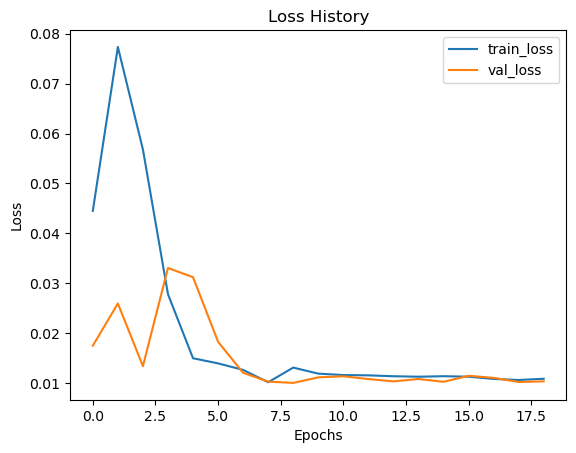

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

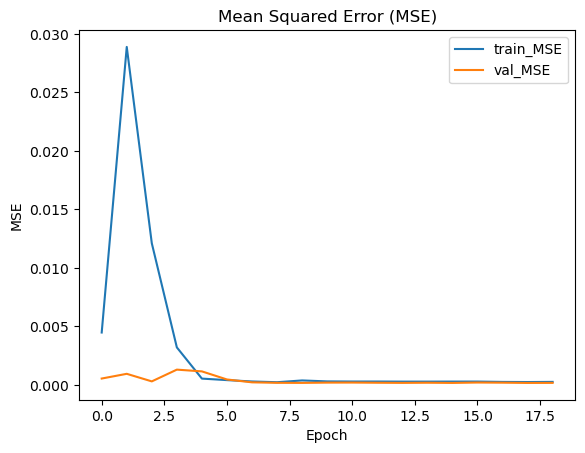

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

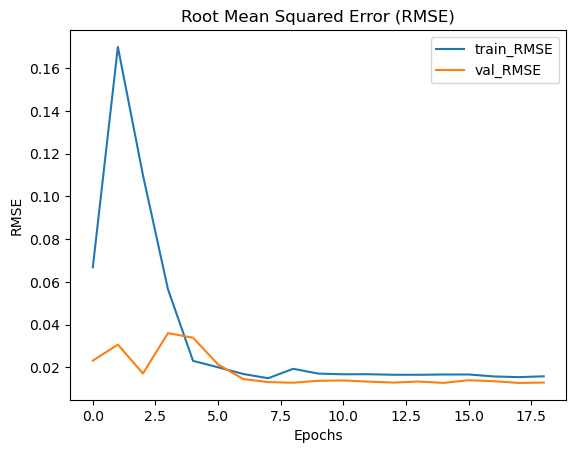

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

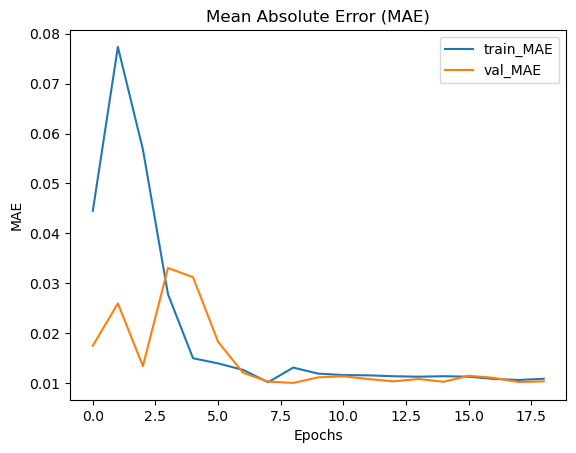

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

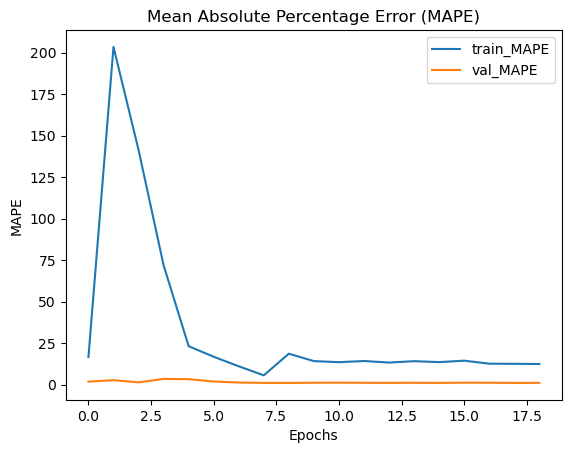

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-15 00:56:03.172658: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 2)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


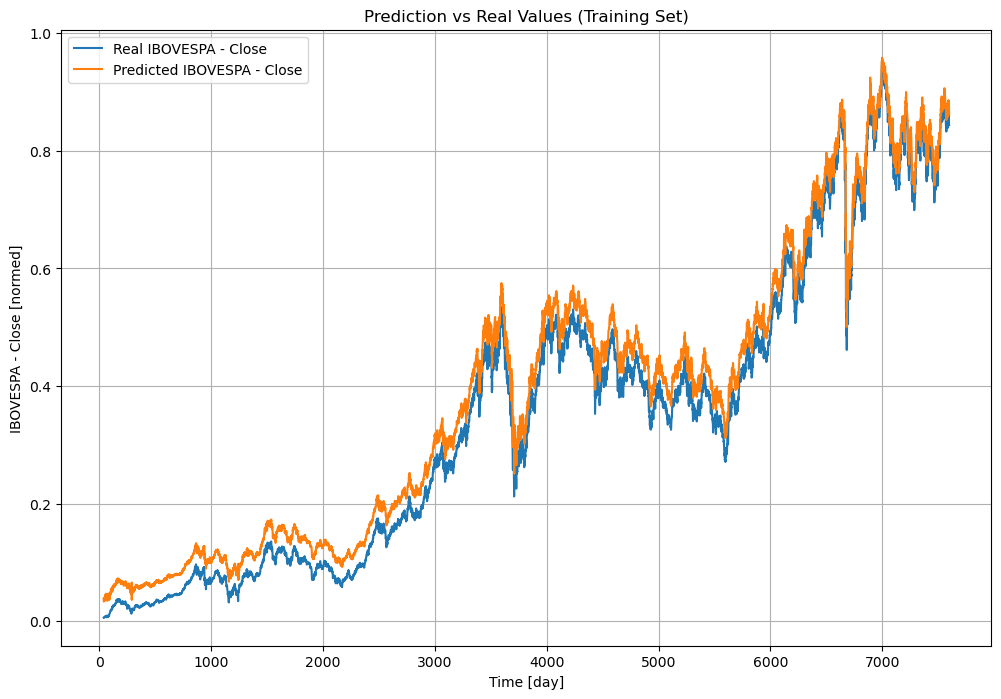

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


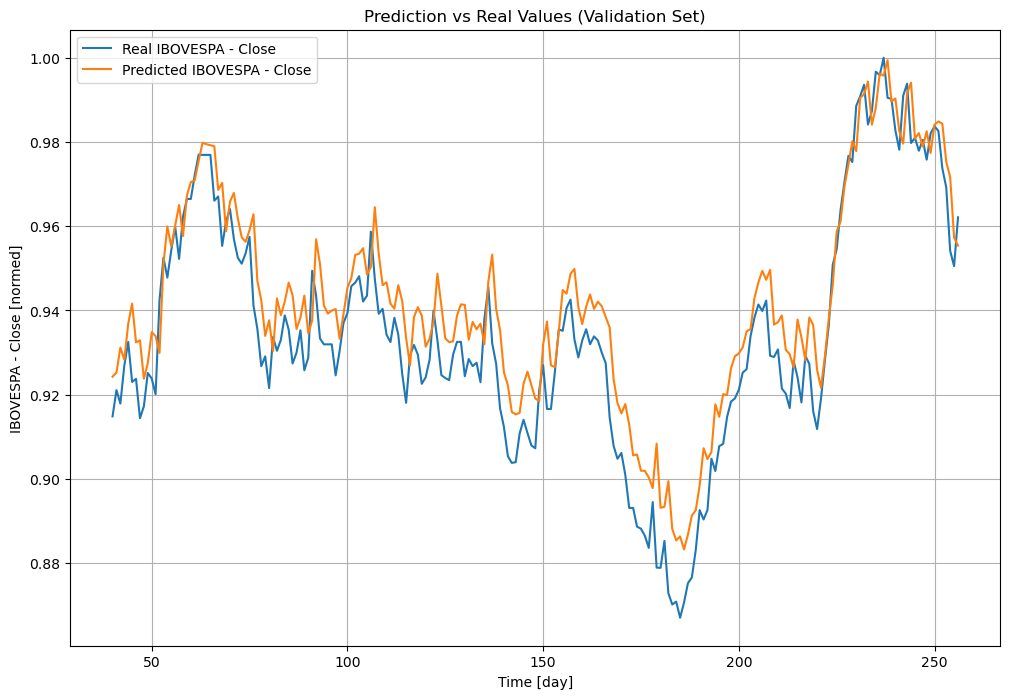

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


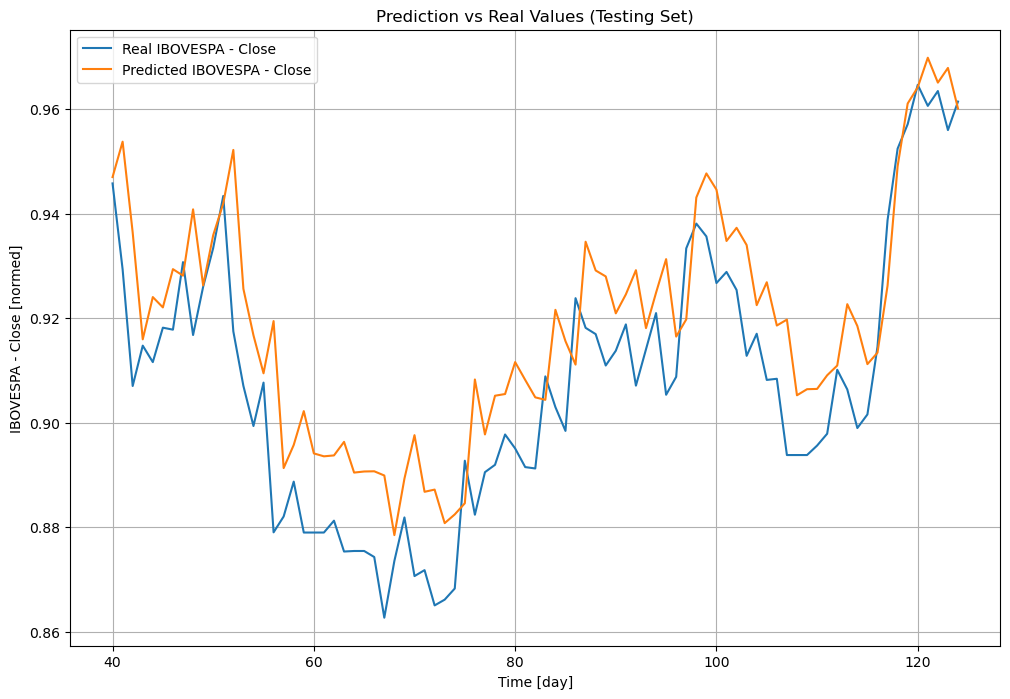

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

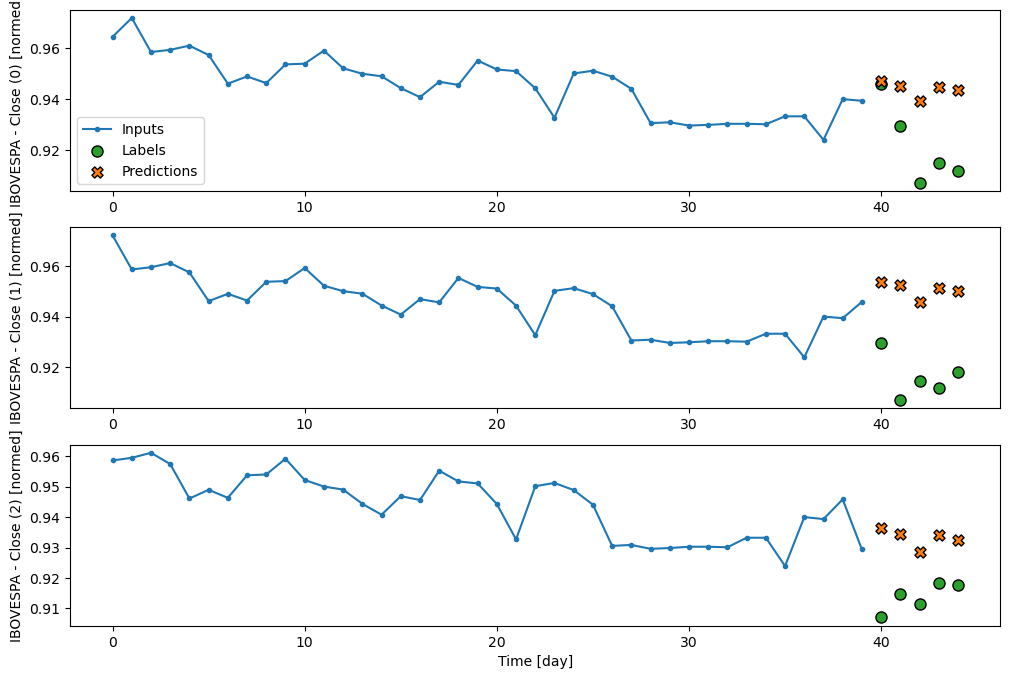

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:33s:567ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


array([[[0.947024  , 0.947024  , 0.947024  , ..., 0.947024  ,
         0.947024  , 0.947024  ],
        [0.9453431 , 0.9453431 , 0.9453431 , ..., 0.9453431 ,
         0.9453431 , 0.9453431 ],
        [0.9391412 , 0.9391412 , 0.9391412 , ..., 0.9391412 ,
         0.9391412 , 0.9391412 ],
        [0.9446014 , 0.9446014 , 0.9446014 , ..., 0.9446014 ,
         0.9446014 , 0.9446014 ],
        [0.94343853, 0.94343853, 0.94343853, ..., 0.94343853,
         0.94343865, 0.94343865]],

       [[0.9538028 , 0.9538028 , 0.9538028 , ..., 0.9538028 ,
         0.9538028 , 0.9538028 ],
        [0.95231324, 0.95231324, 0.95231324, ..., 0.95231324,
         0.95231324, 0.95231324],
        [0.9458255 , 0.9458255 , 0.9458255 , ..., 0.9458255 ,
         0.9458255 , 0.9458255 ],
        [0.95128995, 0.95128995, 0.95128995, ..., 0.95128995,
         0.95128995, 0.95128995],
        [0.95022655, 0.95022655, 0.95022655, ..., 0.95022655,
         0.95022655, 0.95022655]],

       [[0.93642485, 0.93642485, 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')